In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import statistics

from konlpy.tag import Twitter
from konlpy.utils import pprint
twitter = Twitter()
from collections import Counter

pd.set_option('max_colwidth', 500)

In [3]:
from konlpy.tag import Komoran
komoran=Komoran()

In [4]:
 # 소수점 아래 3자리까지 나타내기, 4째자리에서 반올림
def short_float(val):
    value = float("{:.4f}".format(val))
    return value


In [5]:
def print_want_val(sm_list,used_func):
    val=(used_func(sm_list))
    val=short_float(val)
    
    return val

In [6]:
# 1. komoranlass
def make_token_review_komoran(cid):
    li=[]
    df=(go_data.loc[go_data['cId']==cid, ['_id','desc','pID','rDate','rNo','rScore']])
    df['token_review']=df['desc'].apply(tokenizer_komoran_morphs)
    df=df.reset_index()
    
    label='r'
    for i in range(len(df)):
        li.append(label+ str(i+1))
    df['label']=li
    
    return df

In [7]:
# 1. kkma class
def make_token_review_kkma(cid):
    li=[]
    df=(go_data.loc[go_data['cId']==cid, ['_id','desc','pID','rDate','rNo','rScore']])
    df['token_review']=df['desc'].apply(tokenizer_kkma_morphs)
    df=df.reset_index()
    
    label='r'
    for i in range(len(df)):
        li.append(label+ str(i+1))
    df['label']=li
    
    return df

In [8]:
# 1. token_review dataframe에 추가
def make_token_review(cid):
    li=[]
    df=(go_data.loc[go_data['cId']==cid, ['cId','_id','desc','pID','rDate','rNo','rScore']])
    df['token_review']=df['desc'].apply(tokenizer_twitter_morphs)
    df=df.reset_index()
    
    label='r'
    for i in range(len(df)):
        li.append(label+ str(i+1))
    df['label']=li
    
    return df

In [9]:
# 2. calculate similarity
def make_similarity(df):
    TaggedDocument = namedtuple('TaggedDocument', 'words tags')
    tagged_train_docs = [TaggedDocument(d, c) for d, c in df[['token_review', 'label']].values]
    
    model= Doc2Vec(
    dm=0,            # PV-DBOW / default 1
    dbow_words=1,    # w2v simultaneous with DBOW d2v / default 0
    window=8,        # distance between the predicted word and context words
    size=300,        # vector size
    alpha=0.025,     # learning-rate
    seed=1234,
    min_count=0,    # ignore with freq lower
    min_alpha=0.025, # min learning-rate

    hs = 1,          # hierarchical softmax / default 0
    negative = 10,   # negative sampling / default 5
    )
    
    model.build_vocab(tagged_train_docs, update=False)
    print("model name: ", str(model))
    
    start = time()
    for epoch in range(10):
        model.train(tagged_train_docs, total_examples=model.corpus_count, epochs=model.iter)
        model.alpha -= 0.002 # decrease the learning rate
        model.min_alpha = model.alpha # fix the learning rate, no decay
    end = time()
    print("During Time: {}".format(end-start))
    
    
    sm=[]
    for i in range(len(df)-1):
        for j in range(i+1, len(df)):
            val=model.wv.n_similarity(df['token_review'][i],df['token_review'][j])
         #   print str(i+1) + str('번째 리뷰와') + str(j+1) + str('번째 리뷰 유사도: ')+ str(val)
            sm.append(val)
        
    print str('최대값: ') + str(max(sm))
    print str('상위25%: ') + str(np.percentile(sm,75))
    print str('중간값: ') + str(np.percentile(sm,50))
    print str('상위75%: ') + str(np.percentile(sm,25))
    print str('평균: ') + str(np.mean(sm))
    
    return sm

In [11]:
import pandas as pd
import numpy as np
np.random.seed(0)
from konlpy.tag import Twitter
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

twitter=Twitter()
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [12]:
from konlpy.tag import Kkma
kkma=Kkma()

In [13]:
from gensim.models import Doc2Vec
import sys
import multiprocessing
from time import time
from collections import namedtuple

In [15]:
from nltk.tokenize import word_tokenize
import nltk

In [18]:
c=go_data['cId'].value_counts()
c=pd.DataFrame(c)
c

,cId
네이버 페이 구매자,52539
rkdldk5**,475
yeji04**,449
elqxhs**,339
dnv**,314
rladmswl9708**,308
wlgus5**,305
pp**,301
wertyuio9**,292
sumin12**,278


In [19]:
go_cid=[]
for i in range(len(c)):
    if(c['cId'][i]==1):
        continue
    else:
        go_cid.append(c.index[i])

In [20]:
go_cid=list(go_cid)

In [21]:
go_cid=go_cid[1:]
len(go_cid) # review 1개 작성자, 네이버페이구매자 제외

92802

In [27]:
def tokenizer_twitter_morphs(doc):
    return twitter.morphs(doc)
def tokenizer_twitter_nouns(doc):
    return twitter.nouns(doc)
def tokenizer_twitter_pos(doc):
    return twitter.pos(doc, norm=True, stem=True)

In [28]:
def tokenizer_kkma_morphs(doc):
    return kkma.morphs(doc)
def tokenizer_kkma_nouns(doc):
    return kkma.nouns(doc)
def tokenizer_kkma_pos(doc):
    return kkma.pos(doc)

In [29]:
def tokenizer_komoran_morphs(doc):
    return komoran.morphs(doc)

In [30]:
df['token_review']=df['desc'].apply(tokenizer_twitter_morphs)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
import random

In [515]:
test_cid=random.sample(go_cid,1000)

In [516]:
len(test_cid)

1000

In [517]:
test_cid[:10]

[u'userna**',
 u'duddnd00**',
 u'eunyoun**',
 u'syl03**',
 u'57687026**',
 u'zhfldk43**',
 u'bj12**',
 u'ysyoung01**',
 u'500899323422769**',
 u'ssllc**']

1천명

In [518]:
len(test_cid)

1000

In [519]:
max_list=[]
mid_list=[]
q1_list=[]
q3_list=[]

for i in range(len(test_cid)):
    print str(i+1) + str('번째 리뷰어: ')+ str(test_cid[i].encode('utf-8'))
    re=make_token_review(test_cid[i])
    
    sm=make_similarity(re)

  
    result_max= print_want_val(sm, lambda x: np.percentile(sm,100)) # 최대값 반환 
    print ("max: ", result_max)
    max_list.append(result_max)
       
    result_q3 = print_want_val(sm, lambda x: np.percentile(sm,75)) #상위 25%
    print("3rd quartile: ", result_q3)         
    q3_list.append(result_q3)
    
    result_mid = print_want_val(sm, lambda x: np.percentile(sm,50)) # 중간값 반환 
    print ("median: ", result_mid)
    mid_list.append(result_mid)
    
    result_q1 = print_want_val(sm, lambda x: np.percentile(sm,25)) # 상위 75%
    print("1st quartile: ", result_q1)
    q1_list.append(result_q1)
   

    print("\n")

1번째 리뷰어: userna**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


During Time: 0.249528169632
최대값: 0.9663669866311799
상위25%: 0.9515067578333147
중간값: 0.9300146132521997
상위75%: 0.9287512445064885
평균: 0.9380127842219604
('max: ', 0.9664)
('3rd quartile: ', 0.9515)
('median: ', 0.93)
('1st quartile: ', 0.9288)


2번째 리뷰어: duddnd00**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.9406580925
최대값: 0.8681851250038716
상위25%: 0.674496911089492
중간값: 0.5917179280176436
상위75%: 0.5216526866606777
평균: 0.5900301860103275
('max: ', 0.8682)
('3rd quartile: ', 0.6745)
('median: ', 0.5917)
('1st quartile: ', 0.5217)


3번째 리뷰어: eunyoun**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.197712898254
최대값: 0.9932679782707293
상위25%: 0.9692400126980865
중간값: 0.9452120471254437
상위75%: 0.9415482663636351
평균: 0.9587881703326664
('max: ', 0.9933)
('3rd quartile: ', 0.9692)
('median: ', 0.9452)
('1st quartile: ', 0.9415)


4번째 리뷰어: syl03**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.378038883209


During Time: 0.228642940521
최대값: 0.9275167027215936
상위25%: 0.8842802291280771
중간값: 0.8410437555345607
상위75%: 0.785659106436118
평균: 0.8329449718646099
('max: ', 0.9275)
('3rd quartile: ', 0.8843)
('median: ', 0.841)
('1st quartile: ', 0.7857)


28번째 리뷰어: sksmsdu**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.40127897263
최대값: 0.8464127178573708
상위25%: 0.6764263839385309
중간값: 0.6066608594492691
상위75%: 0.5308930305151132
평균: 0.6014122276086423
('max: ', 0.8464)
('3rd quartile: ', 0.6764)
('median: ', 0.6067)
('1st quartile: ', 0.5309)


29번째 리뷰어: zpfh**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.18377494812
최대값: 0.9831732163839907
상위25%: 0.9794108665646948
중간값: 0.9781488035598149
상위75%: 0.9761355159505696
평균: 0.9733860896306149
('max: ', 0.9832)
('3rd quartile: ', 0.9794)
('median: ', 0.9781)
('1st quartile: ', 0.9761)


30번째 리뷰어: omj34**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.12761902809
최

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.580476999283
최대값: 0.9419198463059364
상위25%: 0.5929755980410741
중간값: 0.45677012520140137
상위75%: 0.337640360950178
평균: 0.46654258694100426
('max: ', 0.9419)
('3rd quartile: ', 0.593)
('median: ', 0.4568)
('1st quartile: ', 0.3376)


54번째 리뷰어: jih0381**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.235993862152
최대값: 0.9868632909165332
상위25%: 0.9640130253443017
중간값: 0.9441611398088083
상위75%: 0.9012742191750345
평균: 0.9224550221246517
('max: ', 0.9869)
('3rd quartile: ', 0.964)
('median: ', 0.9442)
('1st quartile: ', 0.9013)


55번째 리뷰어: lovemisu**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.94797706604
최대값: 0.9343267552447169
상위25%: 0.8291297179843078
중간값: 0.7513381669296305
상위75%: 0.7053191308469446
평균: 0.7657700675639959
('max: ', 0.9343)
('3rd quartile: ', 0.8291)
('median: ', 0.7513)
('1st quartile: ', 0.7053)


56번째 리뷰어: ms27**
('model name: ', 'Doc2V

79번째 리뷰어: dbalswn7**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.125236988068
최대값: 0.9999631174787383
상위25%: 0.9999631174787383
중간값: 0.9999631174787383
상위75%: 0.9999631174787383
평균: 0.9999631174787383
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


80번째 리뷰어: lye09**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.416670084
최대값: 0.6968125767617139
상위25%: 0.5981005613635294
중간값: 0.5309049632971151
상위75%: 0.4242377989546825
평균: 0.5222606123028926
('max: ', 0.6968)
('3rd quartile: ', 0.5981)
('median: ', 0.5309)
('1st quartile: ', 0.4242)


81번째 리뷰어: gustlf65**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.82417106628
최대값: 0.9600405851874441
상위25%: 0.8107765218157098
중간값: 0.7483186077542191
상위75%: 0.6207620493674533
평균: 0.7193499540563544
('max: ', 0.96)
('3rd quartile: ', 0.8108)
('median: ', 0.7483)
('1st quartile: ', 0.6208)


82번째 리뷰어: sunjae79**
('model name: ',

During Time: 0.734384059906
최대값: 0.8388803020540556
상위25%: 0.5850677469514174
중간값: 0.5246908782856092
상위75%: 0.4523725945975926
평균: 0.5328095201521234
('max: ', 0.8389)
('3rd quartile: ', 0.5851)
('median: ', 0.5247)
('1st quartile: ', 0.4524)


106번째 리뷰어: oqah**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.54466295242
최대값: 0.9914389049444498
상위25%: 0.5987194980304744
중간값: 0.49539771743309885
상위75%: 0.44623936424001864
평균: 0.5697656076313675
('max: ', 0.9914)
('3rd quartile: ', 0.5987)
('median: ', 0.4954)
('1st quartile: ', 0.4462)


107번째 리뷰어: psy04**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.93978404999
최대값: 0.8288345322781195
상위25%: 0.6587936086610118
중간값: 0.5982551033547121
상위75%: 0.5627364351043131
평균: 0.6226116104276727
('max: ', 0.8288)
('3rd quartile: ', 0.6588)
('median: ', 0.5983)
('1st quartile: ', 0.5627)


108번째 리뷰어: sangmis**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.211703

During Time: 1.88366293907
최대값: 0.6986967009333727
상위25%: 0.5710719420495218
중간값: 0.5132115126115628
상위75%: 0.5016598567364646
평균: 0.5504531330443467
('max: ', 0.6987)
('3rd quartile: ', 0.5711)
('median: ', 0.5132)
('1st quartile: ', 0.5017)


132번째 리뷰어: dnflrkwh10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.50800681114
최대값: 0.8858122734849239
상위25%: 0.664773165359532
중간값: 0.6074583569348632
상위75%: 0.539398944326909
평균: 0.6057584489230785
('max: ', 0.8858)
('3rd quartile: ', 0.6648)
('median: ', 0.6075)
('1st quartile: ', 0.5394)


133번째 리뷰어: sleepingw**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.444125175476
최대값: 0.6769326877947397
상위25%: 0.6204044752276432
중간값: 0.5741621866087501
상위75%: 0.5719126464477277
평균: 0.5879375373608345
('max: ', 0.6769)
('3rd quartile: ', 0.6204)
('median: ', 0.5742)
('1st quartile: ', 0.5719)


134번째 리뷰어: afg64**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.19

During Time: 0.251163005829
최대값: 0.8875259015461873
상위25%: 0.8836113097021431
중간값: 0.8796967178580989
상위75%: 0.8653743650845296
평균: 0.8727582105717487
('max: ', 0.8875)
('3rd quartile: ', 0.8836)
('median: ', 0.8797)
('1st quartile: ', 0.8654)


158번째 리뷰어: peh**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 7.88187885284
최대값: 0.9995194607957973
상위25%: 0.6048416240510848
중간값: 0.5372364964545487
상위75%: 0.46583627458587107
평균: 0.5382350615057759
('max: ', 0.9995)
('3rd quartile: ', 0.6048)
('median: ', 0.5372)
('1st quartile: ', 0.4658)


159번째 리뷰어: jsy64**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.42689704895
최대값: 0.8508026105900517
상위25%: 0.6812047653410616
중간값: 0.5915264872172503
상위75%: 0.45426603258842574
평균: 0.5735188447877486
('max: ', 0.8508)
('3rd quartile: ', 0.6812)
('median: ', 0.5915)
('1st quartile: ', 0.4543)


160번째 리뷰어: yujin06**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.2261550

During Time: 0.0973100662231
최대값: 0.9999964452505457
상위25%: 0.9999964452505457
중간값: 0.9999964452505457
상위75%: 0.9999964452505457
평균: 0.9999964452505457
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


184번째 리뷰어: dlgodms**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.12952589989
최대값: 0.816215451975852
상위25%: 0.6544012258952523
중간값: 0.6021781783980256
상위75%: 0.5237244656203996
평균: 0.5898901429606384
('max: ', 0.8162)
('3rd quartile: ', 0.6544)
('median: ', 0.6022)
('1st quartile: ', 0.5237)


185번째 리뷰어: fbgmlwls99**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.182253837585
최대값: 0.8888313120301016
상위25%: 0.8888313120301016
중간값: 0.8888313120301016
상위75%: 0.8888313120301016
평균: 0.8888313120301016
('max: ', 0.8888)
('3rd quartile: ', 0.8888)
('median: ', 0.8888)
('1st quartile: ', 0.8888)


186번째 리뷰어: dltndus10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.113775014

During Time: 0.292449951172
최대값: 0.6246832779874758
상위25%: 0.6244980703277663
중간값: 0.6243128626680569
상위75%: 0.5458393309304473
평균: 0.5721206466161236
('max: ', 0.6247)
('3rd quartile: ', 0.6245)
('median: ', 0.6243)
('1st quartile: ', 0.5458)


210번째 리뷰어: acd33**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.258626937866
최대값: 0.699443149413171
상위25%: 0.699443149413171
중간값: 0.699443149413171
상위75%: 0.699443149413171
평균: 0.699443149413171
('max: ', 0.6994)
('3rd quartile: ', 0.6994)
('median: ', 0.6994)
('1st quartile: ', 0.6994)


211번째 리뷰어: eunsulhy**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.334339857101
최대값: 0.8471048677238109
상위25%: 0.7432130504543771
중간값: 0.6809267139774555
상위75%: 0.6402064573752831
평균: 0.6827985940332597
('max: ', 0.8471)
('3rd quartile: ', 0.7432)
('median: ', 0.6809)
('1st quartile: ', 0.6402)


212번째 리뷰어: lee1007**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.5979349

During Time: 0.570028066635
최대값: 0.7321079241506353
상위25%: 0.6160709538822932
중간값: 0.5984229811483784
상위75%: 0.5236178899556715
평균: 0.5839222014547644
('max: ', 0.7321)
('3rd quartile: ', 0.6161)
('median: ', 0.5984)
('1st quartile: ', 0.5236)


236번째 리뷰어: shj9708**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.166481018066
최대값: 0.9997419708186939
상위25%: 0.9994603034404699
중간값: 0.998840960337052
상위75%: 0.9979032169828932
평균: 0.9984775736626702
('max: ', 0.9997)
('3rd quartile: ', 0.9995)
('median: ', 0.9988)
('1st quartile: ', 0.9979)


237번째 리뷰어: ahj10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.19716596603
최대값: 0.9391252448288644
상위25%: 0.6637721490493043
중간값: 0.5899590427852672
상위75%: 0.5256711329522094
평균: 0.6019036186554729
('max: ', 0.9391)
('3rd quartile: ', 0.6638)
('median: ', 0.59)
('1st quartile: ', 0.5257)


238번째 리뷰어: qwer10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.54249787

During Time: 0.1715259552
최대값: 0.9995133817093895
상위25%: 0.9233493010063174
중간값: 0.8471852203032453
상위75%: 0.8432259064080249
평균: 0.8953217315084797
('max: ', 0.9995)
('3rd quartile: ', 0.9233)
('median: ', 0.8472)
('1st quartile: ', 0.8432)


262번째 리뷰어: babydo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.309253931046
최대값: 0.7705531198005928
상위25%: 0.6807277790621229
중간값: 0.6534372782460319
상위75%: 0.5971560976727673
평균: 0.6417877637599436
('max: ', 0.7706)
('3rd quartile: ', 0.6807)
('median: ', 0.6534)
('1st quartile: ', 0.5972)


263번째 리뷰어: jjss69**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.316087961197
최대값: 0.659367527903967
상위25%: 0.6365673037482884
중간값: 0.5505607575689642
상위75%: 0.45873818691886215
평균: 0.5477457030327408
('max: ', 0.6594)
('3rd quartile: ', 0.6366)
('median: ', 0.5506)
('1st quartile: ', 0.4587)


264번째 리뷰어: assa3**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0950510

During Time: 0.114356994629
최대값: 0.9999160210649791
상위25%: 0.9999160210649791
중간값: 0.9999160210649791
상위75%: 0.9999160210649791
평균: 0.9999160210649791
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


288번째 리뷰어: 53604148**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.234312057495
최대값: 0.9907545709110136
상위25%: 0.9568372965385175
중간값: 0.9400292257467824
상위75%: 0.9171360297183268
평균: 0.9382223425915355
('max: ', 0.9908)
('3rd quartile: ', 0.9568)
('median: ', 0.94)
('1st quartile: ', 0.9171)


289번째 리뷰어: gusgml2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.314188957214
최대값: 0.8799770278412925
상위25%: 0.7983891390983253
중간값: 0.503764089172668
상위75%: 0.454683450696074
평균: 0.5954446504153361
('max: ', 0.88)
('3rd quartile: ', 0.7984)
('median: ', 0.5038)
('1st quartile: ', 0.4547)


290번째 리뷰어: eksdud**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.4639539

During Time: 0.0990009307861
최대값: 0.9999981171713785
상위25%: 0.9999981171713785
중간값: 0.9999981171713785
상위75%: 0.9999981171713785
평균: 0.9999981171713785
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


314번째 리뷰어: mossi**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.22355914116
최대값: 0.9998214921103022
상위25%: 0.7253083196385347
중간값: 0.6300276300157248
상위75%: 0.5653363880726969
평균: 0.6451697373568726
('max: ', 0.9998)
('3rd quartile: ', 0.7253)
('median: ', 0.63)
('1st quartile: ', 0.5653)


315번째 리뷰어: jsm19**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.4777739048
최대값: 0.8588318320744744
상위25%: 0.7100517865306748
중간값: 0.6501163660539305
상위75%: 0.5944014756445353
평균: 0.6432319145612174
('max: ', 0.8588)
('3rd quartile: ', 0.7101)
('median: ', 0.6501)
('1st quartile: ', 0.5944)


316번째 리뷰어: ab51**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.37269997597
최대값: 0.82814

During Time: 0.131138086319
최대값: 0.9999306638794344
상위25%: 0.9999306638794344
중간값: 0.9999306638794344
상위75%: 0.9999306638794344
평균: 0.9999306638794344
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


340번째 리뷰어: dhrqns**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.111014127731
최대값: 0.9999926541582764
상위25%: 0.9999926541582764
중간값: 0.9999926541582764
상위75%: 0.9999926541582764
평균: 0.9999926541582764
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


341번째 리뷰어: qkdwnd01**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.146328926086
최대값: 0.98271703179668
상위25%: 0.98271703179668
중간값: 0.98271703179668
상위75%: 0.98271703179668
평균: 0.98271703179668
('max: ', 0.9827)
('3rd quartile: ', 0.9827)
('median: ', 0.9827)
('1st quartile: ', 0.9827)


342번째 리뷰어: wasa**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.50154614449
최대값: 0.8623002


365번째 리뷰어: hm45**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.3023250103
최대값: 0.9025848547843662
상위25%: 0.5859237125484278
중간값: 0.5471894451551904
상위75%: 0.45849943056529174
평균: 0.5764155349768855
('max: ', 0.9026)
('3rd quartile: ', 0.5859)
('median: ', 0.5472)
('1st quartile: ', 0.4585)


366번째 리뷰어: dlruda**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.104243040085
최대값: 0.9999895523401511
상위25%: 0.9999744466788748
중간값: 0.9999731154689202
상위75%: 0.9999659277239539
평균: 0.9999727063692437
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


367번째 리뷰어: rkdud03**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.442873001099
최대값: 0.713952720997008
상위25%: 0.6240666286600868
중간값: 0.551025662953694
상위75%: 0.48002690859509034
평균: 0.5482676008009596
('max: ', 0.714)
('3rd quartile: ', 0.6241)
('median: ', 0.551)
('1st quartile: ', 0.48)


368번째 리뷰어: qkrwldud02**
('model name:

During Time: 0.119998931885
최대값: 0.9997781295425074
상위25%: 0.9997781295425074
중간값: 0.9997781295425074
상위75%: 0.9997781295425074
평균: 0.9997781295425074
('max: ', 0.9998)
('3rd quartile: ', 0.9998)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


392번째 리뷰어: cy23**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.289752006531
최대값: 0.9585640286451014
상위25%: 0.9028921383664019
중간값: 0.7976626450379272
상위75%: 0.7288692294932952
평균: 0.8043273187058796
('max: ', 0.9586)
('3rd quartile: ', 0.9029)
('median: ', 0.7977)
('1st quartile: ', 0.7289)


393번째 리뷰어: seun11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.20388913155
최대값: 0.7280571755997958
상위25%: 0.6159885277204121
중간값: 0.5614958175139807
상위75%: 0.49086382576319465
평균: 0.5570270151144571
('max: ', 0.7281)
('3rd quartile: ', 0.616)
('median: ', 0.5615)
('1st quartile: ', 0.4909)


394번째 리뷰어: dldmstj**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.134189

During Time: 0.253531932831
최대값: 0.7514456583294176
상위25%: 0.7132502887850718
중간값: 0.675054919240726
상위75%: 0.658306669033924
평균: 0.6893529987990886
('max: ', 0.7514)
('3rd quartile: ', 0.7133)
('median: ', 0.6751)
('1st quartile: ', 0.6583)


418번째 리뷰어: cap2lp**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.144807100296
최대값: 0.9995531757576903
상위25%: 0.9995531757576903
중간값: 0.9995531757576903
상위75%: 0.9995531757576903
평균: 0.9995531757576903
('max: ', 0.9996)
('3rd quartile: ', 0.9996)
('median: ', 0.9996)
('1st quartile: ', 0.9996)


419번째 리뷰어: britney**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.485487222672
최대값: 0.9550309187143415
상위25%: 0.824238394300614
중간값: 0.76095059736377
상위75%: 0.7398190628215697
평균: 0.7792338212210372
('max: ', 0.955)
('3rd quartile: ', 0.8242)
('median: ', 0.761)
('1st quartile: ', 0.7398)


420번째 리뷰어: dhfoqhwk05**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.200408

During Time: 0.239755868912
최대값: 0.806600387483628
상위25%: 0.7949716136057103
중간값: 0.7833428397277928
상위75%: 0.6504039618175279
평균: 0.7024694370395612
('max: ', 0.8066)
('3rd quartile: ', 0.795)
('median: ', 0.7833)
('1st quartile: ', 0.6504)


444번째 리뷰어: dk04**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.85342097282
최대값: 0.9338924882852551
상위25%: 0.7131545338524482
중간값: 0.5859501549611464
상위75%: 0.5184182568684056
평균: 0.6201920407469314
('max: ', 0.9339)
('3rd quartile: ', 0.7132)
('median: ', 0.586)
('1st quartile: ', 0.5184)


445번째 리뷰어: seonha09**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.842767953873
최대값: 0.7745195765157046
상위25%: 0.6968871779532129
중간값: 0.6559129598823371
상위75%: 0.6020774315624696
평균: 0.6529711371681246
('max: ', 0.7745)
('3rd quartile: ', 0.6969)
('median: ', 0.6559)
('1st quartile: ', 0.6021)


446번째 리뷰어: 814373998685969**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.19557595253
최대값: 0.939928704840364
상위25%: 0.939928704840364
중간값: 0.939928704840364
상위75%: 0.939928704840364
평균: 0.939928704840364
('max: ', 0.9399)
('3rd quartile: ', 0.9399)
('median: ', 0.9399)
('1st quartile: ', 0.9399)


470번째 리뷰어: a0511**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.01461100578
최대값: 0.9289659836299832
상위25%: 0.6008821483201083
중간값: 0.4927391877271892
상위75%: 0.4440034589047478
평균: 0.5495556201990234
('max: ', 0.929)
('3rd quartile: ', 0.6009)
('median: ', 0.4927)
('1st quartile: ', 0.444)


471번째 리뷰어: sbgrigi8**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.603950023651
최대값: 0.7595578694235112
상위25%: 0.686471393938119
중간값: 0.6593441025520225
상위75%: 0.6327241520885334
평균: 0.6683570704987142
('max: ', 0.7596)
('3rd quartile: ', 0.6865)
('median: ', 0.6593)
('1st quartile: ', 0.6327)


472번째 리뷰어: lucy4**
('model name: ', 'Doc2Vec(dbo



495번째 리뷰어: yein21**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.62544298172
최대값: 0.9589446472542084
상위25%: 0.8175589831833784
중간값: 0.7536692329631589
상위75%: 0.6334075441729684
평균: 0.7233025169712594
('max: ', 0.9589)
('3rd quartile: ', 0.8176)
('median: ', 0.7537)
('1st quartile: ', 0.6334)


496번째 리뷰어: yj123**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.140146970749
최대값: 0.9992747564385362
상위25%: 0.9992747564385362
중간값: 0.9992747564385362
상위75%: 0.9992747564385362
평균: 0.9992747564385362
('max: ', 0.9993)
('3rd quartile: ', 0.9993)
('median: ', 0.9993)
('1st quartile: ', 0.9993)


497번째 리뷰어: eyec**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.25768494606
최대값: 0.8815642587338639
상위25%: 0.6994263407890208
중간값: 0.6091965239342697
상위75%: 0.513251641532386
평균: 0.596419617828802
('max: ', 0.8816)
('3rd quartile: ', 0.6994)
('median: ', 0.6092)
('1st quartile: ', 0.5133)


498번째 리뷰어: ekgp89**
('mo

During Time: 0.39758014679
최대값: 0.8538368571667464
상위25%: 0.6985863527291225
중간값: 0.6318593791988828
상위75%: 0.5420267577023952
평균: 0.6455010190435477
('max: ', 0.8538)
('3rd quartile: ', 0.6986)
('median: ', 0.6319)
('1st quartile: ', 0.542)


521번째 리뷰어: 37477980**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.116024017334
최대값: 0.9996704301397497
상위25%: 0.9996704301397497
중간값: 0.9996704301397497
상위75%: 0.9996704301397497
평균: 0.9996704301397497
('max: ', 0.9997)
('3rd quartile: ', 0.9997)
('median: ', 0.9997)
('1st quartile: ', 0.9997)


522번째 리뷰어: dpfls11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.600470781326
최대값: 0.7883946841369269
상위25%: 0.6103222370360213
중간값: 0.4470327803638452
상위75%: 0.3683576333220362
평균: 0.48916395895885084
('max: ', 0.7884)
('3rd quartile: ', 0.6103)
('median: ', 0.447)
('1st quartile: ', 0.3684)


523번째 리뷰어: tyzhffk1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.5

During Time: 0.338747024536
최대값: 0.8416261353278122
상위25%: 0.7119665443990475
중간값: 0.620423469560989
상위75%: 0.5950615214326506
평균: 0.6594091067237242
('max: ', 0.8416)
('3rd quartile: ', 0.712)
('median: ', 0.6204)
('1st quartile: ', 0.5951)


547번째 리뷰어: heehyunbo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.116795063019
최대값: 0.999862237121546
상위25%: 0.999862237121546
중간값: 0.999862237121546
상위75%: 0.999862237121546
평균: 0.999862237121546
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


548번째 리뷰어: mika7**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.531855106354
최대값: 0.6123212079096767
상위25%: 0.608637114614185
중간값: 0.5782469126204817
상위75%: 0.5090147638942046
평균: 0.5595458049561172
('max: ', 0.6123)
('3rd quartile: ', 0.6086)
('median: ', 0.5782)
('1st quartile: ', 0.509)


549번째 리뷰어: qwert164**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.603758811

During Time: 0.124808073044
최대값: 0.9996638955962123
상위25%: 0.9996638955962123
중간값: 0.9996638955962123
상위75%: 0.9996638955962123
평균: 0.9996638955962123
('max: ', 0.9997)
('3rd quartile: ', 0.9997)
('median: ', 0.9997)
('1st quartile: ', 0.9997)


573번째 리뷰어: miae12**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.47747087479
최대값: 0.8528924862509479
상위25%: 0.6458609081525758
중간값: 0.583929133675641
상위75%: 0.5179062364782012
평균: 0.5888302066848055
('max: ', 0.8529)
('3rd quartile: ', 0.6459)
('median: ', 0.5839)
('1st quartile: ', 0.5179)


574번째 리뷰어: sekyung**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.203048944473
최대값: 0.9991157180462512
상위25%: 0.9945952091952784
중간값: 0.9845262999679377
상위75%: 0.9807149405054558
평균: 0.9842406271365493
('max: ', 0.9991)
('3rd quartile: ', 0.9946)
('median: ', 0.9845)
('1st quartile: ', 0.9807)


575번째 리뷰어: cindy5**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.31860

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.54262399673
최대값: 0.8800952951240848
상위25%: 0.6923124866171707
중간값: 0.6352284210627634
상위75%: 0.5820216197683645
평균: 0.642161987856927
('max: ', 0.8801)
('3rd quartile: ', 0.6923)
('median: ', 0.6352)
('1st quartile: ', 0.582)


599번째 리뷰어: bywo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.441648960114
최대값: 0.7286149177594456
상위25%: 0.6300596802174773
중간값: 0.5430498922351881
상위75%: 0.48534108667316467
평균: 0.558954706909217
('max: ', 0.7286)
('3rd quartile: ', 0.6301)
('median: ', 0.543)
('1st quartile: ', 0.4853)


600번째 리뷰어: qa30**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.782997131348
최대값: 0.8235636485512347
상위25%: 0.8235636485512347
중간값: 0.8235636485512347
상위75%: 0.8235636485512347
평균: 0.8235636485512347
('max: ', 0.8236)
('3rd quartile: ', 0.8236)
('median: ', 0.8236)
('1st quartile: ', 0.8236)


601번째 리뷰어: hoj34**
('model name: ', 'Doc2Vec(db

During Time: 5.83090186119
최대값: 0.8804807251380271
상위25%: 0.7234723887529702
중간값: 0.6447469980742777
상위75%: 0.5840479910611185
평균: 0.6502379560951955
('max: ', 0.8805)
('3rd quartile: ', 0.7235)
('median: ', 0.6447)
('1st quartile: ', 0.584)


624번째 리뷰어: siye**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 12.4541277885
최대값: 0.9999999999999999
상위25%: 0.7036787527425012
중간값: 0.6555095190217101
상위75%: 0.6030763448163459
평균: 0.6536746259808833
('max: ', 1.0)
('3rd quartile: ', 0.7037)
('median: ', 0.6555)
('1st quartile: ', 0.6031)


625번째 리뷰어: dmsdk65**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.51569914818
최대값: 0.7254154597364441
상위25%: 0.6126418565153909
중간값: 0.5812267953741534
상위75%: 0.5086742383571655
평균: 0.5733966714805926
('max: ', 0.7254)
('3rd quartile: ', 0.6126)
('median: ', 0.5812)
('1st quartile: ', 0.5087)


626번째 리뷰어: zsedf**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.230281114578




649번째 리뷰어: yjyj66**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.306861162186
최대값: 0.8134991140750671
상위25%: 0.7206923927308689
중간값: 0.6735903563943599
상위75%: 0.6465522282272492
평균: 0.672153830901571
('max: ', 0.8135)
('3rd quartile: ', 0.7207)
('median: ', 0.6736)
('1st quartile: ', 0.6466)


650번째 리뷰어: hae53**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.388367891312
최대값: 0.6679186709528814
상위25%: 0.660746228669109
중간값: 0.6535737863853368
상위75%: 0.5938500921052117
평균: 0.6185396183877683
('max: ', 0.6679)
('3rd quartile: ', 0.6607)
('median: ', 0.6536)
('1st quartile: ', 0.5939)


651번째 리뷰어: 59142046**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.11398100853
최대값: 0.9999712729933656
상위25%: 0.9999712729933656
중간값: 0.9999712729933656
상위75%: 0.9999712729933656
평균: 0.9999712729933656
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


652번째 리뷰어: jobbij**
('model nam

During Time: 2.19565081596
최대값: 0.8406832254719048
상위25%: 0.7249209200953151
중간값: 0.5653723947237994
상위75%: 0.4992693531555609
평균: 0.6003610030711892
('max: ', 0.8407)
('3rd quartile: ', 0.7249)
('median: ', 0.5654)
('1st quartile: ', 0.4993)


675번째 리뷰어: ddorin05**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.173906087875
최대값: 0.9951477860188328
상위25%: 0.9947570896183651
중간값: 0.9943663932178973
상위75%: 0.9919596651686331
평균: 0.9930223721186997
('max: ', 0.9951)
('3rd quartile: ', 0.9948)
('median: ', 0.9944)
('1st quartile: ', 0.992)


676번째 리뷰어: qwert000**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.169486045837
최대값: 0.9988098377978349
상위25%: 0.9970792720840864
중간값: 0.995348706370338
상위75%: 0.9943025735162212
평균: 0.9958049949434257
('max: ', 0.9988)
('3rd quartile: ', 0.9971)
('median: ', 0.9953)
('1st quartile: ', 0.9943)


677번째 리뷰어: hotdog**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.235

During Time: 0.180213212967
최대값: 0.9962040399781781
상위25%: 0.9962040399781781
중간값: 0.9962040399781781
상위75%: 0.9962040399781781
평균: 0.9962040399781781
('max: ', 0.9962)
('3rd quartile: ', 0.9962)
('median: ', 0.9962)
('1st quartile: ', 0.9962)


701번째 리뷰어: 12386238**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0987207889557
최대값: 0.9994348759397457
상위25%: 0.9994348759397457
중간값: 0.9994348759397457
상위75%: 0.9994348759397457
평균: 0.9994348759397457
('max: ', 0.9994)
('3rd quartile: ', 0.9994)
('median: ', 0.9994)
('1st quartile: ', 0.9994)


702번째 리뷰어: wjdgkwjd**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.154607057571
최대값: 0.9994158946264049
상위25%: 0.9994158946264049
중간값: 0.9994158946264049
상위75%: 0.9994158946264049
평균: 0.9994158946264049
('max: ', 0.9994)
('3rd quartile: ', 0.9994)
('median: ', 0.9994)
('1st quartile: ', 0.9994)


703번째 리뷰어: eunjee**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0

During Time: 0.230179071426
최대값: 0.9770368869852314
상위25%: 0.9686311316927567
중간값: 0.9602253764002819
상위75%: 0.9456535765727356
평균: 0.9561146800435676
('max: ', 0.977)
('3rd quartile: ', 0.9686)
('median: ', 0.9602)
('1st quartile: ', 0.9457)


727번째 리뷰어: jeondh**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.158175945282
최대값: 0.9994538419400952
상위25%: 0.9990539581185784
중간값: 0.9986540742970615
상위75%: 0.9985471732158256
평균: 0.9988493961239154
('max: ', 0.9995)
('3rd quartile: ', 0.9991)
('median: ', 0.9987)
('1st quartile: ', 0.9985)


728번째 리뷰어: wngusqkr**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.220473051071
최대값: 0.9139745021329814
상위25%: 0.9139745021329814
중간값: 0.9139745021329814
상위75%: 0.9139745021329814
평균: 0.9139745021329814
('max: ', 0.914)
('3rd quartile: ', 0.914)
('median: ', 0.914)
('1st quartile: ', 0.914)


729번째 리뷰어: syyj26**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.2529730

During Time: 0.0959241390228
최대값: 1.0
상위25%: 0.7471970642925558
중간값: 0.49439412858511167
상위75%: 0.49439412858511167
평균: 0.6629294190567411
('max: ', 1.0)
('3rd quartile: ', 0.7472)
('median: ', 0.4944)
('1st quartile: ', 0.4944)


753번째 리뷰어: q95p8**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.187121868134
최대값: 0.9994116647160863
상위25%: 0.9991768813907154
중간값: 0.9990289995212754
상위75%: 0.9989179957038201
평균: 0.9989564264630476
('max: ', 0.9994)
('3rd quartile: ', 0.9992)
('median: ', 0.999)
('1st quartile: ', 0.9989)


754번째 리뷰어: kjslovek**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.17245292664
최대값: 0.7471068443813169
상위25%: 0.6322214520699743
중간값: 0.5656437095276208
상위75%: 0.49214125269778475
평균: 0.5619539478907191
('max: ', 0.7471)
('3rd quartile: ', 0.6322)
('median: ', 0.5656)
('1st quartile: ', 0.4921)


755번째 리뷰어: sklee22**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.475298881531
최대값: 

During Time: 1.87087798119
최대값: 0.7685304919754323
상위25%: 0.6311568026940857
중간값: 0.5859329851994812
상위75%: 0.5169144028179575
평균: 0.5883143042882795
('max: ', 0.7685)
('3rd quartile: ', 0.6312)
('median: ', 0.5859)
('1st quartile: ', 0.5169)


779번째 리뷰어: jds34**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.36370420456
최대값: 0.8250947039299199
상위25%: 0.6405574966124142
중간값: 0.5528940414941695
상위75%: 0.48587474740442993
평균: 0.5598352820934087
('max: ', 0.8251)
('3rd quartile: ', 0.6406)
('median: ', 0.5529)
('1st quartile: ', 0.4859)


780번째 리뷰어: sog10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.328500986099
최대값: 0.865951911491363
상위25%: 0.6831071379050215
중간값: 0.6373607854386774
상위75%: 0.6188098897341452
평균: 0.6782259659572497
('max: ', 0.866)
('3rd quartile: ', 0.6831)
('median: ', 0.6374)
('1st quartile: ', 0.6188)


781번째 리뷰어: sark**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.26150894165

During Time: 0.132567167282
최대값: 0.9997021078033342
상위25%: 0.9995328112152989
중간값: 0.998812427897668
상위75%: 0.9976694103427478
평균: 0.9985941307724717
('max: ', 0.9997)
('3rd quartile: ', 0.9995)
('median: ', 0.9988)
('1st quartile: ', 0.9977)


805번째 리뷰어: soojin51**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.162806987762
최대값: 0.9709427715890004
상위25%: 0.9709427715890004
중간값: 0.9709427715890004
상위75%: 0.9709427715890004
평균: 0.9709427715890004
('max: ', 0.9709)
('3rd quartile: ', 0.9709)
('median: ', 0.9709)
('1st quartile: ', 0.9709)


806번째 리뷰어: bib**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.114470005035
최대값: 0.999951046033708
상위25%: 0.999951046033708
중간값: 0.999951046033708
상위75%: 0.999951046033708
평균: 0.999951046033708
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


807번째 리뷰어: 19754206**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.286283969879
최대값: 0.6

During Time: 0.144392967224
최대값: 0.9995997368155274
상위25%: 0.9995997368155274
중간값: 0.9995997368155274
상위75%: 0.9995997368155274
평균: 0.9995997368155274
('max: ', 0.9996)
('3rd quartile: ', 0.9996)
('median: ', 0.9996)
('1st quartile: ', 0.9996)


831번째 리뷰어: rsedldbr**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.362221002579
최대값: 0.751713991691726
상위25%: 0.6748338439479998
중간값: 0.6178253671666263
상위75%: 0.4711089392538407
평균: 0.5839383129607117
('max: ', 0.7517)
('3rd quartile: ', 0.6748)
('median: ', 0.6178)
('1st quartile: ', 0.4711)


832번째 리뷰어: syn96**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.45898294449
최대값: 0.8511936748070085
상위25%: 0.7466421822096326
중간값: 0.5562559430008833
상위75%: 0.5077402696747606
평균: 0.6106189607275649
('max: ', 0.8512)
('3rd quartile: ', 0.7466)
('median: ', 0.5563)
('1st quartile: ', 0.5077)


833번째 리뷰어: lilly5**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.17431

During Time: 0.455794095993
최대값: 0.5948845307045674
상위25%: 0.5948845307045674
중간값: 0.5948845307045674
상위75%: 0.5948845307045674
평균: 0.5948845307045674
('max: ', 0.5949)
('3rd quartile: ', 0.5949)
('median: ', 0.5949)
('1st quartile: ', 0.5949)


857번째 리뷰어: sldpf47**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.34222388268
최대값: 0.9465535487949586
상위25%: 0.6623861873903805
중간값: 0.5778313519529017
상위75%: 0.5152024451020628
평균: 0.5893921247518418
('max: ', 0.9466)
('3rd quartile: ', 0.6624)
('median: ', 0.5778)
('1st quartile: ', 0.5152)


858번째 리뷰어: myspeciald**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.185970067978
최대값: 0.9555133145085504
상위25%: 0.9555133145085504
중간값: 0.9555133145085504
상위75%: 0.9555133145085504
평균: 0.9555133145085504
('max: ', 0.9555)
('3rd quartile: ', 0.9555)
('median: ', 0.9555)
('1st quartile: ', 0.9555)


859번째 리뷰어: kje11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.3



882번째 리뷰어: jisu108**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.301367998123
최대값: 0.8437652872587051
상위25%: 0.7962569825201815
중간값: 0.7487486777816579
상위75%: 0.6967894592686115
평균: 0.7457814019319761
('max: ', 0.8438)
('3rd quartile: ', 0.7963)
('median: ', 0.7487)
('1st quartile: ', 0.6968)


883번째 리뷰어: 922411001212045**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.181088924408
최대값: 0.9881074331065316
상위25%: 0.9881074331065316
중간값: 0.9881074331065316
상위75%: 0.9881074331065316
평균: 0.9881074331065316
('max: ', 0.9881)
('3rd quartile: ', 0.9881)
('median: ', 0.9881)
('1st quartile: ', 0.9881)


884번째 리뷰어: jyllds**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.216674089432
최대값: 0.8346823561524735
상위25%: 0.8346823561524735
중간값: 0.8346823561524735
상위75%: 0.8346823561524735
평균: 0.8346823561524735
('max: ', 0.8347)
('3rd quartile: ', 0.8347)
('median: ', 0.8347)
('1st quartile: ', 0.8347)


885번째 리

During Time: 0.168123960495
최대값: 0.9975706009595107
상위25%: 0.9913107581019903
중간값: 0.9848050085187013
상위75%: 0.9807882172199665
평균: 0.9824470098674017
('max: ', 0.9976)
('3rd quartile: ', 0.9913)
('median: ', 0.9848)
('1st quartile: ', 0.9808)


908번째 리뷰어: xkakvka**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.214069128036
최대값: 0.9984411163925219
상위25%: 0.9906336955724369
중간값: 0.982826274752352
상위75%: 0.9777877004659934
평균: 0.984672172441503
('max: ', 0.9984)
('3rd quartile: ', 0.9906)
('median: ', 0.9828)
('1st quartile: ', 0.9778)


909번째 리뷰어: 61682065**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.162187099457
최대값: 0.9995176415489646
상위25%: 0.9976618661588528
중간값: 0.995806090768741
상위75%: 0.9950374355233659
평균: 0.9965308375318989
('max: ', 0.9995)
('3rd quartile: ', 0.9977)
('median: ', 0.9958)
('1st quartile: ', 0.995)


910번째 리뷰어: kier**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1091330

During Time: 0.337098836899
최대값: 0.8674607419343614
상위25%: 0.8118896795912498
중간값: 0.7394867946380259
상위75%: 0.7261856089929484
평균: 0.7661076576682659
('max: ', 0.8675)
('3rd quartile: ', 0.8119)
('median: ', 0.7395)
('1st quartile: ', 0.7262)


934번째 리뷰어: jbs24**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.219419002533
최대값: 0.9839863167646942
상위25%: 0.8905500931714309
중간값: 0.7971138695781675
상위75%: 0.7753357670800296
평균: 0.844885950308251
('max: ', 0.984)
('3rd quartile: ', 0.8906)
('median: ', 0.7971)
('1st quartile: ', 0.7753)


935번째 리뷰어: minin12**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.36551594734
최대값: 0.8354422316970107
상위25%: 0.6469913560454482
중간값: 0.5523892638544263
상위75%: 0.5062152798726981
평균: 0.5812975649981429
('max: ', 0.8354)
('3rd quartile: ', 0.647)
('median: ', 0.5524)
('1st quartile: ', 0.5062)


936번째 리뷰어: hyy9**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.2036039829

During Time: 0.165661096573
최대값: 0.9880673738720541
상위25%: 0.9880673738720541
중간값: 0.9880673738720541
상위75%: 0.9880673738720541
평균: 0.9880673738720541
('max: ', 0.9881)
('3rd quartile: ', 0.9881)
('median: ', 0.9881)
('1st quartile: ', 0.9881)


960번째 리뷰어: 516284401**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.185225963593
최대값: 0.9923278659813505
상위25%: 0.9904729817917992
중간값: 0.9886180976022481
상위75%: 0.9882239318823617
평균: 0.9895919099153581
('max: ', 0.9923)
('3rd quartile: ', 0.9905)
('median: ', 0.9886)
('1st quartile: ', 0.9882)


961번째 리뷰어: shinja5**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 6.07941198349
최대값: 0.9776096385725205
상위25%: 0.7941094004052494
중간값: 0.6670243685871503
상위75%: 0.5576619038468751
평균: 0.6775342682189612
('max: ', 0.9776)
('3rd quartile: ', 0.7941)
('median: ', 0.667)
('1st quartile: ', 0.5577)


962번째 리뷰어: you07**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.123

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.40918588638
최대값: 0.8031088655874853
상위25%: 0.6691358070028979
중간값: 0.6119390797755513
상위75%: 0.5466671837411008
평균: 0.6089268131169223
('max: ', 0.8031)
('3rd quartile: ', 0.6691)
('median: ', 0.6119)
('1st quartile: ', 0.5467)


986번째 리뷰어: qhemakzk12**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.104407787323
최대값: 0.9958743814705354
상위25%: 0.9929962782535814
중간값: 0.9901181750366274
상위75%: 0.9890466738446468
평균: 0.9913225763866097
('max: ', 0.9959)
('3rd quartile: ', 0.993)
('median: ', 0.9901)
('1st quartile: ', 0.989)


987번째 리뷰어: seona**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.82576394081
최대값: 0.9535402965380321
상위25%: 0.6353155436694938
중간값: 0.5620777273256347
상위75%: 0.4515833038064211
평균: 0.5500756044904481
('max: ', 0.9535)
('3rd quartile: ', 0.6353)
('median: ', 0.5621)
('1st quartile: ', 0.4516)


988번째 리뷰어: skj15**
('model name: ', 'Doc

In [520]:
test_df=pd.DataFrame(columns=['cId','_max', 'q3','mid', 'q1'])
test_df

,cId,_max,q3,mid,q1


In [521]:
test_df['cId']=test_cid
test_df['_max']=max_list
test_df['q3']=q3_list
test_df['mid']=mid_list
test_df['q1']=q1_list

In [522]:
test_df

,cId,_max,q3,mid,q1
0,userna**,0.9664,0.9515,0.9300,0.9288
1,duddnd00**,0.8682,0.6745,0.5917,0.5217
2,eunyoun**,0.9933,0.9692,0.9452,0.9415
3,syl03**,0.6779,0.5945,0.5592,0.4993
4,57687026**,0.9621,0.9314,0.8890,0.8439
5,zhfldk43**,0.5912,0.5634,0.5355,0.5142
6,bj12**,0.9998,0.9994,0.9991,0.9989
7,ysyoung01**,0.7860,0.6498,0.5804,0.5209
8,500899323422769**,0.9153,0.6821,0.5789,0.5506
9,ssllc**,0.8899,0.8268,0.7803,0.5345


In [523]:
test_df._max.describe()

count    1000.000000
mean        0.894901
std         0.118538
min        -0.050800
25%         0.825050
50%         0.931900
75%         0.996625
max         1.000000
Name: _max, dtype: float64

In [524]:
test_df.q3.describe()

count    1000.000000
mean        0.811161
std         0.158637
min        -0.050800
25%         0.666925
50%         0.810750
75%         0.984800
max         1.000000
Name: q3, dtype: float64

In [525]:
test_df.mid.describe()

count    1000.000000
mean        0.766181
std         0.188299
min        -0.050800
25%         0.595475
50%         0.743250
75%         0.980925
max         1.000000
Name: mid, dtype: float64

In [526]:
test_df.q1.describe()

count    1000.000000
mean        0.723317
std         0.217033
min        -0.050800
25%         0.527075
50%         0.676900
75%         0.975875
max         1.000000
Name: q1, dtype: float64

In [527]:
t_cid=[]
for i in range(len(df)):
    if(test_df['_max'][i]>=0.99 and test_df['q3'][i]>= 0.98 and test_df['mid'][i]>=0.98 and test_df['q1'][i]>=0.97):
        print(test_df['cId'][i])
        t_cid.append(test_df['cId'][i])

bj12**
gusal71**
nsm3**
jes6**
codusd**
qorgprud1**


In [546]:
(go_data.loc[go_data['cId']=='hj44**'])[['desc','rDate','rNo','rScore','pID']]

,desc,rDate,rNo,rScore,pID
336566,딱 이옷이 나왔을때 보자마자 아 남자친구랑 커플티로 해도 이쁘겠다 해서 바로 구매 했던거 같아요 주문 폭주일까봐 걱정하며 얼른 주문시켰던게 기억이 나네요 ㅎㅎ 남자친구한테 주니깐 이쁘다며 좋아하고 같이 입고 롯데월드 데이트 하구왔어요^^ 이쁘게 잘입었어요~~고맙습니다 다들 추천해요 튀지도 않고 딱 이쁜 단가라 티!!,2016. 05. 30,450301,5.0,31365
336567,편하게 입고 다닐수 있어서 좋아요 ㅎㅎㅎㅎ 사실 하체비만이여서 슬랙스 처럼 되지 않아서 아쉽지만 다이어트 해야겠어요 ㅎㅎㅎㅎ ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 다이어트 화이팅 입니다.ㅜㅜㅜㅜ,2016. 05. 30,450300,5.0,22534
336569,평소에도 편하게 코디하고 다닐수 있어서 좋아효 이쁘고 딱 7부길이!! 고맙습니다.ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ,2016. 05. 30,450298,5.0,30972
356902,봏아욯ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ,2016. 04. 17,428930,5.0,31353
364533,완전 편해요 진짜!!!!! ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ,2016. 04. 01,421145,5.0,30810
365630,ㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴ너무 작았어요ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ,2016. 03. 22,414932,5.0,31101
365631,품젛ㄹ렇ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴ,2016. 03. 22,414931,5.0,30972


5천명

In [558]:
test_cid2=random.sample(go_cid,5000)
len(test_cid2)

5000

In [559]:
max_list=[]
mid_list=[]
q1_list=[]
q3_list=[]

for i in range(len(test_cid2)):
    print str(i+1) + str('번째 리뷰어: ')+ str(test_cid2[i].encode('utf-8'))
    re=make_token_review(test_cid2[i])
    
    sm=make_similarity(re)

  
    result_max= print_want_val(sm, lambda x: np.percentile(sm,100)) # 최대값 반환 
    print ("max: ", result_max)
    max_list.append(result_max)
       
    result_q3 = print_want_val(sm, lambda x: np.percentile(sm,75)) #상위 25%
    print("3rd quartile: ", result_q3)         
    q3_list.append(result_q3)
    
    result_mid = print_want_val(sm, lambda x: np.percentile(sm,50)) # 중간값 반환 
    print ("median: ", result_mid)
    mid_list.append(result_mid)
    
    result_q1 = print_want_val(sm, lambda x: np.percentile(sm,25)) # 상위 75%
    print("1st quartile: ", result_q1)
    q1_list.append(result_q1)
   

    print("\n")

1번째 리뷰어: gr92**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0789639949799
최대값: 0.9995934821513593
상위25%: 0.999122509205236
중간값: 0.9986515362591126
상위75%: 0.9982236916402201
평균: 0.9986802884772664
('max: ', 0.9996)
('3rd quartile: ', 0.9991)
('median: ', 0.9987)
('1st quartile: ', 0.9982)


2번째 리뷰어: 57909980**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


During Time: 0.089781999588
최대값: 0.9999815242625094
상위25%: 0.9999815242625094
중간값: 0.9999815242625094
상위75%: 0.9999815242625094
평균: 0.9999815242625094
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


3번째 리뷰어: wldnjs59**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.270237922668
최대값: 0.9034316388517757
상위25%: 0.8795571732678337
중간값: 0.7880356598080205
상위75%: 0.7223814526306876
평균: 0.7666522256023885
('max: ', 0.9034)
('3rd quartile: ', 0.8796)
('median: ', 0.788)
('1st quartile: ', 0.7224)


4번째 리뷰어: dudfid1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.874042034149
최대값: 0.6798932569168525
상위25%: 0.598429191420129
중간값: 0.5602343232402502
상위75%: 0.48858277422522184
평균: 0.5434984595442005
('max: ', 0.6799)
('3rd quartile: ', 0.5984)
('median: ', 0.5602)
('1st quartile: ', 0.4886)


5번째 리뷰어: devita**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.188453912735
최대값: 0.

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.209297895432
최대값: 0.9938899636209085
상위25%: 0.6719885399624181
중간값: 0.4849202356682154
상위75%: 0.1446857189878017
평균: 0.45232586628932453
('max: ', 0.9939)
('3rd quartile: ', 0.672)
('median: ', 0.4849)
('1st quartile: ', 0.1447)


29번째 리뷰어: dmswl31**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.115380048752
최대값: 0.9999461872035277
상위25%: 0.9999315821593966
중간값: 0.9999120890173998
상위75%: 0.999910181965656
평균: 0.9999207027296967
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


30번째 리뷰어: newheroi**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.80972599983
최대값: 0.8500213804727854
상위25%: 0.6468047713601498
중간값: 0.5777027242486297
상위75%: 0.5123554827659998
평균: 0.5824389350738414
('max: ', 0.85)
('3rd quartile: ', 0.6468)
('median: ', 0.5777)
('1st quartile: ', 0.5124)


31번째 리뷰어: nyj40**
('model name: ', 'Doc2Ve

During Time: 0.821587085724
최대값: 0.802437811971047
상위25%: 0.6523994514617567
중간값: 0.5620610541260209
상위75%: 0.5048032823658529
평균: 0.5757572926547965
('max: ', 0.8024)
('3rd quartile: ', 0.6524)
('median: ', 0.5621)
('1st quartile: ', 0.5048)


55번째 리뷰어: ljw18**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.28805994987
최대값: 0.8597496708235132
상위25%: 0.7157813533426793
중간값: 0.6482492942104316
상위75%: 0.5786354286924713
평균: 0.6397837665587695
('max: ', 0.8597)
('3rd quartile: ', 0.7158)
('median: ', 0.6482)
('1st quartile: ', 0.5786)


56번째 리뷰어: log31**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.194955825806
최대값: 0.8616010830267605
상위25%: 0.8616010830267605
중간값: 0.8616010830267605
상위75%: 0.8616010830267605
평균: 0.8616010830267605
('max: ', 0.8616)
('3rd quartile: ', 0.8616)
('median: ', 0.8616)
('1st quartile: ', 0.8616)


57번째 리뷰어: princess11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.2043671

During Time: 0.206503868103
최대값: 0.977522259396888
상위25%: 0.9743011538485683
중간값: 0.9598051222864379
상위75%: 0.9384313103903537
평균: 0.9493626020701619
('max: ', 0.9775)
('3rd quartile: ', 0.9743)
('median: ', 0.9598)
('1st quartile: ', 0.9384)


81번째 리뷰어: tnwl32**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.177410840988
최대값: 0.8558339226072234
상위25%: 0.8124217635506211
중간값: 0.7690096044940189
상위75%: 0.7084649090382448
평균: 0.7575879135612377
('max: ', 0.8558)
('3rd quartile: ', 0.8124)
('median: ', 0.769)
('1st quartile: ', 0.7085)


82번째 리뷰어: hsoonh10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.33561015129
최대값: 0.8664173015261203
상위25%: 0.6278072002013452
중간값: 0.5499614999063824
상위75%: 0.5040570800118584
평균: 0.5789376453009298
('max: ', 0.8664)
('3rd quartile: ', 0.6278)
('median: ', 0.55)
('1st quartile: ', 0.5041)


83번째 리뷰어: kittl**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.61275005340

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.54058098793
최대값: 0.9789544237569847
상위25%: 0.5680546247869404
중간값: 0.5114840473997468
상위75%: 0.4713713378767604
평균: 0.5635950434602129
('max: ', 0.979)
('3rd quartile: ', 0.5681)
('median: ', 0.5115)
('1st quartile: ', 0.4714)


107번째 리뷰어: miji35**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0839159488678
최대값: 0.9999839606658248
상위25%: 0.9999655352684654
중간값: 0.999955117517938
상위75%: 0.9999253146877323
평균: 0.9999458957609113
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 0.9999)


108번째 리뷰어: qogyqls04**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.18843102455
최대값: 0.812268088450072
상위25%: 0.8091936265642348
중간값: 0.7508314442611792
상위75%: 0.6460031736417935
평균: 0.7269948383735175
('max: ', 0.8123)
('3rd quartile: ', 0.8092)
('median: ', 0.7508)
('1st quartile: ', 0.646)


109번째 리뷰어: los15**
('model name: ', 'Doc2Vec(dbow+

('1st quartile: ', 0.9969)


132번째 리뷰어: dlqsmldia**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.24422001839
최대값: 0.8833928059432118
상위25%: 0.6687767211091918
중간값: 0.6030897365853463
상위75%: 0.548619772059298
평균: 0.6094916604717141
('max: ', 0.8834)
('3rd quartile: ', 0.6688)
('median: ', 0.6031)
('1st quartile: ', 0.5486)


133번째 리뷰어: dnemdto**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.194031000137
최대값: 0.9946562340395101
상위25%: 0.9923104304756327
중간값: 0.9846686483977967
상위75%: 0.9596031438880763
평균: 0.9761061149145633
('max: ', 0.9947)
('3rd quartile: ', 0.9923)
('median: ', 0.9847)
('1st quartile: ', 0.9596)


134번째 리뷰어: lovelee07**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.343227148056
최대값: 0.6908888221558551
상위25%: 0.6223126298208087
중간값: 0.5531184290166903
상위75%: 0.4855338856599256
평균: 0.5470895121239943
('max: ', 0.6909)
('3rd quartile: ', 0.6223)
('median: ', 0.5531)
('1st quartile

During Time: 0.131259202957
최대값: 0.9999463681845235
상위25%: 0.9997239452395941
중간값: 0.9995015222946645
상위75%: 0.9993825668688914
평균: 0.9995705006407688
('max: ', 0.9999)
('3rd quartile: ', 0.9997)
('median: ', 0.9995)
('1st quartile: ', 0.9994)


158번째 리뷰어: min120**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.137315988541
최대값: 0.9985941696434312
상위25%: 0.9985941696434312
중간값: 0.9985941696434312
상위75%: 0.9985941696434312
평균: 0.9985941696434312
('max: ', 0.9986)
('3rd quartile: ', 0.9986)
('median: ', 0.9986)
('1st quartile: ', 0.9986)


159번째 리뷰어: dudtjd10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.187721967697
최대값: 0.9741086917900688
상위25%: 0.9741086917900688
중간값: 0.9741086917900688
상위75%: 0.9741086917900688
평균: 0.9741086917900688
('max: ', 0.9741)
('3rd quartile: ', 0.9741)
('median: ', 0.9741)
('1st quartile: ', 0.9741)


160번째 리뷰어: rmldud**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.05

During Time: 0.21414899826
최대값: 0.9619664605319229
상위25%: 0.9619664605319229
중간값: 0.9619664605319229
상위75%: 0.9619664605319229
평균: 0.9619664605319229
('max: ', 0.962)
('3rd quartile: ', 0.962)
('median: ', 0.962)
('1st quartile: ', 0.962)


184번째 리뷰어: yejial**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.208251953125
최대값: 0.9579293743316583
상위25%: 0.9561152385582141
중간값: 0.95430110278477
상위75%: 0.9194857034854105
평균: 0.9323002604341597
('max: ', 0.9579)
('3rd quartile: ', 0.9561)
('median: ', 0.9543)
('1st quartile: ', 0.9195)


185번째 리뷰어: mi76**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.10969209671
최대값: 0.999692894498856
상위25%: 0.999692894498856
중간값: 0.999692894498856
상위75%: 0.999692894498856
평균: 0.999692894498856
('max: ', 0.9997)
('3rd quartile: ', 0.9997)
('median: ', 0.9997)
('1st quartile: ', 0.9997)


186번째 리뷰어: dmgldfkq**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.266476869583
최대값:

During Time: 0.591397047043
최대값: 0.658478508058631
상위25%: 0.5749680766377602
중간값: 0.515238897482616
상위75%: 0.4679756021954098
평균: 0.5221628254249683
('max: ', 0.6585)
('3rd quartile: ', 0.575)
('median: ', 0.5152)
('1st quartile: ', 0.468)


210번째 리뷰어: newyearsdaye**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.139575004578
최대값: 0.9627146734294646
상위25%: 0.9557030556705559
중간값: 0.9447360078701066
상위75%: 0.9243422391313861
평균: 0.9403747075672371
('max: ', 0.9627)
('3rd quartile: ', 0.9557)
('median: ', 0.9447)
('1st quartile: ', 0.9243)


211번째 리뷰어: jay28**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.997756958008
최대값: 0.9149928658271393
상위25%: 0.5781861400915407
중간값: 0.46108584454059237
상위75%: 0.3778567209428232
평균: 0.48536930963603436
('max: ', 0.915)
('3rd quartile: ', 0.5782)
('median: ', 0.4611)
('1st quartile: ', 0.3779)


212번째 리뷰어: 132367542**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0

During Time: 0.253321886063
최대값: 0.8523619463000823
상위25%: 0.8162941952506559
중간값: 0.7802264442012294
상위75%: 0.708125719372942
평균: 0.7562044616819886
('max: ', 0.8524)
('3rd quartile: ', 0.8163)
('median: ', 0.7802)
('1st quartile: ', 0.7081)


236번째 리뷰어: theblo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.157222032547
최대값: 0.9731708474151058
상위25%: 0.9731708474151058
중간값: 0.9731708474151058
상위75%: 0.9731708474151058
평균: 0.9731708474151058
('max: ', 0.9732)
('3rd quartile: ', 0.9732)
('median: ', 0.9732)
('1st quartile: ', 0.9732)


237번째 리뷰어: lsj48**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.72252392769
최대값: 0.880658737365335
상위25%: 0.7584276750508091
중간값: 0.689503477198466
상위75%: 0.6317403437557646
평균: 0.6943101266011963
('max: ', 0.8807)
('3rd quartile: ', 0.7584)
('median: ', 0.6895)
('1st quartile: ', 0.6317)


238번째 리뷰어: bana43**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.233325004

During Time: 0.255697965622
최대값: 0.918366926281498
상위25%: 0.918366926281498
중간값: 0.918366926281498
상위75%: 0.918366926281498
평균: 0.918366926281498
('max: ', 0.9184)
('3rd quartile: ', 0.9184)
('median: ', 0.9184)
('1st quartile: ', 0.9184)


262번째 리뷰어: hi2vv**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.146317958832
최대값: 0.9983119343311706
상위25%: 0.9983119343311706
중간값: 0.9983119343311706
상위75%: 0.9983119343311706
평균: 0.9983119343311706
('max: ', 0.9983)
('3rd quartile: ', 0.9983)
('median: ', 0.9983)
('1st quartile: ', 0.9983)


263번째 리뷰어: hha9**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.182629108429
최대값: 0.9999530009431382
상위25%: 0.9998628413058076
중간값: 0.998282767642926
상위75%: 0.9966450660355305
평균: 0.9982517592484629
('max: ', 1.0)
('3rd quartile: ', 0.9999)
('median: ', 0.9983)
('1st quartile: ', 0.9966)


264번째 리뷰어: w9508**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.79186701775
최대값: 

During Time: 0.10825586319
최대값: 0.9999166749017512
상위25%: 0.99991398814344
중간값: 0.9999113013851288
상위75%: 0.9998794074326204
평균: 0.9998918299223307
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


288번째 리뷰어: nes1221**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.406511068344
최대값: 0.8136159877707438
상위25%: 0.6361649306417604
중간값: 0.5846838000544133
상위75%: 0.4639557791059349
평균: 0.5534476146077626
('max: ', 0.8136)
('3rd quartile: ', 0.6362)
('median: ', 0.5847)
('1st quartile: ', 0.464)


289번째 리뷰어: kde0**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.38257002831
최대값: 0.9469498639403731
상위25%: 0.6512710650056677
중간값: 0.5779658334364792
상위75%: 0.5103694303575831
평균: 0.5815988990206914
('max: ', 0.9469)
('3rd quartile: ', 0.6513)
('median: ', 0.578)
('1st quartile: ', 0.5104)


290번째 리뷰어: hyuns**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.0194849968
최

During Time: 0.122700929642
최대값: 0.9978958518103805
상위25%: 0.9978958518103805
중간값: 0.9978958518103805
상위75%: 0.9978958518103805
평균: 0.9978958518103805
('max: ', 0.9979)
('3rd quartile: ', 0.9979)
('median: ', 0.9979)
('1st quartile: ', 0.9979)


314번째 리뷰어: liet**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.306710004807
최대값: 0.95376339192692
상위25%: 0.884843902675298
중간값: 0.8722296356661845
상위75%: 0.8204014348493704
평균: 0.8632857865159643
('max: ', 0.9538)
('3rd quartile: ', 0.8848)
('median: ', 0.8722)
('1st quartile: ', 0.8204)


315번째 리뷰어: 471458023**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.253839015961
최대값: 0.9543196443098338
상위25%: 0.910433308198159
중간값: 0.8665469720864842
상위75%: 0.8375388182857755
평균: 0.876465760293795
('max: ', 0.9543)
('3rd quartile: ', 0.9104)
('median: ', 0.8665)
('1st quartile: ', 0.8375)


316번째 리뷰어: diwks99**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1445159

평균: 0.9763512275384653
('max: ', 0.9973)
('3rd quartile: ', 0.9855)
('median: ', 0.9813)
('1st quartile: ', 0.9679)


339번째 리뷰어: seb84**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.35062003136
최대값: 0.7424787877796264
상위25%: 0.6326407431069898
중간값: 0.5660550081097135
상위75%: 0.4904249686615808
평균: 0.5646439000145292
('max: ', 0.7425)
('3rd quartile: ', 0.6326)
('median: ', 0.5661)
('1st quartile: ', 0.4904)


340번째 리뷰어: gksthfl**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.126123905182
최대값: 0.9999566043060235
상위25%: 0.9999566043060235
중간값: 0.9999566043060235
상위75%: 0.9999566043060235
평균: 0.9999566043060235
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


341번째 리뷰어: k1063**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.162587881088
최대값: 0.9985506776671158
상위25%: 0.9962412539397291
중간값: 0.9951413054805611
상위75%: 0.9911146185708457
평균: 0.9930999768127965
('max: ', 



364번째 리뷰어: tmdfk**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.189367055893
최대값: 0.9740115630579059
상위25%: 0.9740115630579059
중간값: 0.9740115630579059
상위75%: 0.9740115630579059
평균: 0.9740115630579059
('max: ', 0.974)
('3rd quartile: ', 0.974)
('median: ', 0.974)
('1st quartile: ', 0.974)


365번째 리뷰어: sjy08**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.41991186142
최대값: 0.6599136724858472
상위25%: 0.6135401909689582
중간값: 0.583258970440862
상위75%: 0.4984814051341637
평균: 0.561004586463674
('max: ', 0.6599)
('3rd quartile: ', 0.6135)
('median: ', 0.5833)
('1st quartile: ', 0.4985)


366번째 리뷰어: sssss**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 9.65911078453
최대값: 0.928832843558711
상위25%: 0.6653519674941681
중간값: 0.6149396975960465
상위75%: 0.5647397355226863
평균: 0.6164709003919283
('max: ', 0.9288)
('3rd quartile: ', 0.6654)
('median: ', 0.6149)
('1st quartile: ', 0.5647)


367번째 리뷰어: come97**
('model n

('3rd quartile: ', 0.7159)
('median: ', 0.7043)
('1st quartile: ', 0.7018)


390번째 리뷰어: redcom7**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.114258050919
최대값: 0.9980163248083435
상위25%: 0.9980163248083435
중간값: 0.9980163248083435
상위75%: 0.9980163248083435
평균: 0.9980163248083435
('max: ', 0.998)
('3rd quartile: ', 0.998)
('median: ', 0.998)
('1st quartile: ', 0.998)


391번째 리뷰어: snb30**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.226968050003
최대값: 0.9229171041898215
상위25%: 0.8410928457407275
중간값: 0.7896706734684744
상위75%: 0.7709888912882535
평균: 0.8137865139413593
('max: ', 0.9229)
('3rd quartile: ', 0.8411)
('median: ', 0.7897)
('1st quartile: ', 0.771)


392번째 리뷰어: duqlsduw**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.137131929398
최대값: 0.9996587369494112
상위25%: 0.9992594835061385
중간값: 0.9990045290196494
상위75%: 0.9981758460475303
평균: 0.9985339184577704
('max: ', 0.9997)
('3rd quartile: ', 0.9

During Time: 0.312655925751
최대값: 0.6051590013107133
상위25%: 0.6051590013107133
중간값: 0.6051590013107133
상위75%: 0.6051590013107133
평균: 0.6051590013107133
('max: ', 0.6052)
('3rd quartile: ', 0.6052)
('median: ', 0.6052)
('1st quartile: ', 0.6052)


416번째 리뷰어: yyoo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.12764787674
최대값: 0.9556303271992576
상위25%: 0.7795530430531162
중간값: 0.6565502564666801
상위75%: 0.5150670969062071
평균: 0.6477326503314753
('max: ', 0.9556)
('3rd quartile: ', 0.7796)
('median: ', 0.6566)
('1st quartile: ', 0.5151)


417번째 리뷰어: sojin94**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.115461826324
최대값: 0.999972367319956
상위25%: 0.9999651622056269
중간값: 0.9999579570912979
상위75%: 0.9999370607088032
평균: 0.9999488295791874
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 0.9999)


418번째 리뷰어: daeun09**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0743210315704
최

During Time: 1.00793385506
최대값: 0.789358667879609
상위25%: 0.6175762053246829
중간값: 0.511399232326832
상위75%: 0.4117892116450777
평균: 0.5157018420436094
('max: ', 0.7894)
('3rd quartile: ', 0.6176)
('median: ', 0.5114)
('1st quartile: ', 0.4118)


442번째 리뷰어: kmj46858**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.173351049423
최대값: 0.9993713967807836
상위25%: 0.998355348953347
중간값: 0.997763261209047
상위75%: 0.9961533867124117
평균: 0.997164770513201
('max: ', 0.9994)
('3rd quartile: ', 0.9984)
('median: ', 0.9978)
('1st quartile: ', 0.9962)


443번째 리뷰어: alrzl45**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.300014019012
최대값: 0.8499108179234689
상위25%: 0.748433678630176
중간값: 0.7007707048295995
상위75%: 0.5426899477203122
평균: 0.6631971525950769
('max: ', 0.8499)
('3rd quartile: ', 0.7484)
('median: ', 0.7008)
('1st quartile: ', 0.5427)


444번째 리뷰어: tnwl08**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.33670592

During Time: 1.45213294029
최대값: 0.7988332709782218
상위25%: 0.5720998230300522
중간값: 0.5121584057310644
상위75%: 0.4679566509810622
평균: 0.5187557943135467
('max: ', 0.7988)
('3rd quartile: ', 0.5721)
('median: ', 0.5122)
('1st quartile: ', 0.468)


468번째 리뷰어: skaurd7**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.369832992554
최대값: 0.9238385603222911
상위25%: 0.8349825076487549
중간값: 0.5046912552698379
상위75%: 0.46424700868329544
평균: 0.6102638265774998
('max: ', 0.9238)
('3rd quartile: ', 0.835)
('median: ', 0.5047)
('1st quartile: ', 0.4642)


469번째 리뷰어: dkssuddkss**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.126726865768
최대값: 0.9988881512103752
상위25%: 0.9988881512103752
중간값: 0.9988881512103752
상위75%: 0.9988881512103752
평균: 0.9988881512103752
('max: ', 0.9989)
('3rd quartile: ', 0.9989)
('median: ', 0.9989)
('1st quartile: ', 0.9989)


470번째 리뷰어: dlsrud75**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.383515119553
최대값: 0.8571468415817642
상위25%: 0.5768490379899033
중간값: 0.528523646330702
상위75%: 0.4982028595880413
평균: 0.5334778847553923
('max: ', 0.8571)
('3rd quartile: ', 0.5768)
('median: ', 0.5285)
('1st quartile: ', 0.4982)


494번째 리뷰어: knr03**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.270889043808
최대값: 0.9168749602630256
상위25%: 0.8317367533904887
중간값: 0.7465985465179517
상위75%: 0.7196670304316999
평균: 0.7854030070421419
('max: ', 0.9169)
('3rd quartile: ', 0.8317)
('median: ', 0.7466)
('1st quartile: ', 0.7197)


495번째 리뷰어: fhwmakfl**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.688766956329
최대값: 0.6732003791656342
상위25%: 0.6461613297876894
중간값: 0.6191222804097444
상위75%: 0.5599213583912159
평균: 0.5976810319826887
('max: ', 0.6732)
('3rd quartile: ', 0.6462)
('median: ', 0.6191)
('1st quartile: ', 0.5599)


496번째 리뷰어: qorthd**
('model name: ', 'D

519번째 리뷰어: happysad**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.34895181656
최대값: 0.9876069359324648
상위25%: 0.8634086172102947
중간값: 0.7051975593266337
상위75%: 0.4505345412471947
평균: 0.6623074198831759
('max: ', 0.9876)
('3rd quartile: ', 0.8634)
('median: ', 0.7052)
('1st quartile: ', 0.4505)


520번째 리뷰어: vvbp**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.104598045349
최대값: 0.9999574611765141
상위25%: 0.9999288582472313
중간값: 0.9999002553179486
상위75%: 0.9998777526899907
평균: 0.9999043221854985
('max: ', 1.0)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


521번째 리뷰어: tkfkdgo15**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.170203924179
최대값: 0.9989387905469719
상위25%: 0.9989387905469719
중간값: 0.9989387905469719
상위75%: 0.9989387905469719
평균: 0.9989387905469719
('max: ', 0.9989)
('3rd quartile: ', 0.9989)
('median: ', 0.9989)
('1st quartile: ', 0.9989)


522번째 리뷰어: jhebbo**


('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.31422495842
최대값: 0.7909016756935221
상위25%: 0.7380952432897321
중간값: 0.705834838823876
상위75%: 0.6773430838610641
평균: 0.7042961095987951
('max: ', 0.7909)
('3rd quartile: ', 0.7381)
('median: ', 0.7058)
('1st quartile: ', 0.6773)


546번째 리뷰어: jmh63268**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.818042039871
최대값: 0.7251522843427796
상위25%: 0.564806124309605
중간값: 0.5202585589035478
상위75%: 0.4675742335682411
평균: 0.5095886908332691
('max: ', 0.7252)
('3rd quartile: ', 0.5648)
('median: ', 0.5203)
('1st quartile: ', 0.4676)


547번째 리뷰어: k208**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.220237970352
최대값: 0.8330195590124776
상위25%: 0.8330195590124776
중간값: 0.8330195590124776
상위75%: 0.8330195590124776
평균: 0.8330195590124776
('max: ', 0.833)
('3rd quartile: ', 0.833)
('median: ', 0.833)
('1st quartile: ', 0.833)


548번째 리뷰어: jaintj**
('model name: ', 'Doc2Vec(

During Time: 0.235543012619
최대값: 0.9483101391117221
상위25%: 0.8860552826052229
중간값: 0.8732692519029062
상위75%: 0.8296575574228259
평균: 0.8451827664845126
('max: ', 0.9483)
('3rd quartile: ', 0.8861)
('median: ', 0.8733)
('1st quartile: ', 0.8297)


572번째 리뷰어: sujung37**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.160951852798
최대값: 0.9950277390806764
상위25%: 0.9943686491164234
중간값: 0.9937095591521703
상위75%: 0.9890101611808297
평균: 0.9910160204807786
('max: ', 0.995)
('3rd quartile: ', 0.9944)
('median: ', 0.9937)
('1st quartile: ', 0.989)


573번째 리뷰어: an77**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.19333386421
최대값: 0.7625918755365824
상위25%: 0.6073071185176094
중간값: 0.513305715910432
상위75%: 0.3796795619014753
평균: 0.5079421616197439
('max: ', 0.7626)
('3rd quartile: ', 0.6073)
('median: ', 0.5133)
('1st quartile: ', 0.3797)


574번째 리뷰어: wjddls0**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1848859

During Time: 0.19315290451
최대값: 0.9988314191859136
상위25%: 0.997230725340597
중간값: 0.9965506688123966
상위75%: 0.9925918376741751
평균: 0.995112797973008
('max: ', 0.9988)
('3rd quartile: ', 0.9972)
('median: ', 0.9966)
('1st quartile: ', 0.9926)


598번째 리뷰어: sumi8**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.65498590469
최대값: 0.8973089025564963
상위25%: 0.6577745080966608
중간값: 0.5493650725155299
상위75%: 0.4765832661102321
평균: 0.555865449103331
('max: ', 0.8973)
('3rd quartile: ', 0.6578)
('median: ', 0.5494)
('1st quartile: ', 0.4766)


599번째 리뷰어: jbj30**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.113071918488
최대값: 0.9999234041415945
상위25%: 0.9999234041415945
중간값: 0.9999234041415945
상위75%: 0.9999234041415945
평균: 0.9999234041415945
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


600번째 리뷰어: ich88**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.327538013458

('1st quartile: ', 0.7742)


623번째 리뷰어: rlasnfl11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.247462034225
최대값: 0.9447777708045615
상위25%: 0.9218518427256316
중간값: 0.8440226164525311
상위75%: 0.7829336243995828
평균: 0.8423234027366909
('max: ', 0.9448)
('3rd quartile: ', 0.9219)
('median: ', 0.844)
('1st quartile: ', 0.7829)


624번째 리뷰어: wyzld34**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.603940963745
최대값: 0.7799723000896082
상위25%: 0.6861522734582036
중간값: 0.5897246390971338
상위75%: 0.49500763071454934
평균: 0.5843674599606683
('max: ', 0.78)
('3rd quartile: ', 0.6862)
('median: ', 0.5897)
('1st quartile: ', 0.495)


625번째 리뷰어: qo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.12343192101
최대값: 0.6382980972787566
상위25%: 0.5345086372048715
중간값: 0.47439768394024373
상위75%: 0.43199292173796366
평균: 0.48253968141040454
('max: ', 0.6383)
('3rd quartile: ', 0.5345)
('median: ', 0.4744)
('1st quartile: ', 0

During Time: 0.108625888824
최대값: 0.9999981202177723
상위25%: 0.9999981202177723
중간값: 0.9999981202177723
상위75%: 0.9999981202177723
평균: 0.9999981202177723
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


649번째 리뷰어: sue9607**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.110476970673
최대값: 0.9999558654151693
상위25%: 0.9999558654151693
중간값: 0.9999558654151693
상위75%: 0.9999558654151693
평균: 0.9999558654151693
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


650번째 리뷰어: ha15**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.43387389183
최대값: 0.7495178120941145
상위25%: 0.6101390849984076
중간값: 0.560327669270337
상위75%: 0.5173698209360603
평균: 0.5637782805419866
('max: ', 0.7495)
('3rd quartile: ', 0.6101)
('median: ', 0.5603)
('1st quartile: ', 0.5174)


651번째 리뷰어: yhj18**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.271079063416
최대값: 0.869743975722

During Time: 0.404411792755
최대값: 0.7419177203563846
상위25%: 0.5461597435048735
중간값: 0.4622735396671757
상위75%: 0.4428445903848562
평균: 0.4905687079896329
('max: ', 0.7419)
('3rd quartile: ', 0.5462)
('median: ', 0.4623)
('1st quartile: ', 0.4428)


675번째 리뷰어: eunji99**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.977842092514
최대값: 0.9241835906101541
상위25%: 0.6876678713786872
중간값: 0.5732747313356725
상위75%: 0.45353686735433674
평균: 0.587947383193451
('max: ', 0.9242)
('3rd quartile: ', 0.6877)
('median: ', 0.5733)
('1st quartile: ', 0.4535)


676번째 리뷰어: qhqo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.181287050247
최대값: 0.9986035363080578
상위25%: 0.9857541586388829
중간값: 0.9729047809697082
상위75%: 0.9696433347022688
평균: 0.9792967352375318
('max: ', 0.9986)
('3rd quartile: ', 0.9858)
('median: ', 0.9729)
('1st quartile: ', 0.9696)


677번째 리뷰어: jacoblo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.0578



700번째 리뷰어: jien1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.18215608597
최대값: 0.9312195368674951
상위25%: 0.640157883614035
중간값: 0.5563407473251057
상위75%: 0.42137612415493225
평균: 0.5554916002453496
('max: ', 0.9312)
('3rd quartile: ', 0.6402)
('median: ', 0.5563)
('1st quartile: ', 0.4214)


701번째 리뷰어: wjdthdus02**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.724070072174
최대값: 0.887839987766987
상위25%: 0.6388362734746535
중간값: 0.5506939130473179
상위75%: 0.5054244434893906
평균: 0.5731996216577362
('max: ', 0.8878)
('3rd quartile: ', 0.6388)
('median: ', 0.5507)
('1st quartile: ', 0.5054)


702번째 리뷰어: yjs030**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.171063184738
최대값: 0.9954534439363066
상위25%: 0.9949745415916074
중간값: 0.9944956392469081
상위75%: 0.9937799800138101
평균: 0.994337801321309
('max: ', 0.9955)
('3rd quartile: ', 0.995)
('median: ', 0.9945)
('1st quartile: ', 0.9938)


703번째 리뷰어: tndnjs9



726번째 리뷰어: cek04**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.264745950699
최대값: 0.9440645995436746
상위25%: 0.9195567764967256
중간값: 0.881262672844392
상위75%: 0.8350235354076976
평균: 0.8759943308115081
('max: ', 0.9441)
('3rd quartile: ', 0.9196)
('median: ', 0.8813)
('1st quartile: ', 0.835)


727번째 리뷰어: rjqnrdl**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.15463614464
최대값: 0.7275901122867494
상위25%: 0.5541883248662
중간값: 0.5043207109787866
상위75%: 0.45372400228861365
평균: 0.5066237060592935
('max: ', 0.7276)
('3rd quartile: ', 0.5542)
('median: ', 0.5043)
('1st quartile: ', 0.4537)


728번째 리뷰어: byeonhab**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.525177955627
최대값: 0.9427880643023124
상위25%: 0.8874832050052789
중간값: 0.8350180158390639
상위75%: 0.802772395838395
평균: 0.839304969818723
('max: ', 0.9428)
('3rd quartile: ', 0.8875)
('median: ', 0.835)
('1st quartile: ', 0.8028)


729번째 리뷰어: dlsdud15**
(

During Time: 4.46270895004
최대값: 0.9677333378315398
상위25%: 0.6619650705229352
중간값: 0.6104477586666985
상위75%: 0.5337498570921403
평균: 0.6004132420825209
('max: ', 0.9677)
('3rd quartile: ', 0.662)
('median: ', 0.6104)
('1st quartile: ', 0.5337)


752번째 리뷰어: yj8806**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.109680891037
최대값: 0.9998325409298657
상위25%: 0.9998325409298657
중간값: 0.9998325409298657
상위75%: 0.9998325409298657
평균: 0.9998325409298657
('max: ', 0.9998)
('3rd quartile: ', 0.9998)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


753번째 리뷰어: gksquf3**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.124063014984
최대값: 0.9999329840932426
상위25%: 0.9999329840932426
중간값: 0.9999329840932426
상위75%: 0.9999329840932426
평균: 0.9999329840932426
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


754번째 리뷰어: xodms32**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1695

During Time: 0.237524986267
최대값: 0.821412983034043
상위25%: 0.7685506434210047
중간값: 0.7156883038079663
상위75%: 0.6850427984481482
평균: 0.7304995266434465
('max: ', 0.8214)
('3rd quartile: ', 0.7686)
('median: ', 0.7157)
('1st quartile: ', 0.685)


778번째 리뷰어: trhn**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.252442836761
최대값: 0.8600368708877367
상위25%: 0.8218416244913114
중간값: 0.7836463780948861
상위75%: 0.734041379730388
평균: 0.7760398767828377
('max: ', 0.86)
('3rd quartile: ', 0.8218)
('median: ', 0.7836)
('1st quartile: ', 0.734)


779번째 리뷰어: spring**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.67670297623
최대값: 0.875097200165843
상위25%: 0.7852659772864586
중간값: 0.7026209050539449
상위75%: 0.4767365745469191
평균: 0.6411358539741013
('max: ', 0.8751)
('3rd quartile: ', 0.7853)
('median: ', 0.7026)
('1st quartile: ', 0.4767)


780번째 리뷰어: dlwltn33**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.238961935043

During Time: 0.377666950226
최대값: 0.7255344042138971
상위25%: 0.7059162087779127
중간값: 0.6862980133419284
상위75%: 0.634047511480178
평균: 0.6645431423914178
('max: ', 0.7255)
('3rd quartile: ', 0.7059)
('median: ', 0.6863)
('1st quartile: ', 0.634)


804번째 리뷰어: wnalswjd70**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.52511096001
최대값: 0.8148379424273339
상위25%: 0.6654102798689635
중간값: 0.5984267097771051
상위75%: 0.5413666416070484
평균: 0.595253467998597
('max: ', 0.8148)
('3rd quartile: ', 0.6654)
('median: ', 0.5984)
('1st quartile: ', 0.5414)


805번째 리뷰어: mypig1004p**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.648719072342
최대값: 0.7672233488821891
상위25%: 0.6208617283213447
중간값: 0.5886707563577713
상위75%: 0.5484752990168802
평균: 0.5905242062846671
('max: ', 0.7672)
('3rd quartile: ', 0.6209)
('median: ', 0.5887)
('1st quartile: ', 0.5485)


806번째 리뷰어: hych94**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.

During Time: 0.113018035889
최대값: 0.9995146231932407
상위25%: 0.9995146231932407
중간값: 0.9995146231932407
상위75%: 0.9995146231932407
평균: 0.9995146231932407
('max: ', 0.9995)
('3rd quartile: ', 0.9995)
('median: ', 0.9995)
('1st quartile: ', 0.9995)


830번째 리뷰어: jieuny**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.381324052811
최대값: 0.7864541274241371
상위25%: 0.6375266334758227
중간값: 0.5997369922038742
상위75%: 0.5844106939105329
평균: 0.6224906958208921
('max: ', 0.7865)
('3rd quartile: ', 0.6375)
('median: ', 0.5997)
('1st quartile: ', 0.5844)


831번째 리뷰어: wjswngus**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.04827189445
최대값: 0.8457452031955823
상위25%: 0.6644746723291968
중간값: 0.505830378757738
상위75%: 0.4595980297646958
평균: 0.5513570238485885
('max: ', 0.8457)
('3rd quartile: ', 0.6645)
('median: ', 0.5058)
('1st quartile: ', 0.4596)


832번째 리뷰어: lov2gk**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.3344

('1st quartile: ', 0.5623)


855번째 리뷰어: cjgls**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0952661037445
최대값: 0.3089012818329607
상위25%: 0.2686608780109954
중간값: 0.2284204741890302
상위75%: 0.050230037962862725
평균: 0.13645378591956203
('max: ', 0.3089)
('3rd quartile: ', 0.2687)
('median: ', 0.2284)
('1st quartile: ', 0.0502)


856번째 리뷰어: 박소은
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.261022090912
최대값: 0.6869655927043485
상위25%: 0.6869655927043485
중간값: 0.6869655927043485
상위75%: 0.6869655927043485
평균: 0.6869655927043485
('max: ', 0.687)
('3rd quartile: ', 0.687)
('median: ', 0.687)
('1st quartile: ', 0.687)


857번째 리뷰어: yousun12**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 6.01268386841
최대값: 0.9272737480559567
상위25%: 0.6476518870379604
중간값: 0.5805568493132018
상위75%: 0.5150813962073086
평균: 0.5849765880760412
('max: ', 0.9273)
('3rd quartile: ', 0.6477)
('median: ', 0.5806)
('1st quartile: ', 0.515

During Time: 1.3036711216
최대값: 0.6553099341761425
상위25%: 0.6529561844750729
중간값: 0.6506024347740031
상위75%: 0.6211843317129276
평균: 0.6325595325339992
('max: ', 0.6553)
('3rd quartile: ', 0.653)
('median: ', 0.6506)
('1st quartile: ', 0.6212)


881번째 리뷰어: 560171912**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.241008996964
최대값: 0.9713593841037801
상위25%: 0.9519813523416356
중간값: 0.9018460020748371
상위75%: 0.8923466982459389
평균: 0.9050563231286443
('max: ', 0.9714)
('3rd quartile: ', 0.952)
('median: ', 0.9018)
('1st quartile: ', 0.8923)


882번째 리뷰어: lsl901**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.195765018463
최대값: 0.9611452589922067
상위25%: 0.9611452589922067
중간값: 0.9611452589922067
상위75%: 0.9611452589922067
평균: 0.9611452589922067
('max: ', 0.9611)
('3rd quartile: ', 0.9611)
('median: ', 0.9611)
('1st quartile: ', 0.9611)


883번째 리뷰어: dbrqlcsk**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.203

During Time: 0.130810022354
최대값: 0.9999717265816361
상위25%: 0.9999717265816361
중간값: 0.9999717265816361
상위75%: 0.9999717265816361
평균: 0.9999717265816361
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


907번째 리뷰어: chael**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.7749941349
최대값: 0.9592936878163568
상위25%: 0.6654450849074559
중간값: 0.5914254487652382
상위75%: 0.5172971764299631
평균: 0.5939990684123275
('max: ', 0.9593)
('3rd quartile: ', 0.6654)
('median: ', 0.5914)
('1st quartile: ', 0.5173)


908번째 리뷰어: qnfnqnfn94**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.179661035538
최대값: 0.9950467521661011
상위25%: 0.9821476779533361
중간값: 0.9692486037405712
상위75%: 0.963675887336255
평균: 0.9741328422795371
('max: ', 0.995)
('3rd quartile: ', 0.9821)
('median: ', 0.9692)
('1st quartile: ', 0.9637)


909번째 리뷰어: fjmlk20**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.169545888901
최대값

During Time: 0.22735285759
최대값: 0.9509817860333378
상위25%: 0.9422499823026527
중간값: 0.9335181785719674
상위75%: 0.8912421031211362
평균: 0.9111553307585366
('max: ', 0.951)
('3rd quartile: ', 0.9422)
('median: ', 0.9335)
('1st quartile: ', 0.8912)


933번째 리뷰어: wlsdud08**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.213305950165
최대값: 0.8915021491298679
상위25%: 0.8915021491298679
중간값: 0.8915021491298679
상위75%: 0.8915021491298679
평균: 0.8915021491298679
('max: ', 0.8915)
('3rd quartile: ', 0.8915)
('median: ', 0.8915)
('1st quartile: ', 0.8915)


934번째 리뷰어: ssh1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.122302055359
최대값: 0.9676044662967447
상위25%: 0.9676044662967447
중간값: 0.9676044662967447
상위75%: 0.9676044662967447
평균: 0.9676044662967447
('max: ', 0.9676)
('3rd quartile: ', 0.9676)
('median: ', 0.9676)
('1st quartile: ', 0.9676)


935번째 리뷰어: mint94**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.330465

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.110296964645
최대값: 0.9945219451554007
상위25%: 0.9945219451554007
중간값: 0.9945219451554007
상위75%: 0.9945219451554007
평균: 0.9945219451554007
('max: ', 0.9945)
('3rd quartile: ', 0.9945)
('median: ', 0.9945)
('1st quartile: ', 0.9945)


959번째 리뷰어: jooyoung19**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.629311084747
최대값: 0.8134605775691309
상위25%: 0.8134605775691309
중간값: 0.8134605775691309
상위75%: 0.8134605775691309
평균: 0.8134605775691309
('max: ', 0.8135)
('3rd quartile: ', 0.8135)
('median: ', 0.8135)
('1st quartile: ', 0.8135)


960번째 리뷰어: qkrtjf**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.92773890495
최대값: 0.8237006907534804
상위25%: 0.6114902193669345
중간값: 0.5128234484744673
상위75%: 0.4014109599744795
평균: 0.46348358001799894
('max: ', 0.8237)
('3rd quartile: ', 0.6115)
('median: ', 0.5128)
('1st quartile: ', 0.4014)


961번째 리뷰어: dayoung20**
('model name

During Time: 0.298084020615
최대값: 0.9472088080990925
상위25%: 0.8396253195717376
중간값: 0.7808851592907936
상위75%: 0.7181927942189003
평균: 0.7571969359785236
('max: ', 0.9472)
('3rd quartile: ', 0.8396)
('median: ', 0.7809)
('1st quartile: ', 0.7182)


984번째 리뷰어: dlathdud77**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.78313493729
최대값: 0.7593248675380359
상위25%: 0.638382048222036
중간값: 0.5873931984776246
상위75%: 0.5516403964414965
평균: 0.58966854114054
('max: ', 0.7593)
('3rd quartile: ', 0.6384)
('median: ', 0.5874)
('1st quartile: ', 0.5516)


985번째 리뷰어: kyr3**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.215934991837
최대값: 0.9136736833796595
상위25%: 0.9136736833796595
중간값: 0.9136736833796595
상위75%: 0.9136736833796595
평균: 0.9136736833796595
('max: ', 0.9137)
('3rd quartile: ', 0.9137)
('median: ', 0.9137)
('1st quartile: ', 0.9137)


986번째 리뷰어: cjw03**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.2019538

During Time: 0.181006908417
최대값: 0.9805890834159547
상위25%: 0.9805890834159547
중간값: 0.9805890834159547
상위75%: 0.9805890834159547
평균: 0.9805890834159547
('max: ', 0.9806)
('3rd quartile: ', 0.9806)
('median: ', 0.9806)
('1st quartile: ', 0.9806)


1010번째 리뷰어: jsua09**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0863552093506
최대값: 0.6278883578364419
상위25%: 0.4882269595192526
중간값: 0.44701789915236717
상위75%: 0.33419668005548325
평균: 0.4184942904014391
('max: ', 0.6279)
('3rd quartile: ', 0.4882)
('median: ', 0.447)
('1st quartile: ', 0.3342)


1011번째 리뷰어: dlthfl97**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.380731105804
최대값: 0.6716783383892379
상위25%: 0.6327691875099907
중간값: 0.5938600366307435
상위75%: 0.5532527585275431
평균: 0.5927279518147747
('max: ', 0.6717)
('3rd quartile: ', 0.6328)
('median: ', 0.5939)
('1st quartile: ', 0.5533)


1012번째 리뷰어: gsw031**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time:

During Time: 0.198086977005
최대값: 0.999085598227444
상위25%: 0.9977028408483856
중간값: 0.974408064830844
상위75%: 0.5129769535551761
평균: 0.8268723898105174
('max: ', 0.9991)
('3rd quartile: ', 0.9977)
('median: ', 0.9744)
('1st quartile: ', 0.513)


1036번째 리뷰어: 46349046**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.122284889221
최대값: 0.9997378621333504
상위25%: 0.9997378621333504
중간값: 0.9997378621333504
상위75%: 0.9997378621333504
평균: 0.9997378621333504
('max: ', 0.9997)
('3rd quartile: ', 0.9997)
('median: ', 0.9997)
('1st quartile: ', 0.9997)


1037번째 리뷰어: yjeuk**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.155415058136
최대값: 0.9993212780108125
상위25%: 0.9976499461564708
중간값: 0.9959786143021292
상위75%: 0.9950907819640673
평균: 0.9965009473129824
('max: ', 0.9993)
('3rd quartile: ', 0.9976)
('median: ', 0.996)
('1st quartile: ', 0.9951)


1038번째 리뷰어: hyoe**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.000643

During Time: 0.513422966003
최대값: 0.9475665183022195
상위25%: 0.8640207463189244
중간값: 0.7792710727616472
상위75%: 0.7184881996731012
평균: 0.7895416050744443
('max: ', 0.9476)
('3rd quartile: ', 0.864)
('median: ', 0.7793)
('1st quartile: ', 0.7185)


1062번째 리뷰어: 696812235**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.229435920715
최대값: 0.9483978543003053
상위25%: 0.8212414270276358
중간값: 0.7353620364159968
상위75%: 0.5678498565581205
평균: 0.7094059417134393
('max: ', 0.9484)
('3rd quartile: ', 0.8212)
('median: ', 0.7354)
('1st quartile: ', 0.5678)


1063번째 리뷰어: rose03**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.218700170517
최대값: 0.9217896775121152
상위25%: 0.8988400009933794
중간값: 0.8758903244746435
상위75%: 0.8755159861726369
평균: 0.8909405499524631
('max: ', 0.9218)
('3rd quartile: ', 0.8988)
('median: ', 0.8759)
('1st quartile: ', 0.8755)


1064번째 리뷰어: kbl10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.

During Time: 1.65329194069
최대값: 0.795259971013718
상위25%: 0.6197411725877486
중간값: 0.5597321443010088
상위75%: 0.5159484886586783
평균: 0.5751566330408957
('max: ', 0.7953)
('3rd quartile: ', 0.6197)
('median: ', 0.5597)
('1st quartile: ', 0.5159)


1087번째 리뷰어: mnmkj34**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.192487001419
최대값: 0.9921891225099752
상위25%: 0.9884386868370212
중간값: 0.978264089964911
상위75%: 0.9729438567815949
평균: 0.9803256818557866
('max: ', 0.9922)
('3rd quartile: ', 0.9884)
('median: ', 0.9783)
('1st quartile: ', 0.9729)


1088번째 리뷰어: plusu**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.260779857635
최대값: 0.975014512677635
상위25%: 0.9582894626471291
중간값: 0.8662818650701871
상위75%: 0.7966686520935511
평균: 0.8727068059096657
('max: ', 0.975)
('3rd quartile: ', 0.9583)
('median: ', 0.8663)
('1st quartile: ', 0.7967)


1089번째 리뷰어: solji84**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.09946

During Time: 0.158488035202
최대값: 0.9969504642340046
상위25%: 0.9969504642340046
중간값: 0.9969504642340046
상위75%: 0.9969504642340046
평균: 0.9969504642340046
('max: ', 0.997)
('3rd quartile: ', 0.997)
('median: ', 0.997)
('1st quartile: ', 0.997)


1113번째 리뷰어: xxxxxxxxx**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.332570075989
최대값: 0.7184760028272044
상위25%: 0.65652494443233
중간값: 0.5511263622445328
상위75%: 0.5352858383894014
평균: 0.567069844947335
('max: ', 0.7185)
('3rd quartile: ', 0.6565)
('median: ', 0.5511)
('1st quartile: ', 0.5353)


1114번째 리뷰어: shosh07**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.181144952774
최대값: 0.9407224712990131
상위25%: 0.9407224712990131
중간값: 0.9407224712990131
상위75%: 0.9407224712990131
평균: 0.9407224712990131
('max: ', 0.9407)
('3rd quartile: ', 0.9407)
('median: ', 0.9407)
('1st quartile: ', 0.9407)


1115번째 리뷰어: dnpdlqmp**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.23

During Time: 0.267486810684
최대값: 0.8532437067329384
상위25%: 0.8481600954401549
중간값: 0.8430764841473715
상위75%: 0.8269594109865301
평균: 0.8357208429019995
('max: ', 0.8532)
('3rd quartile: ', 0.8482)
('median: ', 0.8431)
('1st quartile: ', 0.827)


1139번째 리뷰어: 435769486**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.177554130554
최대값: 0.9942815150975021
상위25%: 0.9842799737710287
중간값: 0.9742784324445554
상위75%: 0.9712029283728633
평균: 0.9788957906144096
('max: ', 0.9943)
('3rd quartile: ', 0.9843)
('median: ', 0.9743)
('1st quartile: ', 0.9712)


1140번째 리뷰어: hye07**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.03746509552
최대값: 0.9679221975575765
상위25%: 0.6198338842487318
중간값: 0.5364047536578916
상위75%: 0.4526714602713061
평균: 0.541307807430772
('max: ', 0.9679)
('3rd quartile: ', 0.6198)
('median: ', 0.5364)
('1st quartile: ', 0.4527)


1141번째 리뷰어: won172**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.16

During Time: 0.150930166245
최대값: 0.9998750999729485
상위25%: 0.9986936262765499
중간값: 0.9983997809993106
상위75%: 0.9978648558230974
평균: 0.9978454099936106
('max: ', 0.9999)
('3rd quartile: ', 0.9987)
('median: ', 0.9984)
('1st quartile: ', 0.9979)


1165번째 리뷰어: wjsgnldn**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1310069561
최대값: 0.9999936458243792
상위25%: 0.999993576316829
중간값: 0.9999935068092787
상위75%: 0.9999919305260592
평균: 0.9999925022921659
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


1166번째 리뷰어: wjsdmlwjd**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.20688605309
최대값: 0.6307504584836793
상위25%: 0.6149001834663039
중간값: 0.5756641400788098
상위75%: 0.5425794712352747
평균: 0.5622323676963743
('max: ', 0.6308)
('3rd quartile: ', 0.6149)
('median: ', 0.5757)
('1st quartile: ', 0.5426)


1167번째 리뷰어: jeongwon**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1929731369

During Time: 0.171199083328
최대값: 0.9801309625918015
상위25%: 0.9801309625918015
중간값: 0.9801309625918015
상위75%: 0.9801309625918015
평균: 0.9801309625918015
('max: ', 0.9801)
('3rd quartile: ', 0.9801)
('median: ', 0.9801)
('1st quartile: ', 0.9801)


1191번째 리뷰어: soohyun4**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.168705940247
최대값: 0.9995391880523111
상위25%: 0.998946159413073
중간값: 0.998596807718727
상위75%: 0.997185421245032
평균: 0.9980710555768559
('max: ', 0.9995)
('3rd quartile: ', 0.9989)
('median: ', 0.9986)
('1st quartile: ', 0.9972)


1192번째 리뷰어: mkjung01**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.196907997131
최대값: 0.986193901302558
상위25%: 0.9810922834262168
중간값: 0.96577276189869
상위75%: 0.9499461927498536
평균: 0.9600325962840596
('max: ', 0.9862)
('3rd quartile: ', 0.9811)
('median: ', 0.9658)
('1st quartile: ', 0.9499)


1193번째 리뷰어: coqls9**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.180

During Time: 0.182394981384
최대값: 0.9790618114058365
상위25%: 0.9790618114058365
중간값: 0.9790618114058365
상위75%: 0.9790618114058365
평균: 0.9790618114058365
('max: ', 0.9791)
('3rd quartile: ', 0.9791)
('median: ', 0.9791)
('1st quartile: ', 0.9791)


1217번째 리뷰어: dbgodnjs35**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.300234079361
최대값: 0.9988093155676867
상위25%: 0.9803137103820913
중간값: 0.6748091456163474
상위75%: 0.5797964193102668
평균: 0.7273475505960727
('max: ', 0.9988)
('3rd quartile: ', 0.9803)
('median: ', 0.6748)
('1st quartile: ', 0.5798)


1218번째 리뷰어: thsdkfma**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.173922777176
최대값: 0.9681949134219112
상위25%: 0.9681949134219112
중간값: 0.9681949134219112
상위75%: 0.9681949134219112
평균: 0.9681949134219112
('max: ', 0.9682)
('3rd quartile: ', 0.9682)
('median: ', 0.9682)
('1st quartile: ', 0.9682)


1219번째 리뷰어: wjdgus85**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During T

('1st quartile: ', 0.5739)


1242번째 리뷰어: hoppipolla**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.161698102951
최대값: 0.9969298299650342
상위25%: 0.9969298299650342
중간값: 0.9969298299650342
상위75%: 0.9969298299650342
평균: 0.9969298299650342
('max: ', 0.9969)
('3rd quartile: ', 0.9969)
('median: ', 0.9969)
('1st quartile: ', 0.9969)


1243번째 리뷰어: hhj32**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.318554162979
최대값: 0.9088944854815386
상위25%: 0.8063148649371519
중간값: 0.7359864253802016
상위75%: 0.6558541711991597
평균: 0.7320313280884675
('max: ', 0.9089)
('3rd quartile: ', 0.8063)
('median: ', 0.736)
('1st quartile: ', 0.6559)


1244번째 리뷰어: yj1105**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.98646807671
최대값: 0.8252613550501711
상위25%: 0.6082181459123258
중간값: 0.5455481444938677
상위75%: 0.4662555578423112
평균: 0.5364179468924836
('max: ', 0.8253)
('3rd quartile: ', 0.6082)
('median: ', 0.5455)
('1st quartile:

During Time: 0.5336561203
최대값: 0.9270561048489143
상위25%: 0.7709708102529942
중간값: 0.4938289116357805
상위75%: 0.41070072544295594
평균: 0.5692510908489372
('max: ', 0.9271)
('3rd quartile: ', 0.771)
('median: ', 0.4938)
('1st quartile: ', 0.4107)


1268번째 리뷰어: sanghwa08**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.113569974899
최대값: 0.9998201284284804
상위25%: 0.9998201284284804
중간값: 0.9998201284284804
상위75%: 0.9998201284284804
평균: 0.9998201284284804
('max: ', 0.9998)
('3rd quartile: ', 0.9998)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


1269번째 리뷰어: dainnkim10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.181833982468
최대값: 0.9923724906535646
상위25%: 0.9875380190356489
중간값: 0.982703547417733
상위75%: 0.98131692795922
평균: 0.9850021155240015
('max: ', 0.9924)
('3rd quartile: ', 0.9875)
('median: ', 0.9827)
('1st quartile: ', 0.9813)


1270번째 리뷰어: romy04**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.33913803101
최대값: 0.8686407649644015
상위25%: 0.6278369942928699
중간값: 0.5621863389142646
상위75%: 0.4979832353491366
평균: 0.561367939389993
('max: ', 0.8686)
('3rd quartile: ', 0.6278)
('median: ', 0.5622)
('1st quartile: ', 0.498)


1294번째 리뷰어: yumin17**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.496435165405
최대값: 0.6326805029542313
상위25%: 0.5798284234884692
중간값: 0.5018334909792185
상위75%: 0.47055151798397543
평균: 0.5239833054782349
('max: ', 0.6327)
('3rd quartile: ', 0.5798)
('median: ', 0.5018)
('1st quartile: ', 0.4706)


1295번째 리뷰어: cch85**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.414421081543
최대값: 0.6703439310530103
상위25%: 0.5929391900503381
중간값: 0.5583884994098183
상위75%: 0.5349351414472374
평균: 0.5747175247198631
('max: ', 0.6703)
('3rd quartile: ', 0.5929)
('median: ', 0.5584)
('1st quartile: ', 0.5349)


1296번째 리뷰어: ccarts20**
('model name: ',

During Time: 0.169909000397
최대값: 0.996532764697639
상위25%: 0.996532764697639
중간값: 0.996532764697639
상위75%: 0.996532764697639
평균: 0.996532764697639
('max: ', 0.9965)
('3rd quartile: ', 0.9965)
('median: ', 0.9965)
('1st quartile: ', 0.9965)


1319번째 리뷰어: ansdpfl8**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.118357896805
최대값: 0.9996609543473352
상위25%: 0.9996609543473352
중간값: 0.9996609543473352
상위75%: 0.9996609543473352
평균: 0.9996609543473352
('max: ', 0.9997)
('3rd quartile: ', 0.9997)
('median: ', 0.9997)
('1st quartile: ', 0.9997)


1320번째 리뷰어: woarm**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.116013050079
최대값: 0.9999999999999999
상위25%: 0.9999999999999999
중간값: 0.9999999999999999
상위75%: 0.9999999999999999
평균: 0.9999999999999999
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


1321번째 리뷰어: jjj9506**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.249817848206
최대값



1344번째 리뷰어: gryud990**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.104951858521
최대값: 0.9999583045668999
상위25%: 0.9999115163352706
중간값: 0.9998647281036414
상위75%: 0.999836442082626
평균: 0.9998770629107173
('max: ', 1.0)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9998)


1345번째 리뷰어: 360196237754279**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.228135108948
최대값: 0.9120630846757222
상위25%: 0.8725745733618036
중간값: 0.8292277760005244
상위75%: 0.7859993950751436
평균: 0.8273051614456957
('max: ', 0.9121)
('3rd quartile: ', 0.8726)
('median: ', 0.8292)
('1st quartile: ', 0.786)


1346번째 리뷰어: dmsp30**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.15672492981
최대값: 0.9961625701457714
상위25%: 0.9961625701457714
중간값: 0.9961625701457714
상위75%: 0.9961625701457714
평균: 0.9961625701457714
('max: ', 0.9962)
('3rd quartile: ', 0.9962)
('median: ', 0.9962)
('1st quartile: ', 0.9962)


1347번째 리뷰

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.256298065186
최대값: 0.8952904353960541
상위25%: 0.8243690150060827
중간값: 0.7097731993644477
상위75%: 0.611375558304856
평균: 0.7025978644983722
('max: ', 0.8953)
('3rd quartile: ', 0.8244)
('median: ', 0.7098)
('1st quartile: ', 0.6114)


1370번째 리뷰어: qpt49**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.134068965912
최대값: 0.9997558820723347
상위25%: 0.9994524207117921
중간값: 0.9990740973958259
상위75%: 0.9988021127156176
평균: 0.9991256245492622
('max: ', 0.9998)
('3rd quartile: ', 0.9995)
('median: ', 0.9991)
('1st quartile: ', 0.9988)


1371번째 리뷰어: songeun19**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.63747382164
최대값: 0.9550066211633775
상위25%: 0.8792197632440968
중간값: 0.7770438265297432
상위75%: 0.7104444260214682
평균: 0.7912353003302075
('max: ', 0.955)
('3rd quartile: ', 0.8792)
('median: ', 0.777)
('1st quartile: ', 0.7104)


1372번째 리뷰어: 91244709**
('model name: ',

During Time: 0.525699138641
최대값: 0.9125721154280033
상위25%: 0.8655333683810618
중간값: 0.768968689131597
상위75%: 0.7278364799726236
평균: 0.7924369880991344
('max: ', 0.9126)
('3rd quartile: ', 0.8655)
('median: ', 0.769)
('1st quartile: ', 0.7278)


1395번째 리뷰어: ero**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.94037008286
최대값: 1.0000000000000002
상위25%: 0.6951329885270147
중간값: 0.6322843411648637
상위75%: 0.57145709773179
평균: 0.6339456242056031
('max: ', 1.0)
('3rd quartile: ', 0.6951)
('median: ', 0.6323)
('1st quartile: ', 0.5715)


1396번째 리뷰어: dfdb**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.113507986069
최대값: 0.9999120950158543
상위25%: 0.9998780859211177
중간값: 0.9998341977069498
상위75%: 0.9997619335185924
평균: 0.9997879760738964
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


1397번째 리뷰어: maw**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.112863063812
최대값:

During Time: 0.218626022339
최대값: 0.9378315070109189
상위25%: 0.9364341168008923
중간값: 0.9350367265908658
상위75%: 0.920047094391977
평균: 0.9259752319316243
('max: ', 0.9378)
('3rd quartile: ', 0.9364)
('median: ', 0.935)
('1st quartile: ', 0.92)


1421번째 리뷰어: qkrthddl21**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.20837116241
최대값: 0.7525029263844089
상위25%: 0.6103065262412439
중간값: 0.5446077529275076
상위75%: 0.48674443697162156
평균: 0.5588722254189941
('max: ', 0.7525)
('3rd quartile: ', 0.6103)
('median: ', 0.5446)
('1st quartile: ', 0.4867)


1422번째 리뷰어: rlarla36**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.32328486443
최대값: 0.8644947835040235
상위25%: 0.729900632355746
중간값: 0.6775764565960025
상위75%: 0.6249704127497439
평균: 0.6731836372466581
('max: ', 0.8645)
('3rd quartile: ', 0.7299)
('median: ', 0.6776)
('1st quartile: ', 0.625)


1423번째 리뷰어: love5**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 6.734

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.57291007042
최대값: 0.9077328764137462
상위25%: 0.7052738911451883
중간값: 0.653471886680247
상위75%: 0.6019367100928787
평균: 0.6533181108299361
('max: ', 0.9077)
('3rd quartile: ', 0.7053)
('median: ', 0.6535)
('1st quartile: ', 0.6019)


1447번째 리뷰어: jihye9eq**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.869928836823
최대값: 0.7552052062302522
상위25%: 0.5883027047636658
중간값: 0.5804415606790851
상위75%: 0.5510757959777002
평균: 0.5899408319981087
('max: ', 0.7552)
('3rd quartile: ', 0.5883)
('median: ', 0.5804)
('1st quartile: ', 0.5511)


1448번째 리뷰어: jjung88**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.37551498413
최대값: 0.8874251884772206
상위25%: 0.8048217795241203
중간값: 0.7463026818984723
상위75%: 0.6867813091743512
평균: 0.7330432164996159
('max: ', 0.8874)
('3rd quartile: ', 0.8048)
('median: ', 0.7463)
('1st quartile: ', 0.6868)


1449번째 리뷰어: sunjoo11**
('model name: 

During Time: 4.2610039711
최대값: 0.7992497077270352
상위25%: 0.6536260596917564
중간값: 0.5919843087674036
상위75%: 0.5420474638537259
평균: 0.594839108739111
('max: ', 0.7992)
('3rd quartile: ', 0.6536)
('median: ', 0.592)
('1st quartile: ', 0.542)


1472번째 리뷰어: sohea06**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.296961069107
최대값: 0.8291452983997623
상위25%: 0.7777368153801396
중간값: 0.726836839514411
상위75%: 0.656303252238286
평균: 0.7088144206929162
('max: ', 0.8291)
('3rd quartile: ', 0.7777)
('median: ', 0.7268)
('1st quartile: ', 0.6563)


1473번째 리뷰어: alsgml6**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.316286087036
최대값: 0.8055080210587282
상위25%: 0.7031784582776721
중간값: 0.6330823348634804
상위75%: 0.5108108465247939
평균: 0.6053262448850882
('max: ', 0.8055)
('3rd quartile: ', 0.7032)
('median: ', 0.6331)
('1st quartile: ', 0.5108)


1474번째 리뷰어: wnsvy4**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.127156

During Time: 0.105458974838
최대값: 0.9999865034956603
상위25%: 0.9999586270303391
중간값: 0.9999307505650179
상위75%: 0.9999260889092574
평균: 0.9999462271047251
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


1498번째 리뷰어: digus1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.194669961929
최대값: 0.7140018836244165
상위25%: 0.7140018836244165
중간값: 0.7140018836244165
상위75%: 0.7140018836244165
평균: 0.7140018836244165
('max: ', 0.714)
('3rd quartile: ', 0.714)
('median: ', 0.714)
('1st quartile: ', 0.714)


1499번째 리뷰어: rucy36**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.176778078079
최대값: 0.9863922614544655
상위25%: 0.977244516898645
중간값: 0.9579146626382453
상위75%: 0.935431592443622
평균: 0.9572120901913418
('max: ', 0.9864)
('3rd quartile: ', 0.9772)
('median: ', 0.9579)
('1st quartile: ', 0.9354)


1500번째 리뷰어: cys01**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.235040903091
최


1523번째 리뷰어: tjwlswn07**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.241074085236
최대값: 0.6841028811111365
상위25%: 0.6841028811111365
중간값: 0.6841028811111365
상위75%: 0.6841028811111365
평균: 0.6841028811111365
('max: ', 0.6841)
('3rd quartile: ', 0.6841)
('median: ', 0.6841)
('1st quartile: ', 0.6841)


1524번째 리뷰어: oran15**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.828752994537
최대값: 0.8461399434903412
상위25%: 0.6854572733051794
중간값: 0.6035717413504536
상위75%: 0.5503568448715145
평균: 0.6053515833427942
('max: ', 0.8461)
('3rd quartile: ', 0.6855)
('median: ', 0.6036)
('1st quartile: ', 0.5504)


1525번째 리뷰어: wlgp45237**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.403650045395
최대값: 0.7852365463386586
상위25%: 0.7160209920232536
중간값: 0.624485950907103
상위75%: 0.5816651647837612
평균: 0.6329750548472817
('max: ', 0.7852)
('3rd quartile: ', 0.716)
('median: ', 0.6245)
('1st quartile: ', 0.5817)


1526번째 리뷰어:

During Time: 0.220645904541
최대값: 0.9828991282864585
상위25%: 0.9627767858796753
중간값: 0.9252394976222267
상위75%: 0.899992966447705
평균: 0.9254802539272401
('max: ', 0.9829)
('3rd quartile: ', 0.9628)
('median: ', 0.9252)
('1st quartile: ', 0.9)


1549번째 리뷰어: crover01**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.229858875275
최대값: 0.8952145937554454
상위25%: 0.832331130414202
중간값: 0.7694476670729585
상위75%: 0.6959775014924737
평균: 0.762389865580131
('max: ', 0.8952)
('3rd quartile: ', 0.8323)
('median: ', 0.7694)
('1st quartile: ', 0.696)


1550번째 리뷰어: oqc**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.255141019821
최대값: 0.9481486961558441
상위25%: 0.9481486961558441
중간값: 0.9481486961558441
상위75%: 0.9481486961558441
평균: 0.9481486961558441
('max: ', 0.9481)
('3rd quartile: ', 0.9481)
('median: ', 0.9481)
('1st quartile: ', 0.9481)


1551번째 리뷰어: su85**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.21768093109

During Time: 0.305595874786
최대값: 0.7704320896031162
상위25%: 0.7635446445709785
중간값: 0.7566571995388408
상위75%: 0.6680981898229671
평균: 0.7022094897496834
('max: ', 0.7704)
('3rd quartile: ', 0.7635)
('median: ', 0.7567)
('1st quartile: ', 0.6681)


1575번째 리뷰어: threetu**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.115610837936
최대값: 0.9999218023925888
상위25%: 0.9999218023925888
중간값: 0.9999218023925888
상위75%: 0.9999218023925888
평균: 0.9999218023925888
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


1576번째 리뷰어: hyemi25**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.27449297905
최대값: 0.9094937127589319
상위25%: 0.8342559920175916
중간값: 0.7452834314453275
상위75%: 0.6700869064886478
평균: 0.7479375408914107
('max: ', 0.9095)
('3rd quartile: ', 0.8343)
('median: ', 0.7453)
('1st quartile: ', 0.6701)


1577번째 리뷰어: kdr020**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.49505496025
최대값: 1.0000000000000002
상위25%: 0.617535032676368
중간값: 0.5457792683474858
상위75%: 0.4649134094334083
평균: 0.5480896293534153
('max: ', 1.0)
('3rd quartile: ', 0.6175)
('median: ', 0.5458)
('1st quartile: ', 0.4649)


1601번째 리뷰어: angelj**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.05681800842
최대값: 0.9066566608550937
상위25%: 0.6608665090279139
중간값: 0.5910279998224706
상위75%: 0.5246947684396415
평균: 0.5929170153929294
('max: ', 0.9067)
('3rd quartile: ', 0.6609)
('median: ', 0.591)
('1st quartile: ', 0.5247)


1602번째 리뷰어: uj01**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.154531955719
최대값: 0.9999625464776851
상위25%: 0.9999131804198989
중간값: 0.9998544184552204
상위75%: 0.9998213071265594
평균: 0.9998640714080539
('max: ', 1.0)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9998)


1603번째 리뷰어: jklas57**
('model name: ', 'Doc2Vec(d

During Time: 0.138586044312
최대값: 0.99959165865975
상위25%: 0.9994528614206893
중간값: 0.9993140641816287
상위75%: 0.9987633732782469
평균: 0.9990394684054147
('max: ', 0.9996)
('3rd quartile: ', 0.9995)
('median: ', 0.9993)
('1st quartile: ', 0.9988)


1626번째 리뷰어: lsa87**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.342326164246
최대값: 0.5803571961064727
상위25%: 0.5803571961064727
중간값: 0.5803571961064727
상위75%: 0.5803571961064727
평균: 0.5803571961064727
('max: ', 0.5804)
('3rd quartile: ', 0.5804)
('median: ', 0.5804)
('1st quartile: ', 0.5804)


1627번째 리뷰어: kdi40**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.175618886948
최대값: 0.9950314525975299
상위25%: 0.9890231693505902
중간값: 0.9830148861036506
상위75%: 0.9827474796672315
평균: 0.9868421373106644
('max: ', 0.995)
('3rd quartile: ', 0.989)
('median: ', 0.983)
('1st quartile: ', 0.9827)


1628번째 리뷰어: rlagpdud4**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.13560

During Time: 0.344343900681
최대값: 0.9505049681861163
상위25%: 0.9426593356050776
중간값: 0.9348137030240389
상위75%: 0.9242586998936062
평균: 0.9330074559911096
('max: ', 0.9505)
('3rd quartile: ', 0.9427)
('median: ', 0.9348)
('1st quartile: ', 0.9243)


1652번째 리뷰어: 242401606116588**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0984768867493
최대값: 0.9999999999999997
상위25%: 0.9999999999999997
중간값: 0.9999999999999997
상위75%: 0.9999999999999997
평균: 0.9999999999999997
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


1653번째 리뷰어: rkdghwjd35**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1794090271
최대값: 0.9127246139791342
상위25%: 0.9127246139791342
중간값: 0.9127246139791342
상위75%: 0.9127246139791342
평균: 0.9127246139791342
('max: ', 0.9127)
('3rd quartile: ', 0.9127)
('median: ', 0.9127)
('1st quartile: ', 0.9127)


1654번째 리뷰어: cuddlegi**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0

During Time: 1.26893115044
최대값: 0.8548338825682683
상위25%: 0.6022857250786284
중간값: 0.5026484904293816
상위75%: 0.4317620942490438
평균: 0.5096848015006671
('max: ', 0.8548)
('3rd quartile: ', 0.6023)
('median: ', 0.5026)
('1st quartile: ', 0.4318)


1678번째 리뷰어: sdng04**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.273035049438
최대값: 0.9982214390819737
상위25%: 0.8363804620695519
중간값: 0.7194992232610189
상위75%: 0.6368539551658816
평균: 0.7374123206240032
('max: ', 0.9982)
('3rd quartile: ', 0.8364)
('median: ', 0.7195)
('1st quartile: ', 0.6369)


1679번째 리뷰어: qoflqo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.38255310059
최대값: 0.7363035466524043
상위25%: 0.614076350509047
중간값: 0.5691026575854172
상위75%: 0.5071745584249433
평균: 0.5612141468867652
('max: ', 0.7363)
('3rd quartile: ', 0.6141)
('median: ', 0.5691)
('1st quartile: ', 0.5072)


1680번째 리뷰어: tndud55**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.223

During Time: 0.222818851471
최대값: 0.9705490272866252
상위25%: 0.9705490272866252
중간값: 0.9705490272866252
상위75%: 0.9705490272866252
평균: 0.9705490272866252
('max: ', 0.9705)
('3rd quartile: ', 0.9705)
('median: ', 0.9705)
('1st quartile: ', 0.9705)


1704번째 리뷰어: youi0**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.248258113861
최대값: 0.9254154995474918
상위25%: 0.840896840790015
중간값: 0.7563781820325384
상위75%: 0.7191236282254629
평균: 0.7878875853328059
('max: ', 0.9254)
('3rd quartile: ', 0.8409)
('median: ', 0.7564)
('1st quartile: ', 0.7191)


1705번째 리뷰어: 17596237**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.223886966705
최대값: 0.9581257912141624
상위25%: 0.9456233652743773
중간값: 0.9139153602664245
상위75%: 0.8742825660652878
평균: 0.9047432708789419
('max: ', 0.9581)
('3rd quartile: ', 0.9456)
('median: ', 0.9139)
('1st quartile: ', 0.8743)


1706번째 리뷰어: myann70**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.

During Time: 1.00556302071
최대값: 0.9168981637187743
상위25%: 0.8584308723341629
중간값: 0.763417502882551
상위75%: 0.690748648318715
평균: 0.7644877065112856
('max: ', 0.9169)
('3rd quartile: ', 0.8584)
('median: ', 0.7634)
('1st quartile: ', 0.6907)


1730번째 리뷰어: michael05**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.90906500816
최대값: 0.9992723477791939
상위25%: 0.6729237711890641
중간값: 0.6025946873875461
상위75%: 0.5374387396103252
평균: 0.6062903004219107
('max: ', 0.9993)
('3rd quartile: ', 0.6729)
('median: ', 0.6026)
('1st quartile: ', 0.5374)


1731번째 리뷰어: wndms86**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.332093000412
최대값: 0.8265446155168608
상위25%: 0.6103990913758309
중간값: 0.503984689657369
상위75%: 0.43715676871852
평균: 0.5209928784472253
('max: ', 0.8265)
('3rd quartile: ', 0.6104)
('median: ', 0.504)
('1st quartile: ', 0.4372)


1732번째 리뷰어: ssungsiu**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.276

During Time: 2.45892691612
최대값: 0.7675897666852195
상위25%: 0.6541540966909856
중간값: 0.5725642901255956
상위75%: 0.5097075028169158
평균: 0.5733182756430304
('max: ', 0.7676)
('3rd quartile: ', 0.6542)
('median: ', 0.5726)
('1st quartile: ', 0.5097)


1756번째 리뷰어: dpqxltkfkd**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.71836709976
최대값: 0.7587502560519113
상위25%: 0.592470488754579
중간값: 0.5166500002498252
상위75%: 0.4303406939191963
평균: 0.5132037213513589
('max: ', 0.7588)
('3rd quartile: ', 0.5925)
('median: ', 0.5167)
('1st quartile: ', 0.4303)


1757번째 리뷰어: sooji61**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.92417097092
최대값: 0.962834127636889
상위25%: 0.7297836389607432
중간값: 0.6702214168028624
상위75%: 0.6059895390666423
평균: 0.668805035965014
('max: ', 0.9628)
('3rd quartile: ', 0.7298)
('median: ', 0.6702)
('1st quartile: ', 0.606)


1758번째 리뷰어: nsl10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.5911

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.306578159332
최대값: 0.8955620980301973
상위25%: 0.8218876773920197
중간값: 0.7772937653053582
상위75%: 0.7697197787677676
평균: 0.789873714753592
('max: ', 0.8956)
('3rd quartile: ', 0.8219)
('median: ', 0.7773)
('1st quartile: ', 0.7697)


1782번째 리뷰어: kl77**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.141472101212
최대값: 0.9770462230009072
상위25%: 0.9554754039986731
중간값: 0.9465573854245737
상위75%: 0.9373517828383512
평균: 0.9444225666924816
('max: ', 0.977)
('3rd quartile: ', 0.9555)
('median: ', 0.9466)
('1st quartile: ', 0.9374)


1783번째 리뷰어: kwak16**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.207727909088
최대값: 0.8749134927339354
상위25%: 0.8749134927339354
중간값: 0.8749134927339354
상위75%: 0.8749134927339354
평균: 0.8749134927339354
('max: ', 0.8749)
('3rd quartile: ', 0.8749)
('median: ', 0.8749)
('1st quartile: ', 0.8749)


1784번째 리뷰어: sakbee06**
('model name: ', '

During Time: 0.240218877792
최대값: 0.8316229344478145
상위25%: 0.8316229344478145
중간값: 0.8316229344478145
상위75%: 0.8316229344478145
평균: 0.8316229344478145
('max: ', 0.8316)
('3rd quartile: ', 0.8316)
('median: ', 0.8316)
('1st quartile: ', 0.8316)


1807번째 리뷰어: sys5**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.16292095184
최대값: 0.8057798597096693
상위25%: 0.7212983119002493
중간값: 0.6891246347938558
상위75%: 0.6521827480679001
평균: 0.6906763462080936
('max: ', 0.8058)
('3rd quartile: ', 0.7213)
('median: ', 0.6891)
('1st quartile: ', 0.6522)


1808번째 리뷰어: mjn1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.128119945526
최대값: 0.9999322838780956
상위25%: 0.9999322838780956
중간값: 0.9999322838780956
상위75%: 0.9999322838780956
평균: 0.9999322838780956
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


1809번째 리뷰어: ogau**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.31816101

During Time: 0.107438087463
최대값: 0.9999700740996507
상위25%: 0.9999700740996507
중간값: 0.9999700740996507
상위75%: 0.9999700740996507
평균: 0.9999700740996507
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


1833번째 리뷰어: ioewqn**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.380182981491
최대값: 0.6892258615571547
상위25%: 0.6374517678481062
중간값: 0.5833752846237816
상위75%: 0.47467539735802083
평균: 0.5547527613450998
('max: ', 0.6892)
('3rd quartile: ', 0.6375)
('median: ', 0.5834)
('1st quartile: ', 0.4747)


1834번째 리뷰어: 733280165**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0963079929352
최대값: 0.9997192003658159
상위25%: 0.9997192003658159
중간값: 0.9997192003658159
상위75%: 0.9997192003658159
평균: 0.9997192003658159
('max: ', 0.9997)
('3rd quartile: ', 0.9997)
('median: ', 0.9997)
('1st quartile: ', 0.9997)


1835번째 리뷰어: goodd**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.148735046

During Time: 0.392159938812
최대값: 0.7088555695866822
상위25%: 0.7088555695866822
중간값: 0.7088555695866822
상위75%: 0.7088555695866822
평균: 0.7088555695866822
('max: ', 0.7089)
('3rd quartile: ', 0.7089)
('median: ', 0.7089)
('1st quartile: ', 0.7089)


1859번째 리뷰어: wl63**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.435600996017
최대값: 0.7607344010851002
상위25%: 0.6345140532697002
중간값: 0.561079371537837
상위75%: 0.47238921282519464
평균: 0.5656022860746587
('max: ', 0.7607)
('3rd quartile: ', 0.6345)
('median: ', 0.5611)
('1st quartile: ', 0.4724)


1860번째 리뷰어: jidori**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.119179010391
최대값: 0.9999889238573755
상위25%: 0.9999889238573755
중간값: 0.9999889238573755
상위75%: 0.9999889238573755
평균: 0.9999889238573755
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


1861번째 리뷰어: dbco**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.356103181839
최대값:

During Time: 0.129827976227
최대값: 0.999445072284166
상위25%: 0.999445072284166
중간값: 0.999445072284166
상위75%: 0.999445072284166
평균: 0.999445072284166
('max: ', 0.9994)
('3rd quartile: ', 0.9994)
('median: ', 0.9994)
('1st quartile: ', 0.9994)


1885번째 리뷰어: rlagofl82**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.114711046219
최대값: 0.9998473011122153
상위25%: 0.9998473011122153
중간값: 0.9998473011122153
상위75%: 0.9998473011122153
평균: 0.9998473011122153
('max: ', 0.9998)
('3rd quartile: ', 0.9998)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


1886번째 리뷰어: hj12**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.48018693924
최대값: 0.8331670158798209
상위25%: 0.6665642498609583
중간값: 0.596757967016856
상위75%: 0.5291302655678782
평균: 0.5949302152785191
('max: ', 0.8332)
('3rd quartile: ', 0.6666)
('median: ', 0.5968)
('1st quartile: ', 0.5291)


1887번째 리뷰어: duve**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.106966972

During Time: 0.463142156601
최대값: 0.679037342934391
상위25%: 0.5402107630655926
중간값: 0.4557576452159027
상위75%: 0.36306797298060406
평균: 0.45596530660009016
('max: ', 0.679)
('3rd quartile: ', 0.5402)
('median: ', 0.4558)
('1st quartile: ', 0.3631)


1911번째 리뷰어: nrk25**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.93326997757
최대값: 0.8337535280440178
상위25%: 0.7339254888068678
중간값: 0.6142355064888041
상위75%: 0.5311014778030894
평균: 0.6272459565705703
('max: ', 0.8338)
('3rd quartile: ', 0.7339)
('median: ', 0.6142)
('1st quartile: ', 0.5311)


1912번째 리뷰어: dmsgp09**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.15995693207
최대값: 1.0
상위25%: 0.6611472433543356
중간값: 0.5956257166277084
상위75%: 0.5595320660223325
평균: 0.6259051958383943
('max: ', 1.0)
('3rd quartile: ', 0.6611)
('median: ', 0.5956)
('1st quartile: ', 0.5595)


1913번째 리뷰어: rkd32**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.142379999161
최대값: 0.99

During Time: 0.312909126282
최대값: 0.734229038567122
상위25%: 0.6682838100955806
중간값: 0.6023385816240391
상위75%: 0.5392826556331941
평균: 0.6042647832778368
('max: ', 0.7342)
('3rd quartile: ', 0.6683)
('median: ', 0.6023)
('1st quartile: ', 0.5393)


1937번째 리뷰어: rladofl84**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.50370788574
최대값: 1.0000000000000002
상위25%: 0.797723552830129
중간값: 0.7307592692309373
상위75%: 0.6379859344811929
평균: 0.7155051826099773
('max: ', 1.0)
('3rd quartile: ', 0.7977)
('median: ', 0.7308)
('1st quartile: ', 0.638)


1938번째 리뷰어: rladptmf**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.364772796631
최대값: 0.7077937296830168
상위25%: 0.6062299422935907
중간값: 0.5729449961950461
상위75%: 0.53252908265481
평균: 0.5718481106578946
('max: ', 0.7078)
('3rd quartile: ', 0.6062)
('median: ', 0.5729)
('1st quartile: ', 0.5325)


1939번째 리뷰어: seoy**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.4870169

During Time: 0.266504049301
최대값: 0.7890368900064636
상위25%: 0.642385493901968
중간값: 0.5607198222120324
상위75%: 0.4468803070078403
평균: 0.5590499739995114
('max: ', 0.789)
('3rd quartile: ', 0.6424)
('median: ', 0.5607)
('1st quartile: ', 0.4469)


1962번째 리뷰어: glory07**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.970503807068
최대값: 0.7890038693926291
상위25%: 0.6130564122712833
중간값: 0.5562551238180367
상위75%: 0.4613907911750136
평균: 0.5583108178317897
('max: ', 0.789)
('3rd quartile: ', 0.6131)
('median: ', 0.5563)
('1st quartile: ', 0.4614)


1963번째 리뷰어: haein28**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.22812914848
최대값: 0.6803921707210201
상위25%: 0.6289525880633003
중간값: 0.6202354832289034
상위75%: 0.5582479691942193
평균: 0.5961412746838023
('max: ', 0.6804)
('3rd quartile: ', 0.629)
('median: ', 0.6202)
('1st quartile: ', 0.5582)


1964번째 리뷰어: yj65**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.299184

During Time: 0.233369827271
최대값: 0.4431707319143276
상위25%: 0.4431707319143276
중간값: 0.4431707319143276
상위75%: 0.4431707319143276
평균: 0.4431707319143276
('max: ', 0.4432)
('3rd quartile: ', 0.4432)
('median: ', 0.4432)
('1st quartile: ', 0.4432)


1988번째 리뷰어: qwaszx854**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.494627952576
최대값: 0.880898383865326
상위25%: 0.8512787074601802
중간값: 0.8216590310550345
상위75%: 0.8092088097701664
평균: 0.833105334468553
('max: ', 0.8809)
('3rd quartile: ', 0.8513)
('median: ', 0.8217)
('1st quartile: ', 0.8092)


1989번째 리뷰어: cherry090**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.179819107056
최대값: 0.972655031503572
상위25%: 0.972655031503572
중간값: 0.972655031503572
상위75%: 0.972655031503572
평균: 0.972655031503572
('max: ', 0.9727)
('3rd quartile: ', 0.9727)
('median: ', 0.9727)
('1st quartile: ', 0.9727)


1990번째 리뷰어: yj10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.4345

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.50241303444
최대값: 0.8003206807343131
상위25%: 0.7625400815029098
중간값: 0.7098538718679172
상위75%: 0.6485940041937992
평균: 0.707319803589365
('max: ', 0.8003)
('3rd quartile: ', 0.7625)
('median: ', 0.7099)
('1st quartile: ', 0.6486)


2014번째 리뷰어: sshaha**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.185667991638
최대값: 0.9655137972909202
상위25%: 0.9655137972909202
중간값: 0.9655137972909202
상위75%: 0.9655137972909202
평균: 0.9655137972909202
('max: ', 0.9655)
('3rd quartile: ', 0.9655)
('median: ', 0.9655)
('1st quartile: ', 0.9655)


2015번째 리뷰어: mikkur**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.05154204369
최대값: 0.917990193848612
상위25%: 0.6808600058684582
중간값: 0.6168483535163388
상위75%: 0.5658181165246665
평균: 0.6240987811620093
('max: ', 0.918)
('3rd quartile: ', 0.6809)
('median: ', 0.6168)
('1st quartile: ', 0.5658)


2016번째 리뷰어: knp94**
('model name: ', 'Doc2

During Time: 0.394197940826
최대값: 0.7331028367509091
상위25%: 0.643122964893083
중간값: 0.6026596708938805
상위75%: 0.5433269162203198
평균: 0.599763442189382
('max: ', 0.7331)
('3rd quartile: ', 0.6431)
('median: ', 0.6027)
('1st quartile: ', 0.5433)


2039번째 리뷰어: cksal07**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.127484083176
최대값: 0.9995521455897924
상위25%: 0.9995521455897924
중간값: 0.9995521455897924
상위75%: 0.9995521455897924
평균: 0.9995521455897924
('max: ', 0.9996)
('3rd quartile: ', 0.9996)
('median: ', 0.9996)
('1st quartile: ', 0.9996)


2040번째 리뷰어: rkddus2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.49602293968
최대값: 0.8292564797641696
상위25%: 0.6229266139639545
중간값: 0.5590253567603716
상위75%: 0.4970245486058744
평균: 0.5593943834921178
('max: ', 0.8293)
('3rd quartile: ', 0.6229)
('median: ', 0.559)
('1st quartile: ', 0.497)


2041번째 리뷰어: im06**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.210488

During Time: 0.530555963516
최대값: 0.9206067798057875
상위25%: 0.8983426221534387
중간값: 0.87607846450109
상위75%: 0.8581858164512042
평균: 0.8789928042360652
('max: ', 0.9206)
('3rd quartile: ', 0.8983)
('median: ', 0.8761)
('1st quartile: ', 0.8582)


2064번째 리뷰어: ba51**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.149970054626
최대값: 0.9999999999999997
상위25%: 0.07449691399818827
중간값: 0.05452675013874578
상위75%: 0.02784968853674553
평균: 0.2454010665979204
('max: ', 1.0)
('3rd quartile: ', 0.0745)
('median: ', 0.0545)
('1st quartile: ', 0.0278)


2065번째 리뷰어: gkdusl**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.45194196701
최대값: 0.8665995275802222
상위25%: 0.6339651486258855
중간값: 0.563026980365112
상위75%: 0.4985602090794397
평균: 0.5732252547692853
('max: ', 0.8666)
('3rd quartile: ', 0.634)
('median: ', 0.563)
('1st quartile: ', 0.4986)


2066번째 리뷰어: kong16**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.181474208

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.150941848755
최대값: 0.9590747404960848
상위25%: 0.9186642732393663
중간값: 0.8782538059826478
상위75%: 0.8508424454974286
평균: 0.8869198771636473
('max: ', 0.9591)
('3rd quartile: ', 0.9187)
('median: ', 0.8783)
('1st quartile: ', 0.8508)


2090번째 리뷰어: naree64**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.227088212967
최대값: 1.0
상위25%: 0.9122949120247541
중간값: 0.8815821282955577
상위75%: 0.6935021612395346
평균: 0.8143193225778167
('max: ', 1.0)
('3rd quartile: ', 0.9123)
('median: ', 0.8816)
('1st quartile: ', 0.6935)


2091번째 리뷰어: jungyen6**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.724624156952
최대값: 0.6158538707951297
상위25%: 0.5219132698113804
중간값: 0.4637274812150541
상위75%: 0.4472905665826412
평균: 0.4893626568915784
('max: ', 0.6159)
('3rd quartile: ', 0.5219)
('median: ', 0.4637)
('1st quartile: ', 0.4473)


2092번째 리뷰어: goag**
('model name: ', 'Doc2Vec(dbow+w,

During Time: 0.155807971954
최대값: 0.9998761352147512
상위25%: 0.9994272518064391
중간값: 0.9990443610881483
상위75%: 0.9981485414960745
평균: 0.9987326100130549
('max: ', 0.9999)
('3rd quartile: ', 0.9994)
('median: ', 0.999)
('1st quartile: ', 0.9981)


2115번째 리뷰어: dbsjs8**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.336851119995
최대값: 0.8018343176529953
상위25%: 0.6608689429077876
중간값: 0.6140964288119579
상위75%: 0.5921520856016593
평균: 0.626622700399722
('max: ', 0.8018)
('3rd quartile: ', 0.6609)
('median: ', 0.6141)
('1st quartile: ', 0.5922)


2116번째 리뷰어: ksr02**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.52934408188
최대값: 0.9999999999999998
상위25%: 0.8231514257780798
중간값: 0.626808212226917
상위75%: 0.4841639854183482
평균: 0.6387940030425742
('max: ', 1.0)
('3rd quartile: ', 0.8232)
('median: ', 0.6268)
('1st quartile: ', 0.4842)


2117번째 리뷰어: aimm**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.13257598877

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.483434915543
최대값: 0.7117428870919936
상위25%: 0.605125674855473
중간값: 0.5661679540193378
상위75%: 0.466708140329132
평균: 0.5551101470882904
('max: ', 0.7117)
('3rd quartile: ', 0.6051)
('median: ', 0.5662)
('1st quartile: ', 0.4667)


2141번째 리뷰어: whit**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.251429080963
최대값: 0.9815134742110663
상위25%: 0.8939264493492721
중간값: 0.8849219230737653
상위75%: 0.7903235714478793
평균: 0.8589351635276034
('max: ', 0.9815)
('3rd quartile: ', 0.8939)
('median: ', 0.8849)
('1st quartile: ', 0.7903)


2142번째 리뷰어: kma44**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.116765022278
최대값: 0.9999576624503974
상위25%: 0.9999576624503974
중간값: 0.9999576624503974
상위75%: 0.9999576624503974
평균: 0.9999576624503974
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


2143번째 리뷰어: victory38**
('model name: ', 'Doc2Vec(dbow

During Time: 0.145617008209
최대값: 0.9991806808491075
상위25%: 0.9990197295435024
중간값: 0.9988587782378974
상위75%: 0.998565114990501
평균: 0.9987703036100365
('max: ', 0.9992)
('3rd quartile: ', 0.999)
('median: ', 0.9989)
('1st quartile: ', 0.9986)


2166번째 리뷰어: kb25**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.237411022186
최대값: 0.9513686900847766
상위25%: 0.9105623173835906
중간값: 0.8983387568723771
상위75%: 0.8712764152070394
평균: 0.886973655249442
('max: ', 0.9514)
('3rd quartile: ', 0.9106)
('median: ', 0.8983)
('1st quartile: ', 0.8713)


2167번째 리뷰어: hyun71**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.296056032181
최대값: 0.6261036125995064
상위25%: 0.5699451909781754
중간값: 0.5082359849380719
상위75%: 0.471425687192663
평균: 0.5139802434755525
('max: ', 0.6261)
('3rd quartile: ', 0.5699)
('median: ', 0.5082)
('1st quartile: ', 0.4714)


2168번째 리뷰어: ghddpd**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.2760879



2191번째 리뷰어: 76002339**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.153151035309
최대값: 1.0000000000000002
상위25%: 0.9980772848485873
중간값: 0.9970930362637671
상위75%: 0.9953965991904439
평균: 0.9970969605718901
('max: ', 1.0)
('3rd quartile: ', 0.9981)
('median: ', 0.9971)
('1st quartile: ', 0.9954)


2192번째 리뷰어: dnwjd06**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.41793298721
최대값: 0.9139441241469364
상위25%: 0.7064190063963174
중간값: 0.6168313361933002
상위75%: 0.5500484603181645
평균: 0.6290600847474686
('max: ', 0.9139)
('3rd quartile: ', 0.7064)
('median: ', 0.6168)
('1st quartile: ', 0.55)


2193번째 리뷰어: qhrdj**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.295711994171
최대값: 0.8425444820771907
상위25%: 0.8053375144333556
중간값: 0.73763402437656
상위75%: 0.6588777749562964
평균: 0.7252635654868644
('max: ', 0.8425)
('3rd quartile: ', 0.8053)
('median: ', 0.7376)
('1st quartile: ', 0.6589)


2194번째 리뷰어: kk292**


During Time: 0.300312995911
최대값: 0.6343078841552484
상위25%: 0.621270662535398
중간값: 0.6082334409155475
상위75%: 0.5870344817019088
평균: 0.6027922825196886
('max: ', 0.6343)
('3rd quartile: ', 0.6213)
('median: ', 0.6082)
('1st quartile: ', 0.587)


2217번째 리뷰어: tjrgml81**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.53089284897
최대값: 0.9636284038536854
상위25%: 0.723917330714164
중간값: 0.6612877628232656
상위75%: 0.5926864165965724
평균: 0.6674192388500039
('max: ', 0.9636)
('3rd quartile: ', 0.7239)
('median: ', 0.6613)
('1st quartile: ', 0.5927)


2218번째 리뷰어: micky49**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.508765935898
최대값: 0.8590117889418134
상위25%: 0.7858657610150015
중간값: 0.7304009871519396
상위75%: 0.7009241841074306
평균: 0.7362196211836307
('max: ', 0.859)
('3rd quartile: ', 0.7859)
('median: ', 0.7304)
('1st quartile: ', 0.7009)


2219번째 리뷰어: zzim04**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.374

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.160111188889
최대값: 0.9932966396368968
상위25%: 0.8007313706446513
중간값: 0.7543628398489477
상위75%: 0.6368214204054475
평균: 0.7377804127382137
('max: ', 0.9933)
('3rd quartile: ', 0.8007)
('median: ', 0.7544)
('1st quartile: ', 0.6368)


2243번째 리뷰어: qhfl17**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.136183023453
최대값: 0.9973741447958596
상위25%: 0.9973741447958596
중간값: 0.9973741447958596
상위75%: 0.9973741447958596
평균: 0.9973741447958596
('max: ', 0.9974)
('3rd quartile: ', 0.9974)
('median: ', 0.9974)
('1st quartile: ', 0.9974)


2244번째 리뷰어: andanh**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.71197509766
최대값: 0.8931294716930459
상위25%: 0.6290744706460029
중간값: 0.571748685625451
상위75%: 0.5148605140599851
평균: 0.5727987073834495
('max: ', 0.8931)
('3rd quartile: ', 0.6291)
('median: ', 0.5717)
('1st quartile: ', 0.5149)


2245번째 리뷰어: young135**
('model name: ',

During Time: 0.782299041748
최대값: 0.8401320224990082
상위25%: 0.7013828553624808
중간값: 0.5732183905727791
상위75%: 0.5131288181133129
평균: 0.6053767133562766
('max: ', 0.8401)
('3rd quartile: ', 0.7014)
('median: ', 0.5732)
('1st quartile: ', 0.5131)


2268번째 리뷰어: kmin**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.197602987289
최대값: 0.9753203978760839
상위25%: 0.9753203978760839
중간값: 0.9753203978760839
상위75%: 0.9753203978760839
평균: 0.9753203978760839
('max: ', 0.9753)
('3rd quartile: ', 0.9753)
('median: ', 0.9753)
('1st quartile: ', 0.9753)


2269번째 리뷰어: miso96**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 8.2116048336
최대값: 1.0000000000000002
상위25%: 0.6246377204158557
중간값: 0.5632328663713135
상위75%: 0.5009160075987321
평균: 0.5659624596772023
('max: ', 1.0)
('3rd quartile: ', 0.6246)
('median: ', 0.5632)
('1st quartile: ', 0.5009)


2270번째 리뷰어: tjgus28**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.8747239



2293번째 리뷰어: ksyy05**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.125339984894
최대값: 0.9999631974925065
상위25%: 0.9999454589561958
중간값: 0.9999156197013457
상위75%: 0.9998818247040986
평균: 0.9999115568879938
('max: ', 1.0)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


2294번째 리뷰어: dulcejin**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.145540952682
최대값: 0.9998158657079679
상위25%: 0.9998158657079679
중간값: 0.9998158657079679
상위75%: 0.9998158657079679
평균: 0.9998158657079679
('max: ', 0.9998)
('3rd quartile: ', 0.9998)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


2295번째 리뷰어: tgc022**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.224416971207
최대값: 0.8731021878769285
상위25%: 0.8731021878769285
중간값: 0.8731021878769285
상위75%: 0.8731021878769285
평균: 0.8731021878769285
('max: ', 0.8731)
('3rd quartile: ', 0.8731)
('median: ', 0.8731)
('1st quartile: ', 0.8731)


2296번째 리뷰어: pys

('1st quartile: ', 0.8885)


2319번째 리뷰어: tnwhdja**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.161545038223
최대값: 0.9988280422910479
상위25%: 0.9986931119669193
중간값: 0.998226015337679
상위75%: 0.9977105562790907
평균: 0.9980864816198359
('max: ', 0.9988)
('3rd quartile: ', 0.9987)
('median: ', 0.9982)
('1st quartile: ', 0.9977)


2320번째 리뷰어: jyr99**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.204940080643
최대값: 0.9997405739889716
상위25%: 0.9966240527885412
중간값: 0.9935075315881107
상위75%: 0.9933905389352089
평균: 0.9955072172864631
('max: ', 0.9997)
('3rd quartile: ', 0.9966)
('median: ', 0.9935)
('1st quartile: ', 0.9934)


2321번째 리뷰어: sck060**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.23531794548
최대값: 0.9508580967403866
상위25%: 0.9330405685940149
중간값: 0.9152230404476432
상위75%: 0.8846219748700478
평균: 0.9067006821601606
('max: ', 0.9509)
('3rd quartile: ', 0.933)
('median: ', 0.9152)
('1st quartile: ', 

During Time: 0.487097024918
최대값: 0.9910078665184847
상위25%: 0.9185062220703424
중간값: 0.4169723117060635
상위75%: 0.3185079551909161
평균: 0.5728660766196996
('max: ', 0.991)
('3rd quartile: ', 0.9185)
('median: ', 0.417)
('1st quartile: ', 0.3185)


2345번째 리뷰어: kanghl10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.172649860382
최대값: 0.9881271520034399
상위25%: 0.948914802876698
중간값: 0.9344365974476816
상위75%: 0.9047416943033781
평균: 0.9285249642933284
('max: ', 0.9881)
('3rd quartile: ', 0.9489)
('median: ', 0.9344)
('1st quartile: ', 0.9047)


2346번째 리뷰어: siu1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.05884790421
최대값: 0.9265141950353561
상위25%: 0.7544538874880646
중간값: 0.6790812629984635
상위75%: 0.6213075187632672
평균: 0.6962787386166444
('max: ', 0.9265)
('3rd quartile: ', 0.7545)
('median: ', 0.6791)
('1st quartile: ', 0.6213)


2347번째 리뷰어: xsuh**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.4362709

During Time: 0.111222028732
최대값: 0.9999280972236249
상위25%: 0.4557774514556484
중간값: -0.08837319431232803
상위75%: -0.08882517748164362
평균: 0.27409258075344584
('max: ', 0.9999)
('3rd quartile: ', 0.4558)
('median: ', -0.0884)
('1st quartile: ', -0.0888)


2371번째 리뷰어: jaena**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.592015981674
최대값: 0.8912803787684404
상위25%: 0.8349717991515552
중간값: 0.7849972172199976
상위75%: 0.700498101355499
평균: 0.7647030762390739
('max: ', 0.8913)
('3rd quartile: ', 0.835)
('median: ', 0.785)
('1st quartile: ', 0.7005)


2372번째 리뷰어: sooheun**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.78526902199
최대값: 1.0
상위25%: 0.6423577081286261
중간값: 0.5779140015785009
상위75%: 0.5122924695986051
평균: 0.5808579937710251
('max: ', 1.0)
('3rd quartile: ', 0.6424)
('median: ', 0.5779)
('1st quartile: ', 0.5123)


2373번째 리뷰어: wlals39**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.272787809372
최대

During Time: 0.146195888519
최대값: 0.9987385783631594
상위25%: 0.8618990712487868
중간값: 0.7250595641344143
상위75%: 0.7212005762195604
평균: 0.81371324360076
('max: ', 0.9987)
('3rd quartile: ', 0.8619)
('median: ', 0.7251)
('1st quartile: ', 0.7212)


2397번째 리뷰어: seoyou**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.90808391571
최대값: 0.8200753411361608
상위25%: 0.7763133236699898
중간값: 0.7412033169761069
상위75%: 0.7062530095723398
평균: 0.7354408469032967
('max: ', 0.8201)
('3rd quartile: ', 0.7763)
('median: ', 0.7412)
('1st quartile: ', 0.7063)


2398번째 리뷰어: eksql10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.485123872757
최대값: 0.7390806083649516
상위25%: 0.7219482154773
중간값: 0.6989239098984652
상위75%: 0.5291075642749327
평균: 0.6401773184291242
('max: ', 0.7391)
('3rd quartile: ', 0.7219)
('median: ', 0.6989)
('1st quartile: ', 0.5291)


2399번째 리뷰어: kimkim4**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.18919

('1st quartile: ', 0.8936)


2422번째 리뷰어: gpal10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.376942873001
최대값: 0.738012337079646
상위25%: 0.696461166554804
중간값: 0.627448842653999
상위75%: 0.5757622768143716
평균: 0.6208619026199768
('max: ', 0.738)
('3rd quartile: ', 0.6965)
('median: ', 0.6274)
('1st quartile: ', 0.5758)


2423번째 리뷰어: yoonki**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.573986053467
최대값: 0.6943493844927285
상위25%: 0.6593022405887035
중간값: 0.6242550966846785
상위75%: 0.5812872690573163
평균: 0.6189746408691205
('max: ', 0.6943)
('3rd quartile: ', 0.6593)
('median: ', 0.6243)
('1st quartile: ', 0.5813)


2424번째 리뷰어: a07**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.198204040527
최대값: 0.9864844491360347
상위25%: 0.9827730493920279
중간값: 0.9790616496480212
상위75%: 0.9711620851980602
평균: 0.9762695398440518
('max: ', 0.9865)
('3rd quartile: ', 0.9828)
('median: ', 0.9791)
('1st quartile: ', 0.97

During Time: 0.172238826752
최대값: 0.9909076933550007
상위25%: 0.9906494027372416
중간값: 0.9903911121194824
상위75%: 0.9829069472036969
평균: 0.9855738625874647
('max: ', 0.9909)
('3rd quartile: ', 0.9906)
('median: ', 0.9904)
('1st quartile: ', 0.9829)


2448번째 리뷰어: heppp**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.63854598999
최대값: 0.8231012311766337
상위25%: 0.6533106495629558
중간값: 0.5809199235363179
상위75%: 0.528428436096992
평균: 0.5953752102905763
('max: ', 0.8231)
('3rd quartile: ', 0.6533)
('median: ', 0.5809)
('1st quartile: ', 0.5284)


2449번째 리뷰어: yjh94**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.75132799149
최대값: 0.7612043015566042
상위25%: 0.6291944344431151
중간값: 0.5656923471268992
상위75%: 0.5027264107972949
평균: 0.5635443326452266
('max: ', 0.7612)
('3rd quartile: ', 0.6292)
('median: ', 0.5657)
('1st quartile: ', 0.5027)


2450번째 리뷰어: zxcdsa22**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.3065

('1st quartile: ', 0.519)


2473번째 리뷰어: onse1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.183872938156
최대값: 0.989358540584059
상위25%: 0.989358540584059
중간값: 0.989358540584059
상위75%: 0.989358540584059
평균: 0.989358540584059
('max: ', 0.9894)
('3rd quartile: ', 0.9894)
('median: ', 0.9894)
('1st quartile: ', 0.9894)


2474번째 리뷰어: popmp**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.230742931366
최대값: 0.9366342170976067
상위25%: 0.8458580273062808
중간값: 0.7550818375149548
상위75%: 0.7254415469630857
평균: 0.7958391036745928
('max: ', 0.9366)
('3rd quartile: ', 0.8459)
('median: ', 0.7551)
('1st quartile: ', 0.7254)


2475번째 리뷰어: jobisan**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.26896309853
최대값: 0.8207405720761717
상위25%: 0.5986284092261054
중간값: 0.5193731727049732
상위75%: 0.4453463474947016
평균: 0.5212786159939112
('max: ', 0.8207)
('3rd quartile: ', 0.5986)
('median: ', 0.5194)
('1st quartile: ', 0.445

During Time: 0.185790061951
최대값: 0.9993210765685614
상위25%: 0.998096931373663
중간값: 0.981827438448247
상위75%: 0.961206272004344
평균: 0.9781083689559739
('max: ', 0.9993)
('3rd quartile: ', 0.9981)
('median: ', 0.9818)
('1st quartile: ', 0.9612)


2499번째 리뷰어: sadna24**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.79513192177
최대값: 0.9154442487847504
상위25%: 0.6968613658092273
중간값: 0.6324838120286855
상위75%: 0.5762651261357599
평균: 0.637231677102205
('max: ', 0.9154)
('3rd quartile: ', 0.6969)
('median: ', 0.6325)
('1st quartile: ', 0.5763)


2500번째 리뷰어: dlgywn4**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.11871099472
최대값: 0.9224632044104536
상위25%: 0.7626606485874649
중간값: 0.5320824973820789
상위75%: 0.4257415957055224
평균: 0.5737396675588778
('max: ', 0.9225)
('3rd quartile: ', 0.7627)
('median: ', 0.5321)
('1st quartile: ', 0.4257)


2501번째 리뷰어: adgzz2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.98555

During Time: 0.130680084229
최대값: 0.9999677676905451
상위25%: 0.9998128008860663
중간값: 0.9996863569322106
상위75%: 0.9992985787079816
평균: 0.9995890635517428
('max: ', 1.0)
('3rd quartile: ', 0.9998)
('median: ', 0.9997)
('1st quartile: ', 0.9993)


2525번째 리뷰어: wnela**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.57517409325
최대값: 0.9198496476875203
상위25%: 0.6810793980504621
중간값: 0.6200440229908398
상위75%: 0.5670879069653594
평균: 0.6263022434687958
('max: ', 0.9198)
('3rd quartile: ', 0.6811)
('median: ', 0.62)
('1st quartile: ', 0.5671)


2526번째 리뷰어: wjd97**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.370184183121
최대값: 0.9995842886940743
상위25%: 0.6148668890706747
중간값: 0.5454817253620751
상위75%: 0.5173281386640053
평균: 0.6016516341507668
('max: ', 0.9996)
('3rd quartile: ', 0.6149)
('median: ', 0.5455)
('1st quartile: ', 0.5173)


2527번째 리뷰어: hope60**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.126252889

During Time: 0.825426101685
최대값: 0.7116844206922243
상위25%: 0.5676787996841121
중간값: 0.5209355965998383
상위75%: 0.45958190848116565
평균: 0.5106117825102995
('max: ', 0.7117)
('3rd quartile: ', 0.5677)
('median: ', 0.5209)
('1st quartile: ', 0.4596)


2551번째 리뷰어: ll2951**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.116180181503
최대값: 0.9999820469933914
상위25%: 0.9999820469933914
중간값: 0.9999820469933914
상위75%: 0.9999820469933914
평균: 0.9999820469933914
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


2552번째 리뷰어: seyeon10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.189653873444
최대값: 0.9982584805067044
상위25%: 0.9976498537540869
중간값: 0.9972203296781884
상위75%: 0.99516939943198
평균: 0.9963565533408919
('max: ', 0.9983)
('3rd quartile: ', 0.9976)
('median: ', 0.9972)
('1st quartile: ', 0.9952)


2553번째 리뷰어: hwyj03**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.34179401398




2576번째 리뷰어: qorwldus**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.57473993301
최대값: 0.8019490899761921
상위25%: 0.6293013347096158
중간값: 0.5573010113384343
상위75%: 0.48880902166820484
평균: 0.5708683752617436
('max: ', 0.8019)
('3rd quartile: ', 0.6293)
('median: ', 0.5573)
('1st quartile: ', 0.4888)


2577번째 리뷰어: wndgis**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.182988882065
최대값: 0.9778050962713473
상위25%: 0.9778050962713473
중간값: 0.9778050962713473
상위75%: 0.9778050962713473
평균: 0.9778050962713473
('max: ', 0.9778)
('3rd quartile: ', 0.9778)
('median: ', 0.9778)
('1st quartile: ', 0.9778)


2578번째 리뷰어: se1002**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.230839014053
최대값: 0.9569684311869079
상위25%: 0.9251030802404929
중간값: 0.8645969566583803
상위75%: 0.7898859951933516
평균: 0.8431621950562574
('max: ', 0.957)
('3rd quartile: ', 0.9251)
('median: ', 0.8646)
('1st quartile: ', 0.7899)


2579번째 리뷰어: z

During Time: 1.46958899498
최대값: 0.807308858014106
상위25%: 0.5653666597967364
중간값: 0.5363547409219238
상위75%: 0.48695635131286497
평균: 0.5338456095974066
('max: ', 0.8073)
('3rd quartile: ', 0.5654)
('median: ', 0.5364)
('1st quartile: ', 0.487)


2602번째 리뷰어: fkvnsc**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.11803507805
최대값: 0.868023772988205
상위25%: 0.6917685138053697
중간값: 0.6428076186127113
상위75%: 0.5515523419084924
평균: 0.6271157808438484
('max: ', 0.868)
('3rd quartile: ', 0.6918)
('median: ', 0.6428)
('1st quartile: ', 0.5516)


2603번째 리뷰어: ol**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.262161016464
최대값: 0.9380799164962761
상위25%: 0.8403257953646455
중간값: 0.8114576143994608
상위75%: 0.7987247309091436
평균: 0.8315770800947786
('max: ', 0.9381)
('3rd quartile: ', 0.8403)
('median: ', 0.8115)
('1st quartile: ', 0.7987)


2604번째 리뷰어: rlfdmsdud**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1674029

During Time: 0.548508167267
최대값: 0.6696158268082489
상위25%: 0.6139827889594869
중간값: 0.5630743799859029
상위75%: 0.5469394627267056
평균: 0.5755091963563504
('max: ', 0.6696)
('3rd quartile: ', 0.614)
('median: ', 0.5631)
('1st quartile: ', 0.5469)


2628번째 리뷰어: cmj**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.95083117485
최대값: 0.888462272181561
상위25%: 0.7507674688695173
중간값: 0.6626871971728184
상위75%: 0.5476041372199901
평균: 0.6550756795519659
('max: ', 0.8885)
('3rd quartile: ', 0.7508)
('median: ', 0.6627)
('1st quartile: ', 0.5476)


2629번째 리뷰어: dbstjsal20**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.282522916794
최대값: 0.6274739056281033
상위25%: 0.625940688524396
중간값: 0.6244074714206886
상위75%: 0.5796887657035332
평균: 0.59561714567839
('max: ', 0.6275)
('3rd quartile: ', 0.6259)
('median: ', 0.6244)
('1st quartile: ', 0.5797)


2630번째 리뷰어: wjsay**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.9351990

During Time: 1.84699892998
최대값: 0.9319379974609109
상위25%: 0.5563377938669589
중간값: 0.46638138124227113
상위75%: 0.39324518714386636
평균: 0.4886091465857609
('max: ', 0.9319)
('3rd quartile: ', 0.5563)
('median: ', 0.4664)
('1st quartile: ', 0.3932)


2654번째 리뷰어: 46110674**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.19003796577
최대값: 0.8458745534141627
상위25%: 0.7031235352044084
중간값: 0.6588042972419954
상위75%: 0.6197859448886894
평균: 0.6528775317574099
('max: ', 0.8459)
('3rd quartile: ', 0.7031)
('median: ', 0.6588)
('1st quartile: ', 0.6198)


2655번째 리뷰어: wlstnr67**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.214226961136
최대값: 0.6536493811624235
상위25%: 0.6536493811624235
중간값: 0.6536493811624235
상위75%: 0.6536493811624235
평균: 0.6536493811624235
('max: ', 0.6536)
('3rd quartile: ', 0.6536)
('median: ', 0.6536)
('1st quartile: ', 0.6536)


2656번째 리뷰어: rohhj20**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time

During Time: 0.300143003464
최대값: 0.9805559618872397
상위25%: 0.7741758988179441
중간값: 0.675728708966749
상위75%: 0.5477200077610879
평균: 0.6647117212614266
('max: ', 0.9806)
('3rd quartile: ', 0.7742)
('median: ', 0.6757)
('1st quartile: ', 0.5477)


2680번째 리뷰어: dlwldud4**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.90782904625
최대값: 0.7767061675303151
상위25%: 0.6527109374790937
중간값: 0.616268458873911
상위75%: 0.5392007697071886
평균: 0.6110631057257331
('max: ', 0.7767)
('3rd quartile: ', 0.6527)
('median: ', 0.6163)
('1st quartile: ', 0.5392)


2681번째 리뷰어: lala**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.56032705307
최대값: 0.936769694908098
상위25%: 0.7736422356012242
중간값: 0.6629637522695317
상위75%: 0.6210937963118893
평균: 0.6923424331679312
('max: ', 0.9368)
('3rd quartile: ', 0.7736)
('median: ', 0.663)
('1st quartile: ', 0.6211)


2682번째 리뷰어: suh040**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.8243989

During Time: 0.145156860352
최대값: 0.9904443354881727
상위25%: 0.9904443354881727
중간값: 0.9904443354881727
상위75%: 0.9904443354881727
평균: 0.9904443354881727
('max: ', 0.9904)
('3rd quartile: ', 0.9904)
('median: ', 0.9904)
('1st quartile: ', 0.9904)


2705번째 리뷰어: yjin32**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.340465068817
최대값: 0.85727904022993
상위25%: 0.7784231566704354
중간값: 0.7202139876996291
상위75%: 0.6796645434027176
평균: 0.7198156681781815
('max: ', 0.8573)
('3rd quartile: ', 0.7784)
('median: ', 0.7202)
('1st quartile: ', 0.6797)


2706번째 리뷰어: didektha**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0923058986664
최대값: 0.9998720947337196
상위25%: 0.9998720947337196
중간값: 0.9998720947337196
상위75%: 0.9998720947337196
평균: 0.9998720947337196
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


2707번째 리뷰어: bik69**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.8

During Time: 2.81273698807
최대값: 0.9134273958557165
상위25%: 0.7942750812775772
중간값: 0.6055399807840569
상위75%: 0.4589696165288598
평균: 0.6142843311943454
('max: ', 0.9134)
('3rd quartile: ', 0.7943)
('median: ', 0.6055)
('1st quartile: ', 0.459)


2731번째 리뷰어: ym89**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.126352071762
최대값: 0.9999909464094758
상위25%: 0.999828342708445
중간값: 0.9996657390074142
상위75%: 0.9996249420794014
평균: 0.9997469435227595
('max: ', 1.0)
('3rd quartile: ', 0.9998)
('median: ', 0.9997)
('1st quartile: ', 0.9996)


2732번째 리뷰어: hantor**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.4866631031
최대값: 0.9999999999999998
상위25%: 0.7939556387246602
중간값: 0.725915990620353
상위75%: 0.6111197085272604
평균: 0.7215086072026008
('max: ', 1.0)
('3rd quartile: ', 0.794)
('median: ', 0.7259)
('1st quartile: ', 0.6111)


2733번째 리뷰어: uyuy12**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.175168037415
최대값

During Time: 0.0928978919983
최대값: 0.5579514010383969
상위25%: 0.2850441328654315
중간값: 0.012136864692466056
상위75%: 0.006099913005236126
평균: 0.1900504090162897
('max: ', 0.558)
('3rd quartile: ', 0.285)
('median: ', 0.0121)
('1st quartile: ', 0.0061)


2757번째 리뷰어: sophia**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.269959211349
최대값: 0.9810496193901914
상위25%: 0.9642187748311914
중간값: 0.9071309865047489
상위75%: 0.8220922345161032
평균: 0.8920681432674923
('max: ', 0.981)
('3rd quartile: ', 0.9642)
('median: ', 0.9071)
('1st quartile: ', 0.8221)


2758번째 리뷰어: zzzchlr**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.166707038879
최대값: 0.9991213292972645
상위25%: 0.9988912859446528
중간값: 0.9986612425920413
상위75%: 0.9979515451482066
평균: 0.9983414731978927
('max: ', 0.9991)
('3rd quartile: ', 0.9989)
('median: ', 0.9987)
('1st quartile: ', 0.998)


2759번째 리뷰어: hyune**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.

During Time: 0.178313970566
최대값: 0.9988471854036419
상위25%: 0.9977129549939764
중간값: 0.9916764658858727
상위75%: 0.9839959723304568
평균: 0.9891311621246984
('max: ', 0.9988)
('3rd quartile: ', 0.9977)
('median: ', 0.9917)
('1st quartile: ', 0.984)


2783번째 리뷰어: oh7**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.196260929108
최대값: 0.886677709091281
상위25%: 0.886677709091281
중간값: 0.886677709091281
상위75%: 0.886677709091281
평균: 0.886677709091281
('max: ', 0.8867)
('3rd quartile: ', 0.8867)
('median: ', 0.8867)
('1st quartile: ', 0.8867)


2784번째 리뷰어: jessica0**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.767605066299
최대값: 0.8400526216553967
상위25%: 0.7609549272921099
중간값: 0.5481764302036389
상위75%: 0.4878637184688332
평균: 0.6160527863711147
('max: ', 0.8401)
('3rd quartile: ', 0.761)
('median: ', 0.5482)
('1st quartile: ', 0.4879)


2785번째 리뷰어: scholbi**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.14894986

During Time: 0.425341129303
최대값: 0.9245757457623258
상위25%: 0.7535719433683328
중간값: 0.6155006184639772
상위75%: 0.5168961745982165
평균: 0.627628485436195
('max: ', 0.9246)
('3rd quartile: ', 0.7536)
('median: ', 0.6155)
('1st quartile: ', 0.5169)


2809번째 리뷰어: alsgk7**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.194847822189
최대값: 0.9451521348625553
상위25%: 0.9448945076293325
중간값: 0.9446368803961096
상위75%: 0.9429060341274957
평균: 0.9436547343725156
('max: ', 0.9452)
('3rd quartile: ', 0.9449)
('median: ', 0.9446)
('1st quartile: ', 0.9429)


2810번째 리뷰어: rnfma35**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.38811898232
최대값: 0.8754689310833932
상위25%: 0.7318593318151861
중간값: 0.6872680723091457
상위75%: 0.6327243402734553
평균: 0.6824829673235577
('max: ', 0.8755)
('3rd quartile: ', 0.7319)
('median: ', 0.6873)
('1st quartile: ', 0.6327)


2811번째 리뷰어: hyungeec**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.

During Time: 0.260993003845
최대값: 0.7640932411849641
상위25%: 0.7128693751490256
중간값: 0.6616455091130872
상위75%: 0.6444342909872846
평균: 0.6843206077198444
('max: ', 0.7641)
('3rd quartile: ', 0.7129)
('median: ', 0.6616)
('1st quartile: ', 0.6444)


2834번째 리뷰어: hwangjw4**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.226111888885
최대값: 0.8209336549039581
상위25%: 0.8209336549039581
중간값: 0.8209336549039581
상위75%: 0.8209336549039581
평균: 0.8209336549039581
('max: ', 0.8209)
('3rd quartile: ', 0.8209)
('median: ', 0.8209)
('1st quartile: ', 0.8209)


2835번째 리뷰어: golam1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.8093521595
최대값: 0.8134537791413475
상위25%: 0.6538144202278863
중간값: 0.6265129862871477
상위75%: 0.573480816266893
평균: 0.6259446716607413
('max: ', 0.8135)
('3rd quartile: ', 0.6538)
('median: ', 0.6265)
('1st quartile: ', 0.5735)


2836번째 리뷰어: hysy85**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.19

During Time: 0.293376922607
최대값: 0.8744914440591084
상위25%: 0.758795829541924
중간값: 0.6900426612497658
상위75%: 0.6101910185308693
평균: 0.6908269632281934
('max: ', 0.8745)
('3rd quartile: ', 0.7588)
('median: ', 0.69)
('1st quartile: ', 0.6102)


2860번째 리뷰어: juyeon17**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.107166051865
최대값: 0.9650572947332495
상위25%: 0.9650572947332495
중간값: 0.9650572947332495
상위75%: 0.9650572947332495
평균: 0.9650572947332495
('max: ', 0.9651)
('3rd quartile: ', 0.9651)
('median: ', 0.9651)
('1st quartile: ', 0.9651)


2861번째 리뷰어: hapkis**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.16929602623
최대값: 0.9987724956217215
상위25%: 0.9985251373309993
중간값: 0.998277779040277
상위75%: 0.9967071854220542
평균: 0.9973956221552767
('max: ', 0.9988)
('3rd quartile: ', 0.9985)
('median: ', 0.9983)
('1st quartile: ', 0.9967)


2862번째 리뷰어: jure07**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.4732

('1st quartile: ', 0.5944)


2885번째 리뷰어: gksmf25**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.135885953903
최대값: 0.9983484827862229
상위25%: 0.9983484827862229
중간값: 0.9983484827862229
상위75%: 0.9983484827862229
평균: 0.9983484827862229
('max: ', 0.9983)
('3rd quartile: ', 0.9983)
('median: ', 0.9983)
('1st quartile: ', 0.9983)


2886번째 리뷰어: www6**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.204420804977
최대값: 0.9736989642725999
상위25%: 0.9736989642725999
중간값: 0.9736989642725999
상위75%: 0.9736989642725999
평균: 0.9736989642725999
('max: ', 0.9737)
('3rd quartile: ', 0.9737)
('median: ', 0.9737)
('1st quartile: ', 0.9737)


2887번째 리뷰어: pui**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.174426794052
최대값: 0.9043069116097099
상위25%: 0.8460509667386554
중간값: 0.7927859812827975
상위75%: 0.6926594790634686
평균: 0.7679535309434403
('max: ', 0.9043)
('3rd quartile: ', 0.8461)
('median: ', 0.7928)
('1st quartile: ', 0

During Time: 2.48952317238
최대값: 0.767534145774137
상위25%: 0.6909579029658451
중간값: 0.6408050162661976
상위75%: 0.6033542171434093
평균: 0.6477407782381154
('max: ', 0.7675)
('3rd quartile: ', 0.691)
('median: ', 0.6408)
('1st quartile: ', 0.6034)


2936번째 리뷰어: dbwls03**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.59456205368
최대값: 0.9209522779592886
상위25%: 0.661696602154834
중간값: 0.5653868093304649
상위75%: 0.48992491420820494
평균: 0.5802112467707609
('max: ', 0.921)
('3rd quartile: ', 0.6617)
('median: ', 0.5654)
('1st quartile: ', 0.4899)


2937번째 리뷰어: jukong**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.45401096344
최대값: 0.7630961219089014
상위25%: 0.6323809852244846
중간값: 0.5367062448791453
상위75%: 0.49115187613250577
평균: 0.5590653817998786
('max: ', 0.7631)
('3rd quartile: ', 0.6324)
('median: ', 0.5367)
('1st quartile: ', 0.4912)


2938번째 리뷰어: jo34**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1698570



2961번째 리뷰어: djswn49**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.123582839966
최대값: 0.999638556866321
상위25%: 0.999638556866321
중간값: 0.999638556866321
상위75%: 0.999638556866321
평균: 0.999638556866321
('max: ', 0.9996)
('3rd quartile: ', 0.9996)
('median: ', 0.9996)
('1st quartile: ', 0.9996)


2962번째 리뷰어: 51983955**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.112529993057
최대값: 0.9999328789828358
상위25%: 0.9999328789828358
중간값: 0.9999328789828358
상위75%: 0.9999328789828358
평균: 0.9999328789828358
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


2963번째 리뷰어: wngusqn**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.378172159195
최대값: 0.8251922071271143
상위25%: 0.645967520362458
중간값: 0.594568221325089
상위75%: 0.5668203178471353
평균: 0.6306115125342711
('max: ', 0.8252)
('3rd quartile: ', 0.646)
('median: ', 0.5946)
('1st quartile: ', 0.5668)


2964번째 리뷰어: alswl3

During Time: 0.55141711235
최대값: 0.7122171251920284
상위25%: 0.5619079525759361
중간값: 0.5484924745602306
상위75%: 0.46315111342718607
평균: 0.5308014791101633
('max: ', 0.7122)
('3rd quartile: ', 0.5619)
('median: ', 0.5485)
('1st quartile: ', 0.4632)


2987번째 리뷰어: pcg0**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.224323987961
최대값: 1.0
상위25%: 0.9049756986516216
중간값: 0.8883049756670095
상위75%: 0.8407379855060585
평균: 0.8894845336475545
('max: ', 1.0)
('3rd quartile: ', 0.905)
('median: ', 0.8883)
('1st quartile: ', 0.8407)


2988번째 리뷰어: heehee**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.63214302063
최대값: 1.0000000000000002
상위25%: 0.7196356495063194
중간값: 0.641130147796254
상위75%: 0.5598184224890402
평균: 0.6490093486023437
('max: ', 1.0)
('3rd quartile: ', 0.7196)
('median: ', 0.6411)
('1st quartile: ', 0.5598)


2989번째 리뷰어: 558117758**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.201527118683
최대값: 0.9729

During Time: 0.839937925339
최대값: 0.8294111327237973
상위25%: 0.6893988092465742
중간값: 0.6438397104030007
상위75%: 0.6027413126098692
평균: 0.6483914992704988
('max: ', 0.8294)
('3rd quartile: ', 0.6894)
('median: ', 0.6438)
('1st quartile: ', 0.6027)


3013번째 리뷰어: chang11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.312024116516
최대값: 0.7779901643167713
상위25%: 0.7779901643167713
중간값: 0.7779901643167713
상위75%: 0.7779901643167713
평균: 0.7779901643167713
('max: ', 0.778)
('3rd quartile: ', 0.778)
('median: ', 0.778)
('1st quartile: ', 0.778)


3014번째 리뷰어: mwalsg**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.533495903015
최대값: 0.8372145840357349
상위25%: 0.7044453756275625
중간값: 0.6741167945784733
상위75%: 0.6038827359436004
평균: 0.6462045039796651
('max: ', 0.8372)
('3rd quartile: ', 0.7044)
('median: ', 0.6741)
('1st quartile: ', 0.6039)


3015번째 리뷰어: dlwldms80**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.7

During Time: 0.231512069702
최대값: 0.9755843507027899
상위25%: 0.9476462201377546
중간값: 0.9261949703820093
상위75%: 0.9029706482452672
평균: 0.9233526231551653
('max: ', 0.9756)
('3rd quartile: ', 0.9476)
('median: ', 0.9262)
('1st quartile: ', 0.903)


3039번째 리뷰어: rlagk11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.200972080231
최대값: 0.9886649092383648
상위25%: 0.9676521856080265
중간값: 0.946639461977688
상위75%: 0.9396701333208775
평균: 0.9560017252933734
('max: ', 0.9887)
('3rd quartile: ', 0.9677)
('median: ', 0.9466)
('1st quartile: ', 0.9397)


3040번째 리뷰어: solbeelo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.43367290497
최대값: 0.914839436062296
상위25%: 0.7912738147369269
중간값: 0.7374781679497346
상위75%: 0.7079376755727513
평균: 0.7456356225891398
('max: ', 0.9148)
('3rd quartile: ', 0.7913)
('median: ', 0.7375)
('1st quartile: ', 0.7079)


3041번째 리뷰어: yjyj2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.163

('1st quartile: ', 0.9998)


3064번째 리뷰어: rabitj**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.93030881882
최대값: 0.9999387206947146
상위25%: 0.666087863895668
중간값: 0.5752352895252238
상위75%: 0.5437658434572124
평균: 0.6092984588372287
('max: ', 0.9999)
('3rd quartile: ', 0.6661)
('median: ', 0.5752)
('1st quartile: ', 0.5438)


3065번째 리뷰어: gfg8**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.46265506744
최대값: 0.8117654706329515
상위25%: 0.628178592547094
중간값: 0.5801391390379882
상위75%: 0.5305512469531928
평균: 0.5853922395618735
('max: ', 0.8118)
('3rd quartile: ', 0.6282)
('median: ', 0.5801)
('1st quartile: ', 0.5306)


3066번째 리뷰어: qogkwjd**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.10662007332
최대값: 0.9964932059080223
상위25%: 0.8805058759580747
중간값: 0.8340863261404737
상위75%: 0.7894677183144245
평균: 0.8265057312175307
('max: ', 0.9965)
('3rd quartile: ', 0.8805)
('median: ', 0.8341)
('1st quartile: ', 0.7

During Time: 2.49392414093
최대값: 0.8366862903332807
상위25%: 0.5987370066363847
중간값: 0.5217573392008164
상위75%: 0.4518615760522543
평균: 0.5254959843422574
('max: ', 0.8367)
('3rd quartile: ', 0.5987)
('median: ', 0.5218)
('1st quartile: ', 0.4519)


3090번째 리뷰어: zlxl44**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.184677124023
최대값: 0.999863272576798
상위25%: 0.9990313997048136
중간값: 0.9893706506069528
상위75%: 0.8547269238903701
평균: 0.9267669660110349
('max: ', 0.9999)
('3rd quartile: ', 0.999)
('median: ', 0.9894)
('1st quartile: ', 0.8547)


3091번째 리뷰어: cats010**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.192165851593
최대값: 0.9893518548155082
상위25%: 0.9893518548155082
중간값: 0.9893518548155082
상위75%: 0.9893518548155082
평균: 0.9893518548155082
('max: ', 0.9894)
('3rd quartile: ', 0.9894)
('median: ', 0.9894)
('1st quartile: ', 0.9894)


3092번째 리뷰어: near**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.84822

During Time: 0.433138132095
최대값: 0.8143228850764996
상위25%: 0.620599328218889
중간값: 0.5157483706393922
상위75%: 0.4228946882696449
평균: 0.5307107855607903
('max: ', 0.8143)
('3rd quartile: ', 0.6206)
('median: ', 0.5157)
('1st quartile: ', 0.4229)


3116번째 리뷰어: sj7**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.240026950836
최대값: 0.9639462831492954
상위25%: 0.9290375250107373
중간값: 0.9080524206483225
상위75%: 0.8802068849546678
평균: 0.8834307677394264
('max: ', 0.9639)
('3rd quartile: ', 0.929)
('median: ', 0.9081)
('1st quartile: ', 0.8802)


3117번째 리뷰어: sumin31**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.233184099197
최대값: 0.7299999706463739
상위25%: 0.7299999706463739
중간값: 0.7299999706463739
상위75%: 0.7299999706463739
평균: 0.7299999706463739
('max: ', 0.73)
('3rd quartile: ', 0.73)
('median: ', 0.73)
('1st quartile: ', 0.73)


3118번째 리뷰어: eun5754j**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.36027693748

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.78649711609
최대값: 0.6859477320631183
상위25%: 0.6105343327341215
중간값: 0.5560454015876245
상위75%: 0.5222061550090277
평균: 0.5490406877847486
('max: ', 0.6859)
('3rd quartile: ', 0.6105)
('median: ', 0.556)
('1st quartile: ', 0.5222)


3142번째 리뷰어: bobae**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.229579925537
최대값: 0.8598135367465313
상위25%: 0.8429166601242446
중간값: 0.8260197835019579
상위75%: 0.8038267911451158
평균: 0.822489039678921
('max: ', 0.8598)
('3rd quartile: ', 0.8429)
('median: ', 0.826)
('1st quartile: ', 0.8038)


3143번째 리뷰어: lce09**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.136355161667
최대값: 0.9982440373109228
상위25%: 0.9982440373109228
중간값: 0.9982440373109228
상위75%: 0.9982440373109228
평균: 0.9982440373109228
('max: ', 0.9982)
('3rd quartile: ', 0.9982)
('median: ', 0.9982)
('1st quartile: ', 0.9982)


3144번째 리뷰어: whdkfk10**
('model name: ', 'Do

During Time: 0.640150785446
최대값: 0.8119462559963725
상위25%: 0.790655639141224
중간값: 0.7409613259391192
상위75%: 0.7045668381727372
평균: 0.742176580345116
('max: ', 0.8119)
('3rd quartile: ', 0.7907)
('median: ', 0.741)
('1st quartile: ', 0.7046)


3167번째 리뷰어: wyb11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.47024416924
최대값: 0.8839588302842558
상위25%: 0.6751448895839003
중간값: 0.6047802497727779
상위75%: 0.5487067988405347
평균: 0.6130914061417112
('max: ', 0.884)
('3rd quartile: ', 0.6751)
('median: ', 0.6048)
('1st quartile: ', 0.5487)


3168번째 리뷰어: cyr01**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.142657995224
최대값: 0.9994607056257525
상위25%: 0.9994607056257525
중간값: 0.9994607056257525
상위75%: 0.9994607056257525
평균: 0.9994607056257525
('max: ', 0.9995)
('3rd quartile: ', 0.9995)
('median: ', 0.9995)
('1st quartile: ', 0.9995)


3169번째 리뷰어: choiyeonh**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.73849



3192번째 리뷰어: junk**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.18199801445
최대값: 0.9995541044051729
상위25%: 0.9821721596358914
중간값: 0.9647902148666101
상위75%: 0.9628808193959462
평균: 0.9751052477323551
('max: ', 0.9996)
('3rd quartile: ', 0.9822)
('median: ', 0.9648)
('1st quartile: ', 0.9629)


3193번째 리뷰어: yog**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.213797092438
최대값: 0.9614323234716722
상위25%: 0.8999276559171457
중간값: 0.8401219006281054
상위75%: 0.696340595848606
평균: 0.7964136287436752
('max: ', 0.9614)
('3rd quartile: ', 0.8999)
('median: ', 0.8401)
('1st quartile: ', 0.6963)


3194번째 리뷰어: louise**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.42837905884
최대값: 0.7505844993018805
상위25%: 0.699790715914573
중간값: 0.6489969325272654
상위75%: 0.6362043936987691
평균: 0.674331095566473
('max: ', 0.7506)
('3rd quartile: ', 0.6998)
('median: ', 0.649)
('1st quartile: ', 0.6362)


3195번째 리뷰어: nuasio**
('mo

During Time: 2.50751209259
최대값: 0.8951416444271851
상위25%: 0.7822436555406906
중간값: 0.5983923498487991
상위75%: 0.49622733596075236
평균: 0.6271865821737728
('max: ', 0.8951)
('3rd quartile: ', 0.7822)
('median: ', 0.5984)
('1st quartile: ', 0.4962)


3218번째 리뷰어: wjrflqr**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.221585989
최대값: 0.9999999999999999
상위25%: 0.8926423798804282
중간값: 0.5950872753230634
상위75%: 0.5925878777867859
평균: 0.7275852426547328
('max: ', 1.0)
('3rd quartile: ', 0.8926)
('median: ', 0.5951)
('1st quartile: ', 0.5926)


3219번째 리뷰어: sarahgpw**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.153321027756
최대값: 0.8685468206187733
상위25%: 0.8685468206187733
중간값: 0.8685468206187733
상위75%: 0.8685468206187733
평균: 0.8685468206187733
('max: ', 0.8685)
('3rd quartile: ', 0.8685)
('median: ', 0.8685)
('1st quartile: ', 0.8685)


3220번째 리뷰어: iop15**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.70645

During Time: 0.520042181015
최대값: 0.8232959230858621
상위25%: 0.5875766599238078
중간값: 0.5067154871783586
상위75%: 0.37769696549628273
평균: 0.5093064673840612
('max: ', 0.8233)
('3rd quartile: ', 0.5876)
('median: ', 0.5067)
('1st quartile: ', 0.3777)


3244번째 리뷰어: gkflatkd**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.107656955719
최대값: 0.9997279802955806
상위25%: 0.9997279802955806
중간값: 0.9997279802955806
상위75%: 0.9997279802955806
평균: 0.9997279802955806
('max: ', 0.9997)
('3rd quartile: ', 0.9997)
('median: ', 0.9997)
('1st quartile: ', 0.9997)


3245번째 리뷰어: 1645480212444066**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.47890496254
최대값: 0.7192865692228504
상위25%: 0.6258164500231952
중간값: 0.609913250765536
상위75%: 0.5909593823882471
평균: 0.6206433882019383
('max: ', 0.7193)
('3rd quartile: ', 0.6258)
('median: ', 0.6099)
('1st quartile: ', 0.591)


3246번째 리뷰어: tohyun**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.48193001747
최대값: 0.8937261232955948
상위25%: 0.6284843216909785
중간값: 0.5492153558109534
상위75%: 0.475614778115773
평균: 0.5537312526362979
('max: ', 0.8937)
('3rd quartile: ', 0.6285)
('median: ', 0.5492)
('1st quartile: ', 0.4756)


3270번째 리뷰어: tech**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.276921033859
최대값: 0.962021983373735
상위25%: 0.9029145487287573
중간값: 0.7360767018398428
상위75%: 0.6896878882461231
평균: 0.7795535126231462
('max: ', 0.962)
('3rd quartile: ', 0.9029)
('median: ', 0.7361)
('1st quartile: ', 0.6897)


3271번째 리뷰어: dmsdksn**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.265362024307
최대값: 0.8635345951165457
상위25%: 0.7858906117443202
중간값: 0.675752578948204
상위75%: 0.6400193169933117
평균: 0.6981899399086268
('max: ', 0.8635)
('3rd quartile: ', 0.7859)
('median: ', 0.6758)
('1st quartile: ', 0.64)


3272번째 리뷰어: mbeau**
('model name: ', 'Doc2Vec

During Time: 0.355840921402
최대값: 0.6727306778512162
상위25%: 0.6519212750714154
중간값: 0.6304983368040636
상위75%: 0.47576207956360284
평균: 0.5747173541493549
('max: ', 0.6727)
('3rd quartile: ', 0.6519)
('median: ', 0.6305)
('1st quartile: ', 0.4758)


3295번째 리뷰어: tjd6**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.224012136459
최대값: 0.9930991817134351
상위25%: 0.8046762698169216
중간값: 0.616253357920408
상위75%: 0.6152332364816493
평균: 0.7411885515589113
('max: ', 0.9931)
('3rd quartile: ', 0.8047)
('median: ', 0.6163)
('1st quartile: ', 0.6152)


3296번째 리뷰어: juse**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.397324085236
최대값: 0.658348763923119
상위25%: 0.6134322389133466
중간값: 0.537656409802542
상위75%: 0.4291455625925542
평균: 0.5205260769619489
('max: ', 0.6583)
('3rd quartile: ', 0.6134)
('median: ', 0.5377)
('1st quartile: ', 0.4291)


3297번째 리뷰어: sgi10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.19519996

During Time: 0.333353042603
최대값: 0.6211325221437993
상위25%: 0.5999299368511526
중간값: 0.578727351558506
상위75%: 0.5674843363649972
평균: 0.5853670649579312
('max: ', 0.6211)
('3rd quartile: ', 0.5999)
('median: ', 0.5787)
('1st quartile: ', 0.5675)


3321번째 리뷰어: eunong76**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.510308027267
최대값: 0.7460254018245732
상위25%: 0.6338907594291823
중간값: 0.59457996537078
상위75%: 0.5505082940326625
평균: 0.5946506844447226
('max: ', 0.746)
('3rd quartile: ', 0.6339)
('median: ', 0.5946)
('1st quartile: ', 0.5505)


3322번째 리뷰어: bys98**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.79395103455
최대값: 0.9199844565609314
상위25%: 0.6486737481238418
중간값: 0.5792123212521444
상위75%: 0.508052335922254
평균: 0.5874050715743978
('max: ', 0.92)
('3rd quartile: ', 0.6487)
('median: ', 0.5792)
('1st quartile: ', 0.5081)


3323번째 리뷰어: yung63**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.16197896

During Time: 0.708910942078
최대값: 0.5040490372540374
상위25%: 0.5040490372540374
중간값: 0.5040490372540374
상위75%: 0.5040490372540374
평균: 0.5040490372540374
('max: ', 0.504)
('3rd quartile: ', 0.504)
('median: ', 0.504)
('1st quartile: ', 0.504)


3347번째 리뷰어: dufwlsdl**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.460629940033
최대값: 0.8852732655806631
상위25%: 0.7433337453310102
중간값: 0.6845209168261206
상위75%: 0.6012042765168948
평균: 0.674127932001735
('max: ', 0.8853)
('3rd quartile: ', 0.7433)
('median: ', 0.6845)
('1st quartile: ', 0.6012)


3348번째 리뷰어: miin52**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.33656787872
최대값: 0.7746515429788048
상위25%: 0.6697997036286994
중간값: 0.6223979047654495
상위75%: 0.5905041512707214
평균: 0.6333166930621379
('max: ', 0.7747)
('3rd quartile: ', 0.6698)
('median: ', 0.6224)
('1st quartile: ', 0.5905)


3349번째 리뷰어: 배소정
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.3413760662


3372번째 리뷰어: jiny3**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.322199106216
최대값: 0.9983206828810857
상위25%: 0.9893139032271245
중간값: 0.8250854955354395
상위75%: 0.7187861052357524
평균: 0.848982136428528
('max: ', 0.9983)
('3rd quartile: ', 0.9893)
('median: ', 0.8251)
('1st quartile: ', 0.7188)


3373번째 리뷰어: jiy7**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.142444133759
최대값: 0.9853761496923187
상위25%: 0.9802325305452648
중간값: 0.9750889113982111
상위75%: 0.9651536126578018
평균: 0.971894458335974
('max: ', 0.9854)
('3rd quartile: ', 0.9802)
('median: ', 0.9751)
('1st quartile: ', 0.9652)


3374번째 리뷰어: shin2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.539048910141
최대값: 0.7314042775679728
상위25%: 0.6182117108360877
중간값: 0.5401516221404753
상위75%: 0.4830036264379657
평균: 0.5314846287716459
('max: ', 0.7314)
('3rd quartile: ', 0.6182)
('median: ', 0.5402)
('1st quartile: ', 0.483)


3375번째 리뷰어: mgh2**
('m

During Time: 4.65252494812
최대값: 0.8402397987607438
상위25%: 0.6958123459447614
중간값: 0.6418809994032557
상위75%: 0.593440608001058
평균: 0.63989559616951
('max: ', 0.8402)
('3rd quartile: ', 0.6958)
('median: ', 0.6419)
('1st quartile: ', 0.5934)


3398번째 리뷰어: wlsrud10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.251341104507
최대값: 0.8612208990885167
상위25%: 0.8420612437394834
중간값: 0.8229015883904502
상위75%: 0.7503168128120246
평균: 0.7872848415708553
('max: ', 0.8612)
('3rd quartile: ', 0.8421)
('median: ', 0.8229)
('1st quartile: ', 0.7503)


3399번째 리뷰어: a485**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.152107000351
최대값: 0.9946542484731705
상위25%: 0.9946542484731705
중간값: 0.9946542484731705
상위75%: 0.9946542484731705
평균: 0.9946542484731705
('max: ', 0.9947)
('3rd quartile: ', 0.9947)
('median: ', 0.9947)
('1st quartile: ', 0.9947)


3400번째 리뷰어: wn55**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.4539980



3423번째 리뷰어: qsongso**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.164959192276
최대값: 0.9938652386235782
상위25%: 0.9788687329982022
중간값: 0.9638722273728261
상위75%: 0.9465506125497545
평균: 0.9623221545743624
('max: ', 0.9939)
('3rd quartile: ', 0.9789)
('median: ', 0.9639)
('1st quartile: ', 0.9466)


3424번째 리뷰어: kjyeon**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.3568251133
최대값: 0.6321425760093003
상위25%: 0.6135627682766062
중간값: 0.574596264247766
상위75%: 0.5394470680726596
평균: 0.5702595922527263
('max: ', 0.6321)
('3rd quartile: ', 0.6136)
('median: ', 0.5746)
('1st quartile: ', 0.5394)


3425번째 리뷰어: 61859445**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.217258930206
최대값: 0.94462536531143
상위25%: 0.94462536531143
중간값: 0.94462536531143
상위75%: 0.94462536531143
평균: 0.94462536531143
('max: ', 0.9446)
('3rd quartile: ', 0.9446)
('median: ', 0.9446)
('1st quartile: ', 0.9446)


3426번째 리뷰어: lord35**
('m

During Time: 0.23317694664
최대값: 0.7795747056871044
상위25%: 0.7795747056871044
중간값: 0.7795747056871044
상위75%: 0.7795747056871044
평균: 0.7795747056871044
('max: ', 0.7796)
('3rd quartile: ', 0.7796)
('median: ', 0.7796)
('1st quartile: ', 0.7796)


3449번째 리뷰어: bds6**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.113826990128
최대값: 0.9999686917560111
상위25%: 0.9999686917560111
중간값: 0.9999686917560111
상위75%: 0.9999686917560111
평균: 0.9999686917560111
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


3450번째 리뷰어: jhjin**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.440811872482
최대값: 0.9738431043429974
상위25%: 0.8438129578043646
중간값: 0.7935655953685672
상위75%: 0.7456350478840742
평균: 0.8021297199356728
('max: ', 0.9738)
('3rd quartile: ', 0.8438)
('median: ', 0.7936)
('1st quartile: ', 0.7456)


3451번째 리뷰어: junaa1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.131367921829
최대값:

During Time: 0.0879509449005
최대값: 0.014527429165739401
상위25%: 0.014527429165739401
중간값: 0.014527429165739401
상위75%: 0.014527429165739401
평균: 0.014527429165739401
('max: ', 0.0145)
('3rd quartile: ', 0.0145)
('median: ', 0.0145)
('1st quartile: ', 0.0145)


3475번째 리뷰어: rlaalstjs8**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.263105869293
최대값: 0.9453516415877915
상위25%: 0.9117268480622802
중간값: 0.8738580448225599
상위75%: 0.8217857682025038
평균: 0.867194001218239
('max: ', 0.9454)
('3rd quartile: ', 0.9117)
('median: ', 0.8739)
('1st quartile: ', 0.8218)


3476번째 리뷰어: sjh10042**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.133271932602
최대값: 0.9997287155392707
상위25%: 0.9992606315886092
중간값: 0.9987925476379478
상위75%: 0.9985363090241577
평균: 0.9989337778625287
('max: ', 0.9997)
('3rd quartile: ', 0.9993)
('median: ', 0.9988)
('1st quartile: ', 0.9985)


3477번째 리뷰어: gkdms13**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')

During Time: 0.240032196045
최대값: 0.9364999356997517
상위25%: 0.9343575920210827
중간값: 0.9322152483424139
상위75%: 0.8812900949229521
평균: 0.8996933751818853
('max: ', 0.9365)
('3rd quartile: ', 0.9344)
('median: ', 0.9322)
('1st quartile: ', 0.8813)


3501번째 리뷰어: jdb06**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.06669688225
최대값: 1.0000000000000002
상위25%: 0.677795925947242
중간값: 0.6058823602937611
상위75%: 0.5385007379715054
평균: 0.604257426250728
('max: ', 1.0)
('3rd quartile: ', 0.6778)
('median: ', 0.6059)
('1st quartile: ', 0.5385)


3502번째 리뷰어: free46**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.225859880447
최대값: 0.9848092807019847
상위25%: 0.8612500159065102
중간값: 0.7838193591500786
상위75%: 0.672077289879566
평균: 0.7874653259434208
('max: ', 0.9848)
('3rd quartile: ', 0.8613)
('median: ', 0.7838)
('1st quartile: ', 0.6721)


3503번째 리뷰어: s2ls11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.191325902

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.713965892792
최대값: 0.9940431967962879
상위25%: 0.5914497674526111
중간값: 0.4692753699194153
상위75%: 0.3583035418244699
평균: 0.4909212176336973
('max: ', 0.994)
('3rd quartile: ', 0.5914)
('median: ', 0.4693)
('1st quartile: ', 0.3583)


3527번째 리뷰어: gofl**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.63523817062
최대값: 0.7808057222935276
상위25%: 0.6178161114833286
중간값: 0.5597263137439262
상위75%: 0.5021496544328201
평균: 0.5545135017024938
('max: ', 0.7808)
('3rd quartile: ', 0.6178)
('median: ', 0.5597)
('1st quartile: ', 0.5021)


3528번째 리뷰어: hys26**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.434605836868
최대값: 1.0
상위25%: 0.8843197666860887
중간값: 0.7686395333721777
상위75%: 0.5119864803128659
평균: 0.7447540695557301
('max: ', 1.0)
('3rd quartile: ', 0.8843)
('median: ', 0.7686)
('1st quartile: ', 0.512)


3529번째 리뷰어: 66892189**
('model name: ', 'Doc2Vec(dbow+w,d300,

During Time: 1.0777130127
최대값: 0.9999393201259758
상위25%: 0.7390112914234057
중간값: 0.6076255756585703
상위75%: 0.5504131742491025
평균: 0.6666412872281507
('max: ', 0.9999)
('3rd quartile: ', 0.739)
('median: ', 0.6076)
('1st quartile: ', 0.5504)


3552번째 리뷰어: parksy3**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.492464780807
최대값: 0.683082914718244
상위25%: 0.5914823973366632
중간값: 0.5725591318977777
상위75%: 0.5011583384344718
평균: 0.5524594890745128
('max: ', 0.6831)
('3rd quartile: ', 0.5915)
('median: ', 0.5726)
('1st quartile: ', 0.5012)


3553번째 리뷰어: hhj53**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.204935073853
최대값: 0.9956252103101713
상위25%: 0.9862446305329551
중간값: 0.9808057513723258
상위75%: 0.9757886509508309
평균: 0.979558529670235
('max: ', 0.9956)
('3rd quartile: ', 0.9862)
('median: ', 0.9808)
('1st quartile: ', 0.9758)


3554번째 리뷰어: gkgus78**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.24763

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.83755111694
최대값: 0.7789497010349329
상위25%: 0.7274045758186287
중간값: 0.6893231072605568
상위75%: 0.6348466596450544
평균: 0.6772366294580712
('max: ', 0.7789)
('3rd quartile: ', 0.7274)
('median: ', 0.6893)
('1st quartile: ', 0.6348)


3578번째 리뷰어: vio**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.13303494453
최대값: 1.0000000000000002
상위25%: 0.6339324910745752
중간값: 0.5366374150530878
상위75%: 0.45542121439216476
평균: 0.5453869950720492
('max: ', 1.0)
('3rd quartile: ', 0.6339)
('median: ', 0.5366)
('1st quartile: ', 0.4554)


3579번째 리뷰어: 409960233**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.188105106354
최대값: 0.9861303614458667
상위25%: 0.9861303614458667
중간값: 0.9861303614458667
상위75%: 0.9861303614458667
평균: 0.9861303614458667
('max: ', 0.9861)
('3rd quartile: ', 0.9861)
('median: ', 0.9861)
('1st quartile: ', 0.9861)


3580번째 리뷰어: homek**
('model name: ', 'Doc

During Time: 0.872225046158
최대값: 0.9106324553724678
상위25%: 0.6546519505225745
중간값: 0.5445278625276657
상위75%: 0.4006274271639517
평균: 0.5303403232123773
('max: ', 0.9106)
('3rd quartile: ', 0.6547)
('median: ', 0.5445)
('1st quartile: ', 0.4006)


3603번째 리뷰어: chzhf**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.37152290344
최대값: 0.7431112549628413
상위25%: 0.7431112549628413
중간값: 0.7431112549628413
상위75%: 0.7431112549628413
평균: 0.7431112549628413
('max: ', 0.7431)
('3rd quartile: ', 0.7431)
('median: ', 0.7431)
('1st quartile: ', 0.7431)


3604번째 리뷰어: han92**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.43663597107
최대값: 0.8211824585279734
상위25%: 0.6812662023246636
중간값: 0.5929561875092471
상위75%: 0.5321596199687355
평균: 0.5990098080326842
('max: ', 0.8212)
('3rd quartile: ', 0.6813)
('median: ', 0.593)
('1st quartile: ', 0.5322)


3605번째 리뷰어: tgc9205**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.20690

During Time: 0.121675014496
최대값: 0.9999254331743056
상위25%: 0.9999254331743056
중간값: 0.9999254331743056
상위75%: 0.9999254331743056
평균: 0.9999254331743056
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


3629번째 리뷰어: tvxq10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.233257770538
최대값: 0.8649733066830899
상위25%: 0.8287159025237905
중간값: 0.7924584983644909
상위75%: 0.7650162037558793
평균: 0.7983352380649494
('max: ', 0.865)
('3rd quartile: ', 0.8287)
('median: ', 0.7925)
('1st quartile: ', 0.765)


3630번째 리뷰어: gudtlf87**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.150974988937
최대값: 0.9994325469348481
상위25%: 0.9994325469348481
중간값: 0.9994325469348481
상위75%: 0.9994325469348481
평균: 0.9994325469348481
('max: ', 0.9994)
('3rd quartile: ', 0.9994)
('median: ', 0.9994)
('1st quartile: ', 0.9994)


3631번째 리뷰어: joojh**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.38


3654번째 리뷰어: kk93**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.379070997238
최대값: 0.9621684744529193
상위25%: 0.8890421377958999
중간값: 0.8510815634353859
상위75%: 0.7726594196120409
평균: 0.8258742881768404
('max: ', 0.9622)
('3rd quartile: ', 0.889)
('median: ', 0.8511)
('1st quartile: ', 0.7727)


3655번째 리뷰어: hjkbnm**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.152219057083
최대값: 0.9999311288733201
상위25%: 0.9986134453065072
중간값: 0.9984056503697897
상위75%: 0.9981352660056748
평균: 0.9979143357287384
('max: ', 0.9999)
('3rd quartile: ', 0.9986)
('median: ', 0.9984)
('1st quartile: ', 0.9981)


3656번째 리뷰어: yyoonn61**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.457473993301
최대값: 0.7317909072480353
상위25%: 0.6992645888443301
중간값: 0.666738270440625
상위75%: 0.6148969314741083
평균: 0.6538615900654173
('max: ', 0.7318)
('3rd quartile: ', 0.6993)
('median: ', 0.6667)
('1st quartile: ', 0.6149)


3657번째 리뷰어: jsh73

During Time: 0.54793715477
최대값: 0.6789225749119372
상위25%: 0.6233801774799939
중간값: 0.6032885726768231
상위75%: 0.5121297669490714
평균: 0.5803586633364878
('max: ', 0.6789)
('3rd quartile: ', 0.6234)
('median: ', 0.6033)
('1st quartile: ', 0.5121)


3680번째 리뷰어: sosik11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.154276847839
최대값: 0.9975642494284508
상위25%: 0.9975642494284508
중간값: 0.9975642494284508
상위75%: 0.9975642494284508
평균: 0.9975642494284508
('max: ', 0.9976)
('3rd quartile: ', 0.9976)
('median: ', 0.9976)
('1st quartile: ', 0.9976)


3681번째 리뷰어: kimyewo**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.190995931625
최대값: 0.9383981954217271
상위25%: 0.9383981954217271
중간값: 0.9383981954217271
상위75%: 0.9383981954217271
평균: 0.9383981954217271
('max: ', 0.9384)
('3rd quartile: ', 0.9384)
('median: ', 0.9384)
('1st quartile: ', 0.9384)


3682번째 리뷰어: gmlwn25**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0



3705번째 리뷰어: hj864712**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.274652004242
최대값: 0.908258199407868
상위25%: 0.908258199407868
중간값: 0.908258199407868
상위75%: 0.908258199407868
평균: 0.908258199407868
('max: ', 0.9083)
('3rd quartile: ', 0.9083)
('median: ', 0.9083)
('1st quartile: ', 0.9083)


3706번째 리뷰어: dol21**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.251216888428
최대값: 0.9652390318469756
상위25%: 0.9304081181021079
중간값: 0.8274871842444611
상위75%: 0.7729278773040658
평균: 0.8375092048740651
('max: ', 0.9652)
('3rd quartile: ', 0.9304)
('median: ', 0.8275)
('1st quartile: ', 0.7729)


3707번째 리뷰어: ttokg**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.12655210495
최대값: 0.9999279024904385
상위25%: 0.9999131084304571
중간값: 0.9998983143704757
상위75%: 0.9998718362970929
평균: 0.9998905250282081
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


3708번째 리뷰어: isvip08*

During Time: 0.2561211586
최대값: 0.8207582569982826
상위25%: 0.694639983610544
중간값: 0.6599381993773392
상위75%: 0.6558245802991142
평균: 0.6828852444146153
('max: ', 0.8208)
('3rd quartile: ', 0.6946)
('median: ', 0.6599)
('1st quartile: ', 0.6558)


3731번째 리뷰어: wjdt**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.10852098465
최대값: 0.7398500650654725
상위25%: 0.7275059891560485
중간값: 0.7151619132466246
상위75%: 0.6947350688293104
평균: 0.709773400908031
('max: ', 0.7399)
('3rd quartile: ', 0.7275)
('median: ', 0.7152)
('1st quartile: ', 0.6947)


3732번째 리뷰어: sybyun**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.188283920288
최대값: 0.9995287078610924
상위25%: 0.9961740036943458
중간값: 0.9936680800883411
상위75%: 0.9884159794408907
평균: 0.9920337577986956
('max: ', 0.9995)
('3rd quartile: ', 0.9962)
('median: ', 0.9937)
('1st quartile: ', 0.9884)


3733번째 리뷰어: wjdthgml**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.392601

During Time: 0.147816181183
최대값: 0.9996991658884288
상위25%: 0.9996991658884288
중간값: 0.9996991658884288
상위75%: 0.9996991658884288
평균: 0.9996991658884288
('max: ', 0.9997)
('3rd quartile: ', 0.9997)
('median: ', 0.9997)
('1st quartile: ', 0.9997)


3757번째 리뷰어: wlsakeh**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.454168081284
최대값: 0.7503233866705534
상위25%: 0.553395050285485
중간값: 0.4813366565824853
상위75%: 0.4028852802714016
평균: 0.4826167687108417
('max: ', 0.7503)
('3rd quartile: ', 0.5534)
('median: ', 0.4813)
('1st quartile: ', 0.4029)


3758번째 리뷰어: skh040**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0908000469208
최대값: 0.9998770856748302
상위25%: 0.9990245341376915
중간값: 0.9981719826005527
상위75%: 0.9980728791572979
평균: 0.9986742813298086
('max: ', 0.9999)
('3rd quartile: ', 0.999)
('median: ', 0.9982)
('1st quartile: ', 0.9981)


3759번째 리뷰어: guswns3**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.

During Time: 0.47859287262
최대값: 0.8214242026341978
상위25%: 0.787020579149865
중간값: 0.7690808079657766
상위75%: 0.6996085836948169
평균: 0.7383219218378992
('max: ', 0.8214)
('3rd quartile: ', 0.787)
('median: ', 0.7691)
('1st quartile: ', 0.6996)


3783번째 리뷰어: rlawldus2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.3008248806
최대값: 0.904032732052033
상위25%: 0.6332844418508388
중간값: 0.6035022052971016
상위75%: 0.5012356419587146
평균: 0.5886063478143522
('max: ', 0.904)
('3rd quartile: ', 0.6333)
('median: ', 0.6035)
('1st quartile: ', 0.5012)


3784번째 리뷰어: ygy89**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.244538068771
최대값: 0.8788341873738559
상위25%: 0.7190277421953564
중간값: 0.6193445444759277
상위75%: 0.5660316951619573
평균: 0.6553839081855923
('max: ', 0.8788)
('3rd quartile: ', 0.719)
('median: ', 0.6193)
('1st quartile: ', 0.566)


3785번째 리뷰어: srpr09**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.69351005

During Time: 0.306767940521
최대값: 0.7930834551520053
상위25%: 0.7930834551520053
중간값: 0.7930834551520053
상위75%: 0.7930834551520053
평균: 0.7930834551520053
('max: ', 0.7931)
('3rd quartile: ', 0.7931)
('median: ', 0.7931)
('1st quartile: ', 0.7931)


3809번째 리뷰어: eunji38**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1065928936
최대값: 0.9997831965480481
상위25%: 0.9997831965480481
중간값: 0.9997831965480481
상위75%: 0.9997831965480481
평균: 0.9997831965480481
('max: ', 0.9998)
('3rd quartile: ', 0.9998)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


3810번째 리뷰어: ji53**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.384049892426
최대값: 0.4889195241096067
상위25%: 0.4889195241096067
중간값: 0.4889195241096067
상위75%: 0.4889195241096067
평균: 0.4889195241096067
('max: ', 0.4889)
('3rd quartile: ', 0.4889)
('median: ', 0.4889)
('1st quartile: ', 0.4889)


3811번째 리뷰어: ehaanna7**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.24

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.488298177719
최대값: 0.8804915884073262
상위25%: 0.581881435369004
중간값: 0.5263067652480296
상위75%: 0.472245570605899
평균: 0.5486609948834569
('max: ', 0.8805)
('3rd quartile: ', 0.5819)
('median: ', 0.5263)
('1st quartile: ', 0.4722)


3835번째 리뷰어: won02**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.281909942627
최대값: 0.8498468895301642
상위25%: 0.7560300705141159
중간값: 0.6622132514980675
상위75%: 0.6560120381942702
평균: 0.720623655306235
('max: ', 0.8498)
('3rd quartile: ', 0.756)
('median: ', 0.6622)
('1st quartile: ', 0.656)


3836번째 리뷰어: s19464**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.154518842697
최대값: 0.8124756981586093
상위25%: 0.8124756981586093
중간값: 0.8124756981586093
상위75%: 0.8124756981586093
평균: 0.8124756981586093
('max: ', 0.8125)
('3rd quartile: ', 0.8125)
('median: ', 0.8125)
('1st quartile: ', 0.8125)


3837번째 리뷰어: jufam**
('model name: ', 'Doc2V

During Time: 0.332875013351
최대값: 0.7167400416676357
상위25%: 0.6288477133103296
중간값: 0.5409553849530234
상위75%: 0.5374964184604799
평균: 0.5972442928628653
('max: ', 0.7167)
('3rd quartile: ', 0.6288)
('median: ', 0.541)
('1st quartile: ', 0.5375)


3860번째 리뷰어: dldbals**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 9.22975921631
최대값: 1.0000000000000004
상위25%: 0.7291824592624294
중간값: 0.6619892353612136
상위75%: 0.5907275065786342
평균: 0.6584378630820387
('max: ', 1.0)
('3rd quartile: ', 0.7292)
('median: ', 0.662)
('1st quartile: ', 0.5907)


3861번째 리뷰어: na12**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.271863937378
최대값: 0.8707798459978678
상위25%: 0.8707798459978678
중간값: 0.8707798459978678
상위75%: 0.8707798459978678
평균: 0.8707798459978678
('max: ', 0.8708)
('3rd quartile: ', 0.8708)
('median: ', 0.8708)
('1st quartile: ', 0.8708)


3862번째 리뷰어: qkrguswn**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.291256

During Time: 0.228276014328
최대값: 0.988735356050644
상위25%: 0.9752510056688293
중간값: 0.9617666552870144
상위75%: 0.9523469677065364
평균: 0.9644764304879055
('max: ', 0.9887)
('3rd quartile: ', 0.9753)
('median: ', 0.9618)
('1st quartile: ', 0.9523)


3886번째 리뷰어: jgs011**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.104253053665
최대값: 0.9998788383190651
상위25%: 0.9998788383190651
중간값: 0.9998788383190651
상위75%: 0.9998788383190651
평균: 0.9998788383190651
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


3887번째 리뷰어: s9211**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.94797515869
최대값: 0.7411317928386825
상위25%: 0.5864876184565775
중간값: 0.4936138553891045
상위75%: 0.4269248334425753
평균: 0.5022788337087918
('max: ', 0.7411)
('3rd quartile: ', 0.5865)
('median: ', 0.4936)
('1st quartile: ', 0.4269)


3888번째 리뷰어: lyj9409**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.120

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.46529912949
최대값: 0.8909364350854783
상위25%: 0.628273613156229
중간값: 0.5444436592174962
상위75%: 0.4660972099983507
평균: 0.5466295177629886
('max: ', 0.8909)
('3rd quartile: ', 0.6283)
('median: ', 0.5444)
('1st quartile: ', 0.4661)


3912번째 리뷰어: dlatnwjd**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.71303796768
최대값: 0.9999999999999999
상위25%: 0.6777630834473954
중간값: 0.5256493894580152
상위75%: 0.43060792656981517
평균: 0.5540703825654678
('max: ', 1.0)
('3rd quartile: ', 0.6778)
('median: ', 0.5256)
('1st quartile: ', 0.4306)


3913번째 리뷰어: gredoy**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.186856985092
최대값: 0.9997769213674425
상위25%: 0.9997769213674425
중간값: 0.9997769213674425
상위75%: 0.9997769213674425
평균: 0.9997769213674425
('max: ', 0.9998)
('3rd quartile: ', 0.9998)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


3914번째 리뷰어: hajiwon13**
('model name: ',

During Time: 0.732686042786
최대값: 0.81271675285083
상위25%: 0.6106897941827077
중간값: 0.5344006070431323
상위75%: 0.4316895359282966
평균: 0.5203760252036371
('max: ', 0.8127)
('3rd quartile: ', 0.6107)
('median: ', 0.5344)
('1st quartile: ', 0.4317)


3937번째 리뷰어: opal**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.142251014709
최대값: 0.9899727941467238
상위25%: 0.9899727941467238
중간값: 0.9899727941467238
상위75%: 0.9899727941467238
평균: 0.9899727941467238
('max: ', 0.99)
('3rd quartile: ', 0.99)
('median: ', 0.99)
('1st quartile: ', 0.99)


3938번째 리뷰어: kim93**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.2225291729
최대값: 0.9552180023722631
상위25%: 0.6307401341024745
중간값: 0.5708348522729079
상위75%: 0.49258829456339176
평균: 0.5598785064423814
('max: ', 0.9552)
('3rd quartile: ', 0.6307)
('median: ', 0.5708)
('1st quartile: ', 0.4926)


3939번째 리뷰어: zxc45**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.138391971588
최대값

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.276645898819
최대값: 0.7904742815873284
상위25%: 0.7706999300081354
중간값: 0.7509255784289425
상위75%: 0.7114961845905637
평균: 0.7378222169228187
('max: ', 0.7905)
('3rd quartile: ', 0.7707)
('median: ', 0.7509)
('1st quartile: ', 0.7115)


3963번째 리뷰어: seasky23**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.186950922012
최대값: 0.9940702849212882
상위25%: 0.9717429482959922
중간값: 0.9494156116706961
상위75%: 0.9358738967767398
평균: 0.9552726928249227
('max: ', 0.9941)
('3rd quartile: ', 0.9717)
('median: ', 0.9494)
('1st quartile: ', 0.9359)


3964번째 리뷰어: loobi24**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.980954885483
최대값: 0.657857008653637
상위25%: 0.657857008653637
중간값: 0.657857008653637
상위75%: 0.657857008653637
평균: 0.657857008653637
('max: ', 0.6579)
('3rd quartile: ', 0.6579)
('median: ', 0.6579)
('1st quartile: ', 0.6579)


3965번째 리뷰어: dpj**
('model name: ', 'Doc



3988번째 리뷰어: minji12**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.26399302483
최대값: 0.9997198215820123
상위25%: 0.6719822863137959
중간값: 0.6025041477973118
상위75%: 0.5208689504404154
평균: 0.5971615449536826
('max: ', 0.9997)
('3rd quartile: ', 0.672)
('median: ', 0.6025)
('1st quartile: ', 0.5209)


3989번째 리뷰어: bsa18**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.176103115082
최대값: 0.9849440910659553
상위25%: 0.9849440910659553
중간값: 0.9849440910659553
상위75%: 0.9849440910659553
평균: 0.9849440910659553
('max: ', 0.9849)
('3rd quartile: ', 0.9849)
('median: ', 0.9849)
('1st quartile: ', 0.9849)


3990번째 리뷰어: hkk80**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.232477903366
최대값: 0.7025847539083755
상위25%: 0.7025847539083755
중간값: 0.7025847539083755
상위75%: 0.7025847539083755
평균: 0.7025847539083755
('max: ', 0.7026)
('3rd quartile: ', 0.7026)
('median: ', 0.7026)
('1st quartile: ', 0.7026)


3991번째 리뷰어: lsh86

During Time: 0.220293045044
최대값: 0.9959125364856362
상위25%: 0.9801003950120188
중간값: 0.9711470941442875
상위75%: 0.9616418285404724
평균: 0.9677870548160338
('max: ', 0.9959)
('3rd quartile: ', 0.9801)
('median: ', 0.9711)
('1st quartile: ', 0.9616)


4014번째 리뷰어: wjdgus1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.809582948685
최대값: 0.5812291233289006
상위25%: 0.528309003638836
중간값: 0.4963090453042724
상위75%: 0.41949587231941105
평균: 0.4789781235907599
('max: ', 0.5812)
('3rd quartile: ', 0.5283)
('median: ', 0.4963)
('1st quartile: ', 0.4195)


4015번째 리뷰어: pgbs4**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.245640039444
최대값: 0.9006821186910311
상위25%: 0.8289805828161303
중간값: 0.7739716952192628
상위75%: 0.6513898936691158
평균: 0.7543208565368206
('max: ', 0.9007)
('3rd quartile: ', 0.829)
('median: ', 0.774)
('1st quartile: ', 0.6514)


4016번째 리뷰어: cykoo0**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.206

During Time: 0.188065052032
최대값: 0.9736162373715878
상위25%: 0.970341972293242
중간값: 0.9670677072148962
상위75%: 0.9566206429934347
평균: 0.9622858411194857
('max: ', 0.9736)
('3rd quartile: ', 0.9703)
('median: ', 0.9671)
('1st quartile: ', 0.9566)


4040번째 리뷰어: roh71**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.414563179016
최대값: 0.793226986716923
상위25%: 0.793226986716923
중간값: 0.793226986716923
상위75%: 0.793226986716923
평균: 0.793226986716923
('max: ', 0.7932)
('3rd quartile: ', 0.7932)
('median: ', 0.7932)
('1st quartile: ', 0.7932)


4041번째 리뷰어: bbsgi196**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.184366941452
최대값: 0.8823451943557649
상위25%: 0.8823451943557649
중간값: 0.8823451943557649
상위75%: 0.8823451943557649
평균: 0.8823451943557649
('max: ', 0.8823)
('3rd quartile: ', 0.8823)
('median: ', 0.8823)
('1st quartile: ', 0.8823)


4042번째 리뷰어: dpwls2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.698925



4065번째 리뷰어: ssuunng**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.535071134567
최대값: 0.8651509974641638
상위25%: 0.7516884803799324
중간값: 0.602855163126769
상위75%: 0.5551050736959817
평균: 0.637853132143743
('max: ', 0.8652)
('3rd quartile: ', 0.7517)
('median: ', 0.6029)
('1st quartile: ', 0.5551)


4066번째 리뷰어: dk032**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.13395404816
최대값: 0.7242532139509229
상위25%: 0.5714977949626324
중간값: 0.5456110945112531
상위75%: 0.4984128272820731
평균: 0.5466805701318266
('max: ', 0.7243)
('3rd quartile: ', 0.5715)
('median: ', 0.5456)
('1st quartile: ', 0.4984)


4067번째 리뷰어: ange09**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.84608602524
최대값: 0.8163821488617293
상위25%: 0.6661657862308317
중간값: 0.58839584988997
상위75%: 0.5209383481628094
평균: 0.5891528249044343
('max: ', 0.8164)
('3rd quartile: ', 0.6662)
('median: ', 0.5884)
('1st quartile: ', 0.5209)


4068번째 리뷰어: lhi79**


During Time: 1.59822392464
최대값: 0.9715113676067298
상위25%: 0.8653661383398585
중간값: 0.8179180672024504
상위75%: 0.7439569148476303
평균: 0.7723451872431443
('max: ', 0.9715)
('3rd quartile: ', 0.8654)
('median: ', 0.8179)
('1st quartile: ', 0.744)


4091번째 리뷰어: tndus6**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 11.868817091
최대값: 0.9999999999999999
상위25%: 0.6886511629333631
중간값: 0.6405059201534339
상위75%: 0.5913354992348582
평균: 0.64089180831193
('max: ', 1.0)
('3rd quartile: ', 0.6887)
('median: ', 0.6405)
('1st quartile: ', 0.5913)


4092번째 리뷰어: tkrhk17**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.124326944351
최대값: 0.9998850109669678
상위25%: 0.9992678861922197
중간값: 0.9986507614174716
상위75%: 0.9983804285290856
평균: 0.9988819560083798
('max: ', 0.9999)
('3rd quartile: ', 0.9993)
('median: ', 0.9987)
('1st quartile: ', 0.9984)


4093번째 리뷰어: sb35**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.28442502021

During Time: 0.114253044128
최대값: 0.999993611314143
상위25%: 0.999993611314143
중간값: 0.999993611314143
상위75%: 0.999993611314143
평균: 0.999993611314143
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


4117번째 리뷰어: nojk10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.170260906219
최대값: 0.999996162883559
상위25%: 0.991776864164547
중간값: 0.9869552027695276
상위75%: 0.984857481847246
평균: 0.9888304148821042
('max: ', 1.0)
('3rd quartile: ', 0.9918)
('median: ', 0.987)
('1st quartile: ', 0.9849)


4118번째 리뷰어: dbwls78**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.37373304367
최대값: 0.9029405856620961
상위25%: 0.5905711581526675
중간값: 0.5174633239368175
상위75%: 0.4307505542437538
평균: 0.5270722061717497
('max: ', 0.9029)
('3rd quartile: ', 0.5906)
('median: ', 0.5175)
('1st quartile: ', 0.4308)


4119번째 리뷰어: ekgml95**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.176424980164
최대값: 0.9900

During Time: 0.104931116104
최대값: 0.9999284325546625
상위25%: 0.9999284325546625
중간값: 0.9999284325546625
상위75%: 0.9999284325546625
평균: 0.9999284325546625
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


4143번째 리뷰어: jinsun2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.157418012619
최대값: 0.9957206085669362
상위25%: 0.9957206085669362
중간값: 0.9957206085669362
상위75%: 0.9957206085669362
평균: 0.9957206085669362
('max: ', 0.9957)
('3rd quartile: ', 0.9957)
('median: ', 0.9957)
('1st quartile: ', 0.9957)


4144번째 리뷰어: you50**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.190034866333
최대값: 0.9932669769093848
상위25%: 0.9874139032693152
중간값: 0.9815608296292455
상위75%: 0.9681440060544275
평균: 0.9765183296727465
('max: ', 0.9933)
('3rd quartile: ', 0.9874)
('median: ', 0.9816)
('1st quartile: ', 0.9681)


4145번째 리뷰어: dana12**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.1

During Time: 0.119076967239
최대값: 0.9998021562330561
상위25%: 0.9998021562330561
중간값: 0.9998021562330561
상위75%: 0.9998021562330561
평균: 0.9998021562330561
('max: ', 0.9998)
('3rd quartile: ', 0.9998)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


4169번째 리뷰어: dlrhd**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.567417860031
최대값: 1.0
상위25%: 0.7381926707843621
중간값: 0.6408526457095874
상위75%: 0.5363607212125459
평균: 0.63871980974498
('max: ', 1.0)
('3rd quartile: ', 0.7382)
('median: ', 0.6409)
('1st quartile: ', 0.5364)


4170번째 리뷰어: wtwt06**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.318547964096
최대값: 0.6749194797179132
상위25%: 0.6548104579840424
중간값: 0.6146716921961874
상위75%: 0.5613695979489141
평균: 0.5963185170150299
('max: ', 0.6749)
('3rd quartile: ', 0.6548)
('median: ', 0.6147)
('1st quartile: ', 0.5614)


4171번째 리뷰어: effortf**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.274333000183
최대값: 0.9

During Time: 0.451826095581
최대값: 0.8570524284101498
상위25%: 0.6873640276540163
중간값: 0.6154870336324746
상위75%: 0.4921780677621681
평균: 0.5991831428788152
('max: ', 0.8571)
('3rd quartile: ', 0.6874)
('median: ', 0.6155)
('1st quartile: ', 0.4922)


4195번째 리뷰어: pbram**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.149024009705
최대값: 0.9995367035894591
상위25%: 0.9990968750109046
중간값: 0.99865704643235
상위75%: 0.9985395633638512
평균: 0.9988719434390538
('max: ', 0.9995)
('3rd quartile: ', 0.9991)
('median: ', 0.9987)
('1st quartile: ', 0.9985)


4196번째 리뷰어: ww97**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.139899969101
최대값: 0.9996353325399038
상위25%: 0.9996353325399038
중간값: 0.9996353325399038
상위75%: 0.9996353325399038
평균: 0.9996353325399038
('max: ', 0.9996)
('3rd quartile: ', 0.9996)
('median: ', 0.9996)
('1st quartile: ', 0.9996)


4197번째 리뷰어: csy85**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.1824510

During Time: 1.43983507156
최대값: 0.8271504920695182
상위25%: 0.6100401857778407
중간값: 0.539523435943385
상위75%: 0.4617077426401067
평균: 0.5401834775939138
('max: ', 0.8272)
('3rd quartile: ', 0.61)
('median: ', 0.5395)
('1st quartile: ', 0.4617)


4221번째 리뷰어: yirao**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.178951978683
최대값: 0.9266125856556442
상위25%: 0.9266125856556442
중간값: 0.9266125856556442
상위75%: 0.9266125856556442
평균: 0.9266125856556442
('max: ', 0.9266)
('3rd quartile: ', 0.9266)
('median: ', 0.9266)
('1st quartile: ', 0.9266)


4222번째 리뷰어: sunhee02**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.160861968994
최대값: 0.9999786100002813
상위25%: 0.9996795129719241
중간값: 0.998518680235646
상위75%: 0.9970897040048887
평균: 0.9983952830257277
('max: ', 1.0)
('3rd quartile: ', 0.9997)
('median: ', 0.9985)
('1st quartile: ', 0.9971)


4223번째 리뷰어: qhdqhd06**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.140174

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.402550935745
최대값: 0.7604925677568983
상위25%: 0.646248189724786
중간값: 0.5556528798375253
상위75%: 0.48722220822969614
평균: 0.5650899343372898
('max: ', 0.7605)
('3rd quartile: ', 0.6462)
('median: ', 0.5557)
('1st quartile: ', 0.4872)


4247번째 리뷰어: rladbal11**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.94689297676
최대값: 0.7529105172764935
상위25%: 0.5894313671319681
중간값: 0.5218119436634828
상위75%: 0.4533131965884668
평균: 0.5212098634981265
('max: ', 0.7529)
('3rd quartile: ', 0.5894)
('median: ', 0.5218)
('1st quartile: ', 0.4533)


4248번째 리뷰어: dhtdlqwkrhrht**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.112455844879
최대값: 0.9999131158085593
상위25%: 0.9999131158085593
중간값: 0.9999131158085593
상위75%: 0.9999131158085593
평균: 0.9999131158085593
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


4249번째 리뷰어: ieio**
('model n

During Time: 0.139922142029
최대값: 0.9998872567712693
상위25%: 0.9998734811617213
중간값: 0.9998552876366795
상위75%: 0.9998095464445845
평균: 0.9998373425366903
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9998)


4272번째 리뷰어: codud2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.14444518089
최대값: 0.6992767516823324
상위25%: 0.5890423521028001
중간값: 0.5040702301839128
상위75%: 0.4788830809864885
평균: 0.5399813726401045
('max: ', 0.6993)
('3rd quartile: ', 0.589)
('median: ', 0.5041)
('1st quartile: ', 0.4789)


4273번째 리뷰어: csh44**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.221328020096
최대값: 0.8991847303401761
상위25%: 0.8991847303401761
중간값: 0.8991847303401761
상위75%: 0.8991847303401761
평균: 0.8991847303401761
('max: ', 0.8992)
('3rd quartile: ', 0.8992)
('median: ', 0.8992)
('1st quartile: ', 0.8992)


4274번째 리뷰어: tldus1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 7.4641

During Time: 0.146224975586
최대값: 0.999092433641438
상위25%: 0.998966439328298
중간값: 0.998840445015158
상위75%: 0.9987532435038898
평균: 0.9988663068830727
('max: ', 0.9991)
('3rd quartile: ', 0.999)
('median: ', 0.9988)
('1st quartile: ', 0.9988)


4298번째 리뷰어: 424561631227094**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.104539871216
최대값: -0.048736613877365526
상위25%: -0.048736613877365526
중간값: -0.048736613877365526
상위75%: -0.048736613877365526
평균: -0.048736613877365526
('max: ', -0.0487)
('3rd quartile: ', -0.0487)
('median: ', -0.0487)
('1st quartile: ', -0.0487)


4299번째 리뷰어: hjh31**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.170836210251
최대값: 0.9907151854033024
상위25%: 0.9907151854033024
중간값: 0.9907151854033024
상위75%: 0.9907151854033024
평균: 0.9907151854033024
('max: ', 0.9907)
('3rd quartile: ', 0.9907)
('median: ', 0.9907)
('1st quartile: ', 0.9907)


4300번째 리뷰어: als39**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,

During Time: 0.202321052551
최대값: 0.8858543363794555
상위25%: 0.7765323844684733
중간값: 0.6672104325574909
상위75%: 0.6073695632633876
평균: 0.7001978209687435
('max: ', 0.8859)
('3rd quartile: ', 0.7765)
('median: ', 0.6672)
('1st quartile: ', 0.6074)


4323번째 리뷰어: 21023136**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.350203037262
최대값: 0.9094180994222373
상위25%: 0.7661512492986785
중간값: 0.6468434747186017
상위75%: 0.5259262318717193
평균: 0.6504020035001705
('max: ', 0.9094)
('3rd quartile: ', 0.7662)
('median: ', 0.6468)
('1st quartile: ', 0.5259)


4324번째 리뷰어: kimmj**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.56842207909
최대값: 0.9587207336338149
상위25%: 0.7461806916046946
중간값: 0.6110345126006126
상위75%: 0.5223101505269365
평균: 0.6366289782851352
('max: ', 0.9587)
('3rd quartile: ', 0.7462)
('median: ', 0.611)
('1st quartile: ', 0.5223)


4325번째 리뷰어: lde50**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.103

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.143820047379
최대값: 0.9402609756949083
상위25%: 0.9402609756949083
중간값: 0.9402609756949083
상위75%: 0.9402609756949083
평균: 0.9402609756949083
('max: ', 0.9403)
('3rd quartile: ', 0.9403)
('median: ', 0.9403)
('1st quartile: ', 0.9403)


4349번째 리뷰어: slah1**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 9.46608901024
최대값: 0.8694680605005677
상위25%: 0.6885114119700566
중간값: 0.6334814038629605
상위75%: 0.5757863171019157
평균: 0.6296825007648468
('max: ', 0.8695)
('3rd quartile: ', 0.6885)
('median: ', 0.6335)
('1st quartile: ', 0.5758)


4350번째 리뷰어: sim0**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.14868879318
최대값: 0.7511651386462864
상위25%: 0.5961808539746988
중간값: 0.5429736451840894
상위75%: 0.5131886530722475
평균: 0.5633578354089693
('max: ', 0.7512)
('3rd quartile: ', 0.5962)
('median: ', 0.543)
('1st quartile: ', 0.5132)


4351번째 리뷰어: gkstmdal2**
('model name: ', 'D

During Time: 0.222974061966
최대값: 0.9171717352234011
상위25%: 0.8632425165234339
중간값: 0.8093132978234665
상위75%: 0.7611550887249385
평균: 0.8131606375577595
('max: ', 0.9172)
('3rd quartile: ', 0.8632)
('median: ', 0.8093)
('1st quartile: ', 0.7612)


4375번째 리뷰어: mink32**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.444116830826
최대값: 0.9928803859255161
상위25%: 0.7118417352647906
중간값: 0.5394230960056051
상위75%: 0.4856784519024879
평균: 0.6227049322662249
('max: ', 0.9929)
('3rd quartile: ', 0.7118)
('median: ', 0.5394)
('1st quartile: ', 0.4857)


4376번째 리뷰어: 14828545**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 3.85475492477
최대값: 0.9058807771698418
상위25%: 0.5960851963505512
중간값: 0.5196202133758783
상위75%: 0.4470365149595772
평균: 0.524087033429273
('max: ', 0.9059)
('3rd quartile: ', 0.5961)
('median: ', 0.5196)
('1st quartile: ', 0.447)


4377번째 리뷰어: sksmsth**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.0

('max: ', 0.9787)
('3rd quartile: ', 0.9787)
('median: ', 0.9787)
('1st quartile: ', 0.9787)


4400번째 리뷰어: 72657109**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.178849935532
최대값: 0.9978121648874595
상위25%: 0.9974913425545191
중간값: 0.9971705202215787
상위75%: 0.9955586545981301
평균: 0.9963098246945732
('max: ', 0.9978)
('3rd quartile: ', 0.9975)
('median: ', 0.9972)
('1st quartile: ', 0.9956)


4401번째 리뷰어: rlaalswjd43**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.203649044037
최대값: 0.9384213849441458
상위25%: 0.9384213849441458
중간값: 0.9384213849441458
상위75%: 0.9384213849441458
평균: 0.9384213849441458
('max: ', 0.9384)
('3rd quartile: ', 0.9384)
('median: ', 0.9384)
('1st quartile: ', 0.9384)


4402번째 리뷰어: as5250**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 8.10670304298
최대값: 0.9242449207290601
상위25%: 0.7382237170116646
중간값: 0.6811753675842116
상위75%: 0.6107620632032746
평균: 0.6724189391411596
('max: ', 

During Time: 0.231335878372
최대값: 0.9078120510996665
상위25%: 0.9020086115507746
중간값: 0.8962051720018829
상위75%: 0.8798528473271308
평균: 0.889172581917976
('max: ', 0.9078)
('3rd quartile: ', 0.902)
('median: ', 0.8962)
('1st quartile: ', 0.8799)


4426번째 리뷰어: zjvdndb08**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.971441030502
최대값: 0.7114323448099502
상위25%: 0.6647204331813279
중간값: 0.5810485879064853
상위75%: 0.49619440930171305
평균: 0.5790084586096508
('max: ', 0.7114)
('3rd quartile: ', 0.6647)
('median: ', 0.581)
('1st quartile: ', 0.4962)


4427번째 리뷰어: anji2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.1344370842
최대값: 0.7517559187696641
상위25%: 0.6663412505432467
중간값: 0.6167234588944535
상위75%: 0.5627151471229934
평균: 0.6101379858655198
('max: ', 0.7518)
('3rd quartile: ', 0.6663)
('median: ', 0.6167)
('1st quartile: ', 0.5627)


4428번째 리뷰어: hamster00**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.


4451번째 리뷰어: kyl97**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.214886903763
최대값: 0.7162329372810765
상위25%: 0.7162329372810765
중간값: 0.7162329372810765
상위75%: 0.7162329372810765
평균: 0.7162329372810765
('max: ', 0.7162)
('3rd quartile: ', 0.7162)
('median: ', 0.7162)
('1st quartile: ', 0.7162)


4452번째 리뷰어: kimhyunj**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.812360048294
최대값: 0.8975126305280102
상위25%: 0.8146565461997543
중간값: 0.7464216948267285
상위75%: 0.7144451391573357
평균: 0.7675428897439076
('max: ', 0.8975)
('3rd quartile: ', 0.8147)
('median: ', 0.7464)
('1st quartile: ', 0.7144)


4453번째 리뷰어: sychoi02**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.12902498245
최대값: 0.8782162143428558
상위25%: 0.6239728271638298
중간값: 0.5192004750292905
상위75%: 0.48053834799726836
평균: 0.5554813582081348
('max: ', 0.8782)
('3rd quartile: ', 0.624)
('median: ', 0.5192)
('1st quartile: ', 0.4805)


4454번째 리뷰어: e

During Time: 0.105236053467
최대값: 0.9999671693544694
상위25%: 0.9999667646239433
중간값: 0.9999663598934172
상위75%: 0.9999567908260483
평균: 0.9999602503355219
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


4477번째 리뷰어: gdthebe**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.546966075897
최대값: 0.756109859207096
상위25%: 0.5240692653299235
중간값: 0.4618029617073762
상위75%: 0.3805256665233955
평균: 0.4620818605553399
('max: ', 0.7561)
('3rd quartile: ', 0.5241)
('median: ', 0.4618)
('1st quartile: ', 0.3805)


4478번째 리뷰어: ksj9511**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.160368919373
최대값: 0.9855072802282202
상위25%: 0.9855072802282202
중간값: 0.9855072802282202
상위75%: 0.9855072802282202
평균: 0.9855072802282202
('max: ', 0.9855)
('3rd quartile: ', 0.9855)
('median: ', 0.9855)
('1st quartile: ', 0.9855)


4479번째 리뷰어: jeun**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.1157810688
최대값

During Time: 0.175906896591
최대값: 0.994407745495237
상위25%: 0.9886108206912544
중간값: 0.9828138958872717
상위75%: 0.9769946437771926
평균: 0.9827990110165407
('max: ', 0.9944)
('3rd quartile: ', 0.9886)
('median: ', 0.9828)
('1st quartile: ', 0.977)


4503번째 리뷰어: juice31**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.35497283936
최대값: 0.9999991499165406
상위25%: 0.6971857679888632
중간값: 0.6759889603684472
상위75%: 0.5638325177281681
평균: 0.6869167198725026
('max: ', 1.0)
('3rd quartile: ', 0.6972)
('median: ', 0.676)
('1st quartile: ', 0.5638)


4504번째 리뷰어: skysky27**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.125429153442
최대값: 0.999828995608778
상위25%: 0.999828995608778
중간값: 0.999828995608778
상위75%: 0.999828995608778
평균: 0.999828995608778
('max: ', 0.9998)
('3rd quartile: ', 0.9998)
('median: ', 0.9998)
('1st quartile: ', 0.9998)


4505번째 리뷰어: wldus86**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 4.178532123

During Time: 0.314695835114
최대값: 0.8746699561014668
상위25%: 0.7392744819911877
중간값: 0.6493864126365233
상위75%: 0.5935653723813278
평균: 0.6490160064920537
('max: ', 0.8747)
('3rd quartile: ', 0.7393)
('median: ', 0.6494)
('1st quartile: ', 0.5936)


4529번째 리뷰어: qlsl2**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.234756946564
최대값: 0.9880791824888542
상위25%: 0.9674339890011061
중간값: 0.9546483706294959
상위75%: 0.8952047247462508
평균: 0.9283086516668265
('max: ', 0.9881)
('3rd quartile: ', 0.9674)
('median: ', 0.9546)
('1st quartile: ', 0.8952)


4530번째 리뷰어: nhw06**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.194090127945
최대값: 0.9792774626441416
상위25%: 0.9792774626441416
중간값: 0.9792774626441416
상위75%: 0.9792774626441416
평균: 0.9792774626441416
('max: ', 0.9793)
('3rd quartile: ', 0.9793)
('median: ', 0.9793)
('1st quartile: ', 0.9793)


4531번째 리뷰어: naheegood**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.

During Time: 0.138231039047
최대값: 0.9998876346853565
상위25%: 0.9998876346853565
중간값: 0.9998876346853565
상위75%: 0.9998876346853565
평균: 0.9998876346853565
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


4555번째 리뷰어: kkhyej**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.162208080292
최대값: 0.9997982984910151
상위25%: 0.9995167944982375
중간값: 0.9989298729549099
상위75%: 0.9984562760450013
평균: 0.9988721136348755
('max: ', 0.9998)
('3rd quartile: ', 0.9995)
('median: ', 0.9989)
('1st quartile: ', 0.9985)


4556번째 리뷰어: wkdgpals**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.09462594986
최대값: 0.905364270469636
상위25%: 0.6971977636717501
중간값: 0.6547539126443784
상위75%: 0.5933040832765086
평균: 0.6462567971972399
('max: ', 0.9054)
('3rd quartile: ', 0.6972)
('median: ', 0.6548)
('1st quartile: ', 0.5933)


4557번째 리뷰어: sy2004**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 14.

During Time: 0.170139074326
최대값: 0.9889822680520144
상위25%: 0.9889822680520144
중간값: 0.9889822680520144
상위75%: 0.9889822680520144
평균: 0.9889822680520144
('max: ', 0.989)
('3rd quartile: ', 0.989)
('median: ', 0.989)
('1st quartile: ', 0.989)


4581번째 리뷰어: ksj314**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.88321900368
최대값: 0.8801666601307909
상위25%: 0.66090789359938
중간값: 0.6018175738688893
상위75%: 0.5426375940617068
평균: 0.6044029735778398
('max: ', 0.8802)
('3rd quartile: ', 0.6609)
('median: ', 0.6018)
('1st quartile: ', 0.5426)


4582번째 리뷰어: giwon**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.68972802162
최대값: 0.8653574760806327
상위25%: 0.7072471928354864
중간값: 0.5736729552497063
상위75%: 0.5302190482997757
평균: 0.6102379921945201
('max: ', 0.8654)
('3rd quartile: ', 0.7072)
('median: ', 0.5737)
('1st quartile: ', 0.5302)


4583번째 리뷰어: ekdns38**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.433593034

During Time: 0.107997894287
최대값: 0.9999949448890004
상위25%: 0.9999949448890004
중간값: 0.9999949448890004
상위75%: 0.9999949448890004
평균: 0.9999949448890004
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


4607번째 리뷰어: akfls48**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.100901126862
최대값: 0.9999765790182145
상위25%: 0.9999765790182145
중간값: 0.9999765790182145
상위75%: 0.9999765790182145
평균: 0.9999765790182145
('max: ', 1.0)
('3rd quartile: ', 1.0)
('median: ', 1.0)
('1st quartile: ', 1.0)


4608번째 리뷰어: hyesu80**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.69926786423
최대값: 0.9546696865975677
상위25%: 0.8159977376993142
중간값: 0.7576511194511414
상위75%: 0.7072750468409912
평균: 0.7620003161951562
('max: ', 0.9547)
('3rd quartile: ', 0.816)
('median: ', 0.7577)
('1st quartile: ', 0.7073)


4609번째 리뷰어: ah96**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.298012018204
최대값: 0.9125186

During Time: 0.380420923233
최대값: 0.8701423106501271
상위25%: 0.6772426035683209
중간값: 0.5509574894685342
상위75%: 0.4669431478402032
평균: 0.5722121895928478
('max: ', 0.8701)
('3rd quartile: ', 0.6772)
('median: ', 0.551)
('1st quartile: ', 0.4669)


4633번째 리뷰어: gaser10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.36416983604
최대값: 0.9117737119038238
상위25%: 0.8277744064222451
중간값: 0.7954903582247485
상위75%: 0.7552208549407088
평균: 0.789184086752614
('max: ', 0.9118)
('3rd quartile: ', 0.8278)
('median: ', 0.7955)
('1st quartile: ', 0.7552)


4634번째 리뷰어: herim19**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.13468503952
최대값: 0.999703621410821
상위25%: 0.999703621410821
중간값: 0.999703621410821
상위75%: 0.999703621410821
평균: 0.999703621410821
('max: ', 0.9997)
('3rd quartile: ', 0.9997)
('median: ', 0.9997)
('1st quartile: ', 0.9997)


4635번째 리뷰어: dbfl09**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.13530111

During Time: 0.370534896851
최대값: 0.9163522569759119
상위25%: 0.8908075976896179
중간값: 0.8605133451377225
상위75%: 0.7904326382928974
평균: 0.8296266131356093
('max: ', 0.9164)
('3rd quartile: ', 0.8908)
('median: ', 0.8605)
('1st quartile: ', 0.7904)


4658번째 리뷰어: insun9**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.42670893669
최대값: 0.8847792376101603
상위25%: 0.7438973080302594
중간값: 0.5664736746007143
상위75%: 0.5469066556381876
평균: 0.6353383513595814
('max: ', 0.8848)
('3rd quartile: ', 0.7439)
('median: ', 0.5665)
('1st quartile: ', 0.5469)


4659번째 리뷰어: cyj65**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.0391330719
최대값: 0.7636403977958836
상위25%: 0.661472163814828
중간값: 0.6018476953517606
상위75%: 0.567782999028564
평균: 0.6081386953603534
('max: ', 0.7636)
('3rd quartile: ', 0.6615)
('median: ', 0.6018)
('1st quartile: ', 0.5678)


4660번째 리뷰어: 1082745585188421**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time:

During Time: 0.384517192841
최대값: 0.9772938629494087
상위25%: 0.6808143662688659
중간값: 0.6128822540740457
상위75%: 0.5018684029648312
평균: 0.5944342958812049
('max: ', 0.9773)
('3rd quartile: ', 0.6808)
('median: ', 0.6129)
('1st quartile: ', 0.5019)


4684번째 리뷰어: nmu**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.256489038467
최대값: 0.7789321450451034
상위25%: 0.7781277451485473
중간값: 0.7773233452519912
상위75%: 0.765015684922005
평균: 0.7696545049630378
('max: ', 0.7789)
('3rd quartile: ', 0.7781)
('median: ', 0.7773)
('1st quartile: ', 0.765)


4685번째 리뷰어: 21340267**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.59209895134
최대값: 0.7634863461190533
상위25%: 0.6169024957029792
중간값: 0.5632406592705849
상위75%: 0.48932212329305425
평균: 0.5509750834476004
('max: ', 0.7635)
('3rd quartile: ', 0.6169)
('median: ', 0.5632)
('1st quartile: ', 0.4893)


4686번째 리뷰어: aldzl20**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 8.620

During Time: 0.643821001053
최대값: 0.8730030615272634
상위25%: 0.7330624114601922
중간값: 0.5223113364447026
상위75%: 0.38868472518026204
평균: 0.5488926507158391
('max: ', 0.873)
('3rd quartile: ', 0.7331)
('median: ', 0.5223)
('1st quartile: ', 0.3887)


4710번째 리뷰어: kme66**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.14378786087
최대값: 0.9987486078929159
상위25%: 0.9984682608746998
중간값: 0.9969859231205582
상위75%: 0.9943535865202363
평균: 0.9961872381281566
('max: ', 0.9987)
('3rd quartile: ', 0.9985)
('median: ', 0.997)
('1st quartile: ', 0.9944)


4711번째 리뷰어: dmj0143**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.376933813095
최대값: 0.726456581728973
상위25%: 0.6941581574148972
중간값: 0.5616871726662291
상위75%: 0.49718429002440623
평균: 0.5897488704700136
('max: ', 0.7265)
('3rd quartile: ', 0.6942)
('median: ', 0.5617)
('1st quartile: ', 0.4972)


4712번째 리뷰어: yppay75**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 5.83

During Time: 0.52472782135
최대값: 0.846862142873777
상위25%: 0.6284420707066952
중간값: 0.5082576029348024
상위75%: 0.4412490212299698
평균: 0.5375844923221336
('max: ', 0.8469)
('3rd quartile: ', 0.6284)
('median: ', 0.5083)
('1st quartile: ', 0.4412)


4735번째 리뷰어: li97**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.47064995766
최대값: 0.6889918403398565
상위25%: 0.657110984406713
중간값: 0.6030517939327036
상위75%: 0.5869636075410911
평균: 0.5999607181341017
('max: ', 0.689)
('3rd quartile: ', 0.6571)
('median: ', 0.6031)
('1st quartile: ', 0.587)


4736번째 리뷰어: wish29**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.43469190598
최대값: 0.7781411944644674
상위25%: 0.6768531610140213
중간값: 0.5931635572370388
상위75%: 0.5389385138334717
평균: 0.601158265953961
('max: ', 0.7781)
('3rd quartile: ', 0.6769)
('median: ', 0.5932)
('1st quartile: ', 0.5389)


4737번째 리뷰어: dlrbfl03**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.538166046

During Time: 0.154694080353
최대값: 0.9991836831921463
상위25%: 0.9985698342901088
중간값: 0.9979559853880713
상위75%: 0.99795393420461
평균: 0.9983638505337887
('max: ', 0.9992)
('3rd quartile: ', 0.9986)
('median: ', 0.998)
('1st quartile: ', 0.998)


4761번째 리뷰어: thgusdk**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.207999944687
최대값: 0.8837297799554098
상위25%: 0.8837297799554098
중간값: 0.8837297799554098
상위75%: 0.8837297799554098
평균: 0.8837297799554098
('max: ', 0.8837)
('3rd quartile: ', 0.8837)
('median: ', 0.8837)
('1st quartile: ', 0.8837)


4762번째 리뷰어: jk19**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.330921888351
최대값: 0.9933014240660506
상위25%: 0.8166225627350616
중간값: 0.4538953882366756
상위75%: 0.39699320277002087
평균: 0.5725308207537956
('max: ', 0.9933)
('3rd quartile: ', 0.8166)
('median: ', 0.4539)
('1st quartile: ', 0.397)


4763번째 리뷰어: 92044639**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.1258

During Time: 0.108205080032
최대값: 0.9999408992551831
상위25%: 0.9999408992551831
중간값: 0.9999408992551831
상위75%: 0.9999408992551831
평균: 0.9999408992551831
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


4787번째 리뷰어: envi10**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.11243391037
최대값: 0.9999738824643833
상위25%: 0.9999150442449103
중간값: 0.9998562060254372
상위75%: 0.9998441624026871
평균: 0.9998874024232526
('max: ', 1.0)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9998)


4788번째 리뷰어: zzdudg**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.129693031311
최대값: 0.9998381252543947
상위25%: 0.9997310129908031
중간값: 0.9996239007272115
상위75%: 0.999571859805343
평균: 0.9996606149550269
('max: ', 0.9998)
('3rd quartile: ', 0.9997)
('median: ', 0.9996)
('1st quartile: ', 0.9996)


4789번째 리뷰어: 57592867**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.2160

During Time: 0.0987510681152
최대값: 0.7108096855883954
상위25%: 0.7108096855883954
중간값: 0.7108096855883954
상위75%: 0.7108096855883954
평균: 0.7108096855883954
('max: ', 0.7108)
('3rd quartile: ', 0.7108)
('median: ', 0.7108)
('1st quartile: ', 0.7108)


4813번째 리뷰어: tldus03**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.185212135315
최대값: 0.9966616843003122
상위25%: 0.9938319486624909
중간값: 0.9639496653532063
상위75%: 0.9204753492695206
평균: 0.9516263579576468
('max: ', 0.9967)
('3rd quartile: ', 0.9938)
('median: ', 0.9639)
('1st quartile: ', 0.9205)


4814번째 리뷰어: kms0613**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.240508794785
최대값: 0.6714814398349158
상위25%: 0.6714814398349158
중간값: 0.6714814398349158
상위75%: 0.6714814398349158
평균: 0.6714814398349158
('max: ', 0.6715)
('3rd quartile: ', 0.6715)
('median: ', 0.6715)
('1st quartile: ', 0.6715)


4815번째 리뷰어: sjk975**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 



4838번째 리뷰어: wld04**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.97645401955
최대값: 0.9384493419652209
상위25%: 0.7750728795197784
중간값: 0.6028452904247557
상위75%: 0.44150819739798175
평균: 0.6178538083618708
('max: ', 0.9384)
('3rd quartile: ', 0.7751)
('median: ', 0.6028)
('1st quartile: ', 0.4415)


4839번째 리뷰어: qkffkf36**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.271871089935
최대값: 0.9951166530070262
상위25%: 0.9600931434353256
중간값: 0.9098733772855194
상위75%: 0.8701929078743348
평균: 0.9074798815986159
('max: ', 0.9951)
('3rd quartile: ', 0.9601)
('median: ', 0.9099)
('1st quartile: ', 0.8702)


4840번째 리뷰어: sc18**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.228719949722
최대값: 0.9995113913096265
상위25%: 0.9985730013006286
중간값: 0.9769098324448448
상위75%: 0.4763033809235887
평균: 0.8029336398884135
('max: ', 0.9995)
('3rd quartile: ', 0.9986)
('median: ', 0.9769)
('1st quartile: ', 0.4763)


4841번째 리뷰어: bok

During Time: 0.533942937851
최대값: 0.7217724110370172
상위25%: 0.5966842154737964
중간값: 0.48815343803823147
상위75%: 0.40721799875898773
평균: 0.5060950341473648
('max: ', 0.7218)
('3rd quartile: ', 0.5967)
('median: ', 0.4882)
('1st quartile: ', 0.4072)


4864번째 리뷰어: youbin27**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.165824890137
최대값: 0.9994633471255727
상위25%: 0.9955802420604869
중간값: 0.991697136995401
상위75%: 0.9895908659407231
평균: 0.9928816930023396
('max: ', 0.9995)
('3rd quartile: ', 0.9956)
('median: ', 0.9917)
('1st quartile: ', 0.9896)


4865번째 리뷰어: heejin4**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.750607013702
최대값: 0.7629760893792543
상위25%: 0.6009584269949588
중간값: 0.5720335195254072
상위75%: 0.5073891992120736
평균: 0.5598709707286164
('max: ', 0.763)
('3rd quartile: ', 0.601)
('median: ', 0.572)
('1st quartile: ', 0.5074)


4866번째 리뷰어: kdj94**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.7

('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.373818874359
최대값: 0.4702090345714479
상위25%: 0.4702090345714479
중간값: 0.4702090345714479
상위75%: 0.4702090345714479
평균: 0.4702090345714479
('max: ', 0.4702)
('3rd quartile: ', 0.4702)
('median: ', 0.4702)
('1st quartile: ', 0.4702)


4890번째 리뷰어: cjt3**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.0984389781952
최대값: 0.999932969608778
상위25%: 0.999932969608778
중간값: 0.999932969608778
상위75%: 0.999932969608778
평균: 0.999932969608778
('max: ', 0.9999)
('3rd quartile: ', 0.9999)
('median: ', 0.9999)
('1st quartile: ', 0.9999)


4891번째 리뷰어: pys08**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.208796977997
최대값: 0.9619367007849171
상위25%: 0.9532551098499082
중간값: 0.9201258996705949
상위75%: 0.8858993124702705
평균: 0.9120019548940136
('max: ', 0.9619)
('3rd quartile: ', 0.9533)
('median: ', 0.9201)
('1st quartile: ', 0.8859)


4892번째 리뷰어: lyg13**
('model name: ', 'Doc2Ve

During Time: 4.17053484917
최대값: 0.8750183460078509
상위25%: 0.6699187965306821
중간값: 0.6052995492769553
상위75%: 0.5475200961363097
평균: 0.6045515898360652
('max: ', 0.875)
('3rd quartile: ', 0.6699)
('median: ', 0.6053)
('1st quartile: ', 0.5475)


4915번째 리뷰어: jegxl**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.446505784988
최대값: 0.8134417860652154
상위25%: 0.6697605534135873
중간값: 0.6417296540784776
상위75%: 0.49307607500667305
평균: 0.6076333475303624
('max: ', 0.8134)
('3rd quartile: ', 0.6698)
('median: ', 0.6417)
('1st quartile: ', 0.4931)


4916번째 리뷰어: wltn71**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.34980297089
최대값: 0.8727693092538416
상위25%: 0.5633647040638172
중간값: 0.46721581154355374
상위75%: 0.391898638397835
평균: 0.5015681204750974
('max: ', 0.8728)
('3rd quartile: ', 0.5634)
('median: ', 0.4672)
('1st quartile: ', 0.3919)


4917번째 리뷰어: jieun99**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.400

During Time: 0.268404960632
최대값: 0.8790435808140847
상위25%: 0.87331528537384
중간값: 0.8633631194467418
상위75%: 0.8542141398755622
평균: 0.8617772411445426
('max: ', 0.879)
('3rd quartile: ', 0.8733)
('median: ', 0.8634)
('1st quartile: ', 0.8542)


4940번째 리뷰어: yhl90**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.209676980972
최대값: 0.9003159903685444
상위25%: 0.8957153505106423
중간값: 0.8911147106527402
상위75%: 0.8907540084446669
평균: 0.893941335752626
('max: ', 0.9003)
('3rd quartile: ', 0.8957)
('median: ', 0.8911)
('1st quartile: ', 0.8908)


4941번째 리뷰어: kaiba**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.86593294144
최대값: 0.8787458746010212
상위25%: 0.6448797907399261
중간값: 0.5410929254517054
상위75%: 0.46627815615791035
평균: 0.5517613784632659
('max: ', 0.8787)
('3rd quartile: ', 0.6449)
('median: ', 0.5411)
('1st quartile: ', 0.4663)


4942번째 리뷰어: sjj44**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 11.7806880

During Time: 0.308312892914
최대값: 0.8204387878782704
상위25%: 0.8204387878782704
중간값: 0.8204387878782704
상위75%: 0.8204387878782704
평균: 0.8204387878782704
('max: ', 0.8204)
('3rd quartile: ', 0.8204)
('median: ', 0.8204)
('1st quartile: ', 0.8204)


4966번째 리뷰어: jihea28**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.206274032593
최대값: 0.9827280891412807
상위25%: 0.9809357890574657
중간값: 0.976850101532718
상위75%: 0.9744554763370317
평균: 0.9736848661757489
('max: ', 0.9827)
('3rd quartile: ', 0.9809)
('median: ', 0.9769)
('1st quartile: ', 0.9745)


4967번째 리뷰어: ahdzl92**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.26674580574
최대값: 0.6468188607374641
상위25%: 0.6468188607374641
중간값: 0.6468188607374641
상위75%: 0.6468188607374641
평균: 0.6468188607374641
('max: ', 0.6468)
('3rd quartile: ', 0.6468)
('median: ', 0.6468)
('1st quartile: ', 0.6468)


4968번째 리뷰어: rudso**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 2.20

최대값: 0.9111663621128924
상위25%: 0.8787214857145719
중간값: 0.8333217008972541
상위75%: 0.7625943285440777
평균: 0.81527533431232
('max: ', 0.9112)
('3rd quartile: ', 0.8787)
('median: ', 0.8333)
('1st quartile: ', 0.7626)


4991번째 리뷰어: fnfnqk**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.243031024933
최대값: 0.9658064450927242
상위25%: 0.8395995825933255
중간값: 0.7133927200939267
상위75%: 0.712113024251829
평균: 0.7966774978654607
('max: ', 0.9658)
('3rd quartile: ', 0.8396)
('median: ', 0.7134)
('1st quartile: ', 0.7121)


4992번째 리뷰어: dhelz**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 1.03194403648
최대값: 0.6326182239092555
상위25%: 0.6326182239092555
중간값: 0.6326182239092555
상위75%: 0.6326182239092555
평균: 0.6326182239092555
('max: ', 0.6326)
('3rd quartile: ', 0.6326)
('median: ', 0.6326)
('1st quartile: ', 0.6326)


4993번째 리뷰어: kjyjul**
('model name: ', 'Doc2Vec(dbow+w,d300,n10,hs,w8,s0.001,t3)')
During Time: 0.143176078796
최대값: 0.99995712290344

In [560]:
len(max_list)

5000

In [561]:
test_df2=pd.DataFrame(columns=['cId','_max', 'q3','mid', 'q1'])
test_df2

,cId,_max,q3,mid,q1


In [588]:
test_df2

,cId,_max,q3,mid,q1
0,gr92**,0.9996,0.9991,0.9987,0.9982
1,57909980**,1.0000,1.0000,1.0000,1.0000
2,wldnjs59**,0.9034,0.8796,0.7880,0.7224
3,dudfid1**,0.6799,0.5984,0.5602,0.4886
4,devita**,0.9888,0.9888,0.9888,0.9888
5,50830898**,0.9988,0.9975,0.9968,0.9963
6,rkd7**,0.9660,0.9265,0.9018,0.8592
7,rlatldms**,0.8661,0.7626,0.6483,0.6133
8,olzl23**,1.0000,1.0000,1.0000,1.0000
9,qowjddbs9**,0.9947,0.9886,0.9867,0.9840


In [562]:
test_df2['cId']=test_cid2
test_df2['_max']=max_list
test_df2['q3']=q3_list
test_df2['mid']=mid_list
test_df2['q1']=q1_list

In [563]:
test_df2._max.describe()

count    5000.000000
mean        0.899272
std         0.117264
min        -0.048700
25%         0.829275
50%         0.942700
75%         0.997800
max         1.000000
Name: _max, dtype: float64

In [564]:
test_df2.q3.describe()

count    5000.000000
mean        0.817891
std         0.160357
min        -0.048700
25%         0.669000
50%         0.828500
75%         0.990300
max         1.000000
Name: q3, dtype: float64

In [565]:
test_df2.mid.describe()

count    5000.000000
mean        0.773415
std         0.191449
min        -0.088400
25%         0.595950
50%         0.767950
75%         0.986900
max         1.000000
Name: mid, dtype: float64

In [566]:
test_df2.q1.describe()

count    5000.000000
mean        0.732015
std         0.221292
min        -0.181300
25%         0.531475
50%         0.716400
75%         0.983600
max         1.000000
Name: q1, dtype: float64

In [567]:
t_cid2=[]
for i in range(len(test_df2)):
    if(test_df2['_max'][i]>=0.997 and test_df2['q3'][i]>= 0.99 and test_df2['mid'][i]>=0.98 and test_df2['q1'][i]>=0.98):
        print(test_df2['cId'][i])
        t_cid2.append(test_df2['cId'][i])

gr92**
57909980**
50830898**
olzl23**
dydzl5**
leen05**
coalswn4**
42811205**
cmvm2**
dmswl31**
nyj40**
judy0**
ever1**
48618730**
asu02**
48845055**
miyoung021**
tkdgn3**
go9302**
mj40**
sghlov**
miji35**
los15**
lovl**
asdf84**
vuty**
155729318**
wwn31**
578077880**
jh2g0**
juj6**
dlxmr070**
min120**
dmstj11**
kmcxb9**
answjd04**
rl83**
kml042**
mi76**
ljoe50**
mayday6**
48997884**
mju25**
qhdbs09**
minseo1**
141730205**
a56250**
yebin2**
dhfpswl64**
cdy55**
jina753**
ck041**
jdi82**
ysj14**
gkstnqls78**
jrn17**
bueaty**
glamourpus**
qhgus07**
ghgh00**
theyum**
98793029**
hi2vv**
hha9**
gmldnjs05**
study94**
har08**
242585616074863**
wndrl**
ssh70**
djh0**
iyr03**
auuror**
72164765**
remaker**
tjswjd72**
jrock1**
anm10**
707869552**
김민혜
gksthfl**
k1063**
bi53**
hello01**
656707287812451**
gkf**
lemon71**
redcom7**
duqlsduw**
kgo85**
jmj21c**
charin19**
minju5**
chy100**
sojin94**
daeun09**
rlawldud42**
angela61**
dpsdk**
131902898**
kmj46858**
seww**
jinnyjo10**
kjeun05**
delle**
tjf

In [568]:
len(t_cid2)

1014

In [581]:
len(new_df['cId'].value_counts())

1014

In [582]:
review_num=new_df['cId'].value_counts()
review_num=pd.DataFrame(review_num)
num=[]
for i in range(len(review_num)):
    num.append(review_num['cId'][i])
type(num)

list

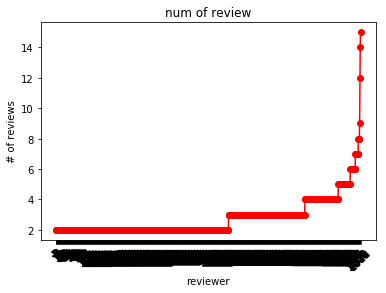

In [583]:
x=np.arange(len(num))
y=sorted(num)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('num of review')
plt.xlabel("reviewer")
plt.ylabel("# of reviews")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()